# il modello che uso NON è weighted

In [1]:
import scanpy as sc
import pandas as pd
import pickle
import numpy as np
import graph_tool.all as gt

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


In [2]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
state = pickle.load( open( "adata_10x/10x_equilibrate2_state.pkl", "rb" ) )

In [4]:
state

<NestedBlockState object, with base <BlockState object with 68 blocks (63 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba650>, at 0x7f4442ac3690>, and 10 levels of sizes [(860, 63), (63, 15), (15, 5), (5, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f4442aba610>

In [5]:
n_state = pickle.load( open( "adata_10x/10x_nested_state.pkl", "rb" ) ) 

In [6]:
n_state

<NestedBlockState object, with base <BlockState object with 63 blocks (63 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba9d0>, at 0x7f4442a78b10>, and 5 levels of sizes [(860, 63), (63, 15), (15, 5), (5, 2), (2, 1)] at 0x7f4427afdd50>

In [7]:
g = pickle.load( open( "adata_10x/10x_graph_g.pkl", "rb" ) ) #ho gia il grafo caricato

# 1) cambio la bs di equilibrate

In [21]:
BS=[]
for i in range(10,34,4):
    bs = n_state.get_bs()                   
    bs += [np.zeros(1)] * (i - len(bs))
    BS.append(bs)

In [22]:
bs10=BS[0]
bs14=BS[1]
bs18=BS[2]
bs22=BS[3]
bs26=BS[4]
bs30=BS[5]

In [22]:
print(len(bs1),len(bs2),len(bs3),len(bs4),len(bs5),len(bs6))

10 14 18 22 26 30


In [36]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

### 1a) bs 10

In [75]:
state = n_state.copy(bs=bs10, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19557.05935933993, 96838134, 29746848)

In [76]:
pickle.dump(state, open('adata_10x/10x_bs/bs_10.pkl', 'wb'), 2)

In [77]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_10.pkl', 'wb'), 2)

In [55]:
h10= pickle.load( open( "adata_10x/10x_bs/h_bs_10.pkl", "rb" ) )

In [56]:
state10= pickle.load( open( "adata_10x/10x_bs/bs_10.pkl", "rb" ) )
state10

<NestedBlockState object, with base <BlockState object with 70 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f43f8c26ad0>, at 0x7f43f96c6510>, and 10 levels of sizes [(860, 67), (67, 18), (18, 7), (7, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f43f8c26e10>

### 1b) bs 14

In [ ]:
state = n_state.copy(bs=bs14, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

In [39]:
pickle.dump(state, open('adata_10x/10x_bs/bs_14.pkl', 'wb'), 2)

In [40]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_14.pkl', 'wb'), 2)

In [57]:
h14= pickle.load( open( "adata_10x/10x_bs/h_bs_14.pkl", "rb" ) )

In [58]:
state14= pickle.load( open( "adata_10x/10x_bs/bs_14.pkl", "rb" ) )
state14

<NestedBlockState object, with base <BlockState object with 71 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f43f8bfbf10>, at 0x7f43f8bfdcd0>, and 14 levels of sizes [(860, 69), (69, 18), (18, 8), (8, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1)] at 0x7f43f8bfbed0>

### 1c) bs 18

In [42]:
state = n_state.copy(bs=bs18, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19570.535341362, 97791525, 30906964)

In [43]:
pickle.dump(state, open('adata_10x/10x_bs/bs_18.pkl', 'wb'), 2)

In [44]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_18.pkl', 'wb'), 2)

In [59]:
h18= pickle.load( open( "adata_10x/10x_bs/h_bs_18.pkl", "rb" ) )

In [60]:
state18= pickle.load( open( "adata_10x/10x_bs/bs_18.pkl", "rb" ) )
state18

<NestedBlockState object, with base <BlockState object with 70 blocks (67 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f43f8baebd0>, at 0x7f43f8bb91d0>, and 18 levels of sizes [(860, 67), (67, 17), (17, 8), (8, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f43f8bfd3d0>

### 1d) bs 22

In [46]:
state = n_state.copy(bs=bs22, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19579.467675697037, 98295791, 31045549)

In [47]:
pickle.dump(state, open('adata_10x/10x_bs/bs_22.pkl', 'wb'), 2)

In [48]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_22.pkl', 'wb'), 2)

In [14]:
h22= pickle.load( open( "adata_10x/10x_bs/h_bs_22.pkl", "rb" ) )

In [15]:
state22= pickle.load( open( "adata_10x/10x_bs/bs_22.pkl", "rb" ) )
state22

<NestedBlockState object, with base <BlockState object with 71 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442a8ef10>, at 0x7f441007ae10>, and 22 levels of sizes [(860, 69), (69, 16), (16, 6), (6, 5), (5, 5), (5, 5), (5, 4), (4, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f4442a95190>

### 1e) bs 26

In [50]:
state = n_state.copy(bs=bs26, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19555.91832399619, 98975480, 31140154)

In [51]:
pickle.dump(state, open('adata_10x/10x_bs/bs_26.pkl', 'wb'), 2)

In [52]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_26.pkl', 'wb'), 2)

In [16]:
h26= pickle.load( open( "adata_10x/10x_bs/h_bs_26.pkl", "rb" ) )

In [17]:
state26= pickle.load( open( "adata_10x/10x_bs/bs_26.pkl", "rb" ) )
state26

<NestedBlockState object, with base <BlockState object with 72 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f441007a290>, at 0x7f43fa928190>, and 26 levels of sizes [(860, 70), (70, 19), (19, 6), (6, 4), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f44100ba590>

### 1f) bs 30

In [54]:
state = n_state.copy(bs=bs30, sampling=True)
state.mcmc_sweep(niter=1000)
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_num_groups)

(19558.314833499808, 99418337, 31356712)

In [55]:
pickle.dump(state, open('adata_10x/10x_bs/bs_30.pkl', 'wb'), 2)

In [56]:
pickle.dump(h, open('adata_10x/10x_bs/h_bs_30.pkl', 'wb'), 2)

In [18]:
h30= pickle.load( open( "adata_10x/10x_bs/h_bs_30.pkl", "rb" ) )

In [19]:
state30= pickle.load( open( "adata_10x/10x_bs/bs_30.pkl", "rb" ) )
state30

<NestedBlockState object, with base <BlockState object with 73 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f43fa93be10>, at 0x7f43fa915bd0>, and 30 levels of sizes [(860, 72), (72, 18), (18, 6), (6, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f43fa98eb10>

<IPython.core.display.Javascript object>


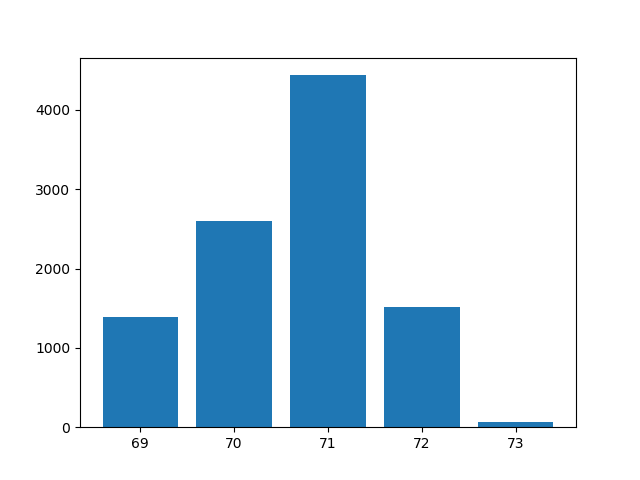

<IPython.core.display.Javascript object>


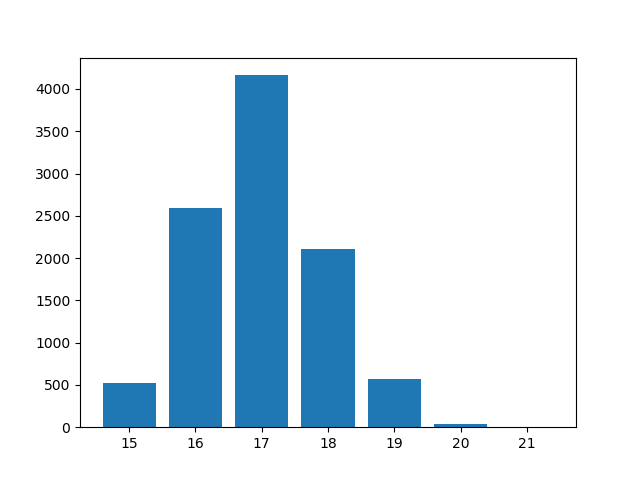

<IPython.core.display.Javascript object>


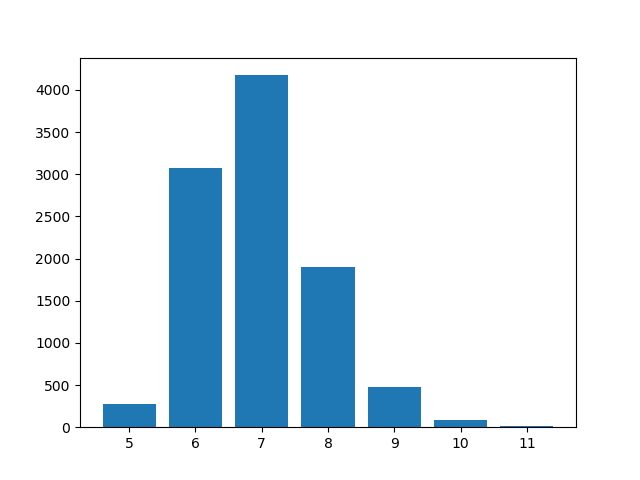

<IPython.core.display.Javascript object>


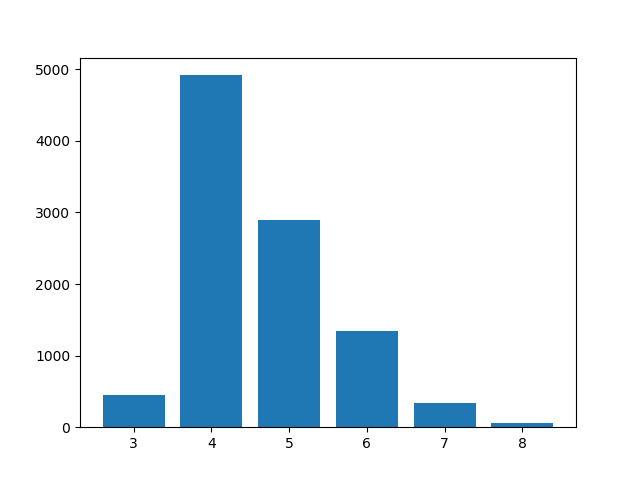

<IPython.core.display.Javascript object>


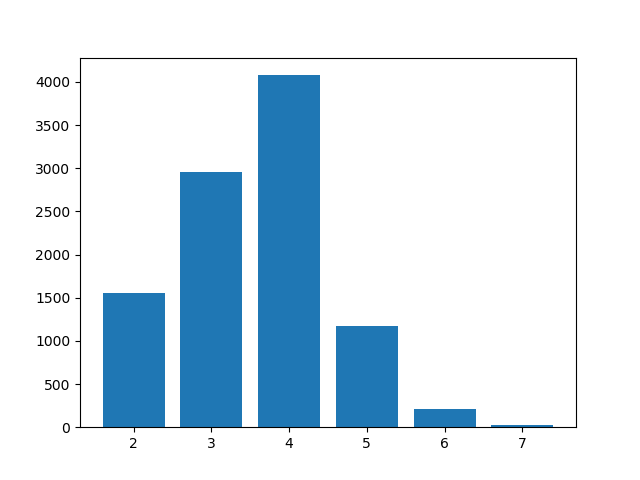

<IPython.core.display.Javascript object>


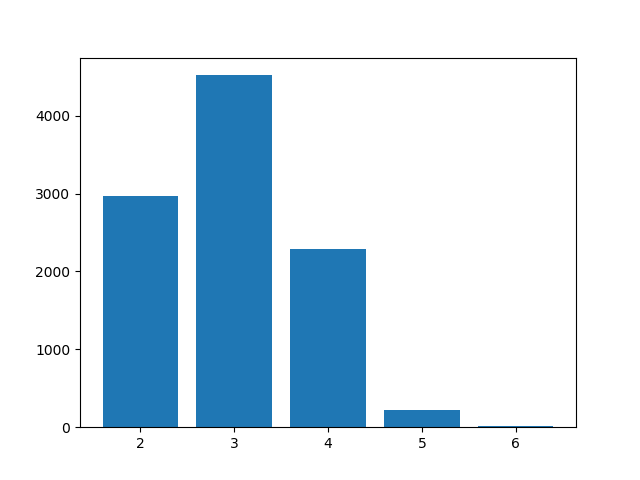

<IPython.core.display.Javascript object>


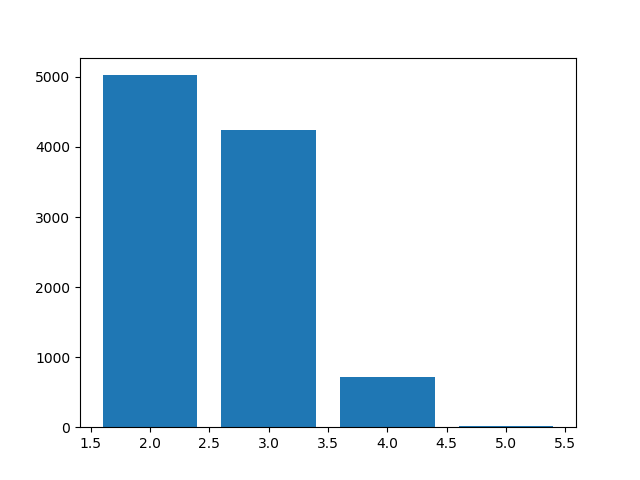

<IPython.core.display.Javascript object>


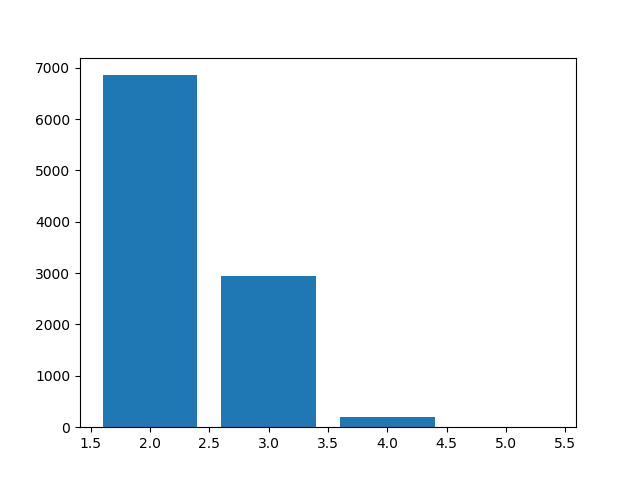

<IPython.core.display.Javascript object>


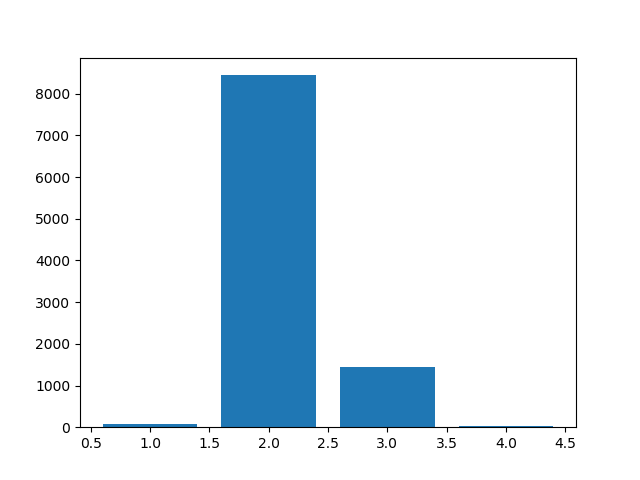

<IPython.core.display.Javascript object>


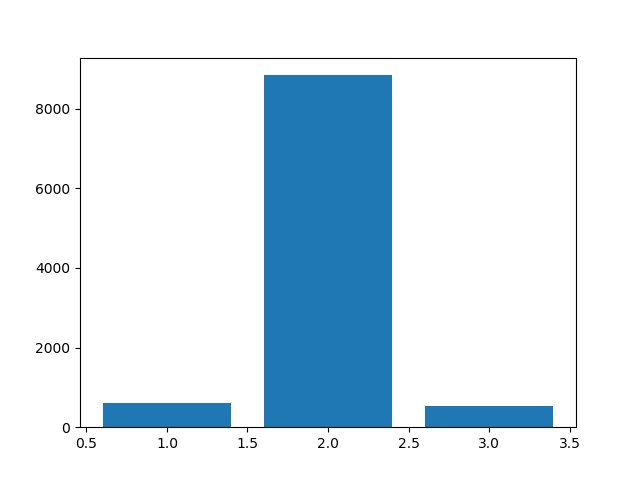

<IPython.core.display.Javascript object>


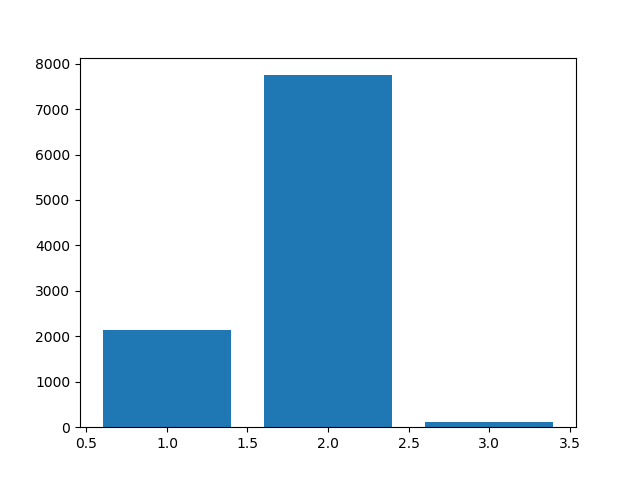

<IPython.core.display.Javascript object>


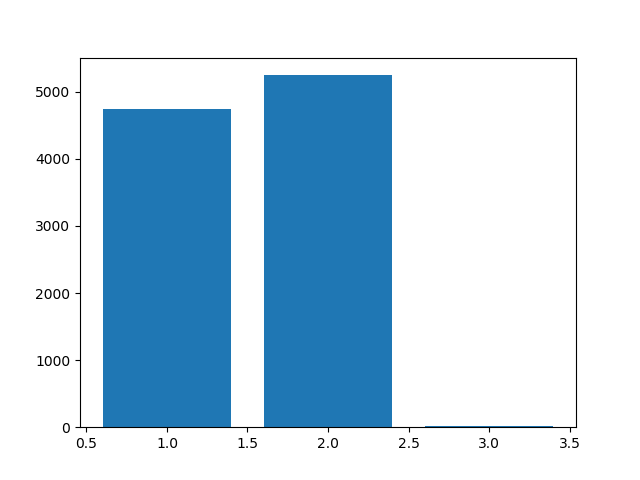

<IPython.core.display.Javascript object>


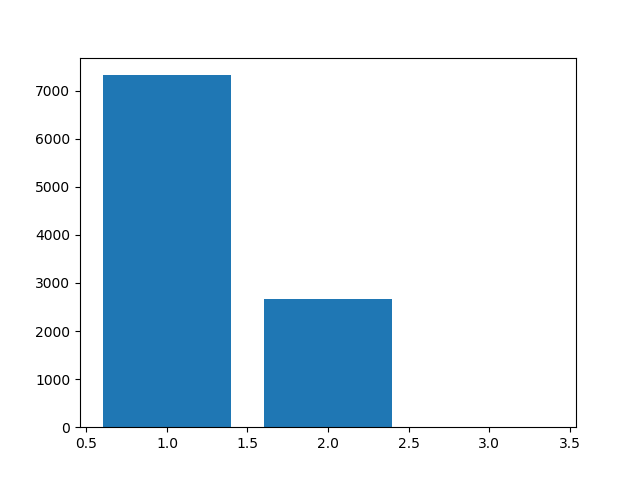

<IPython.core.display.Javascript object>


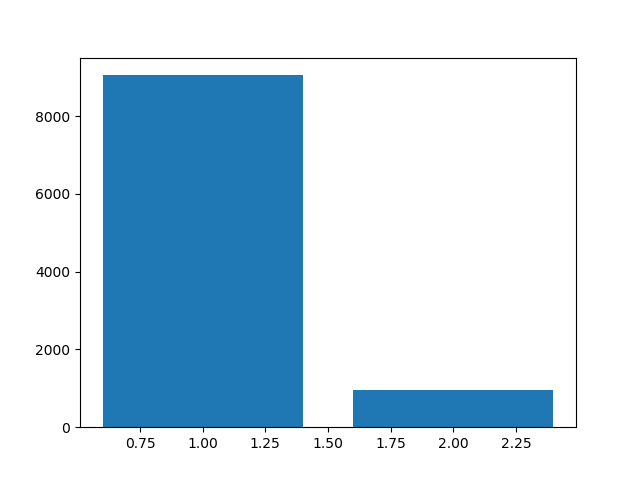

<IPython.core.display.Javascript object>


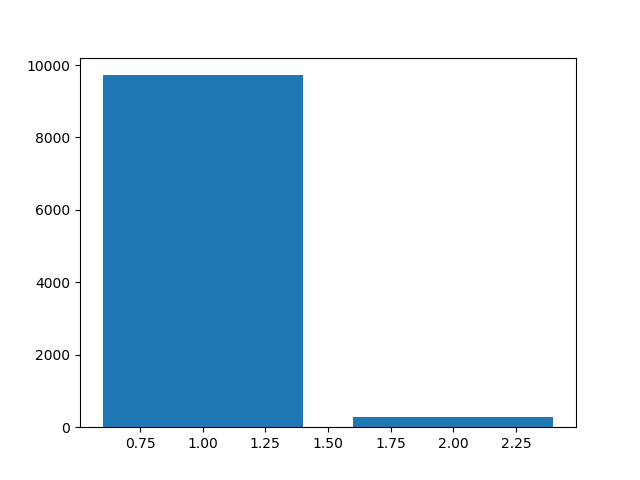

<IPython.core.display.Javascript object>


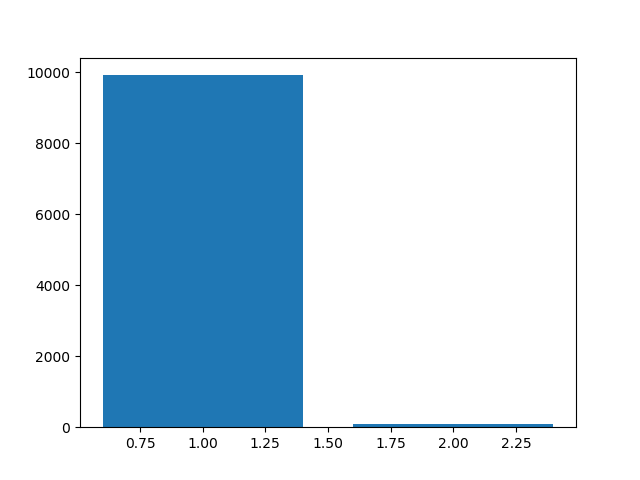

<IPython.core.display.Javascript object>


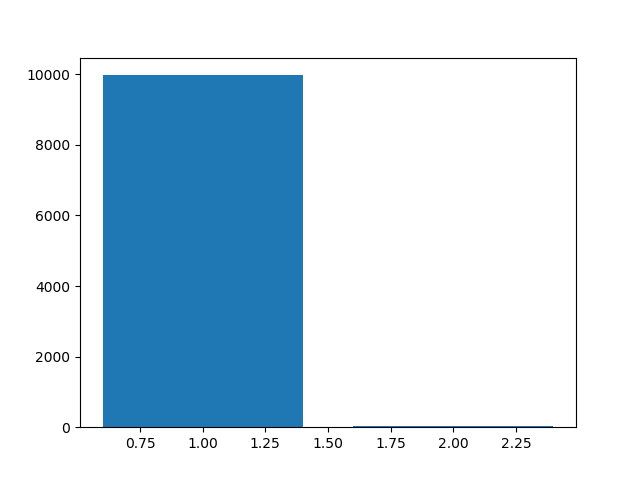

<IPython.core.display.Javascript object>


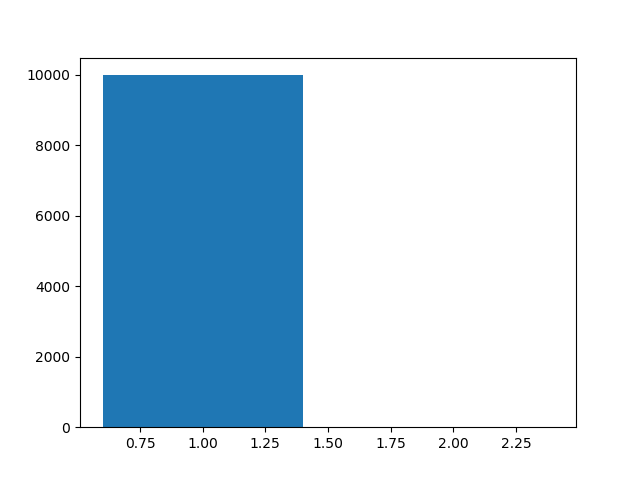

<IPython.core.display.Javascript object>


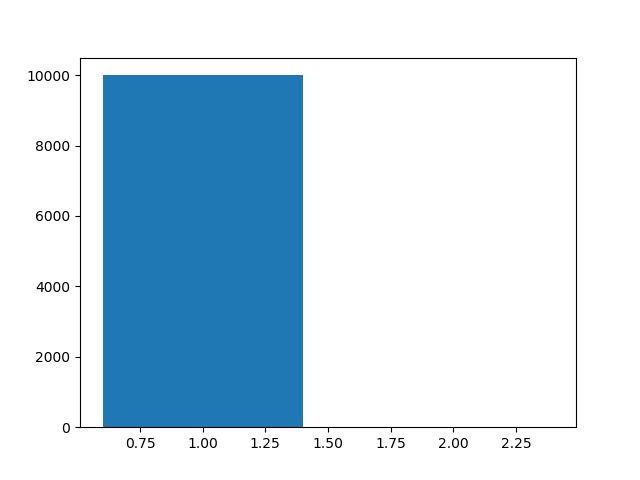

<IPython.core.display.Javascript object>


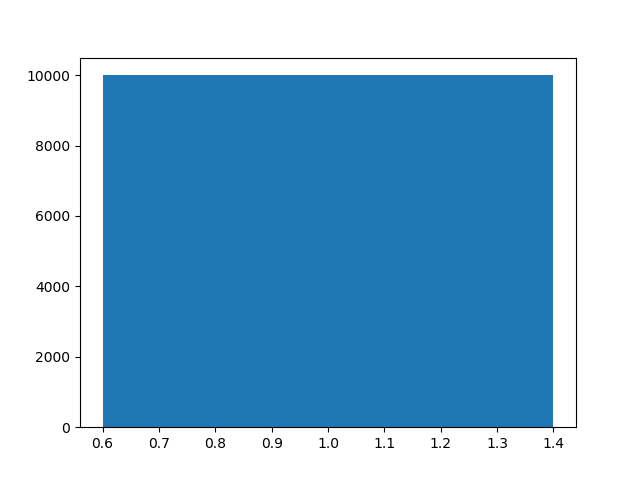

<IPython.core.display.Javascript object>


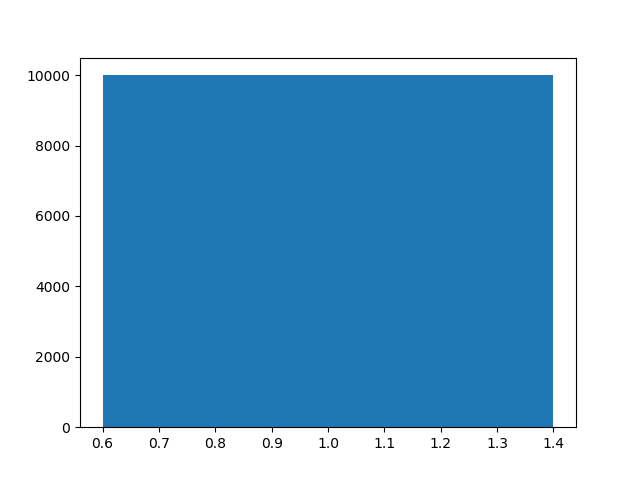

<IPython.core.display.Javascript object>


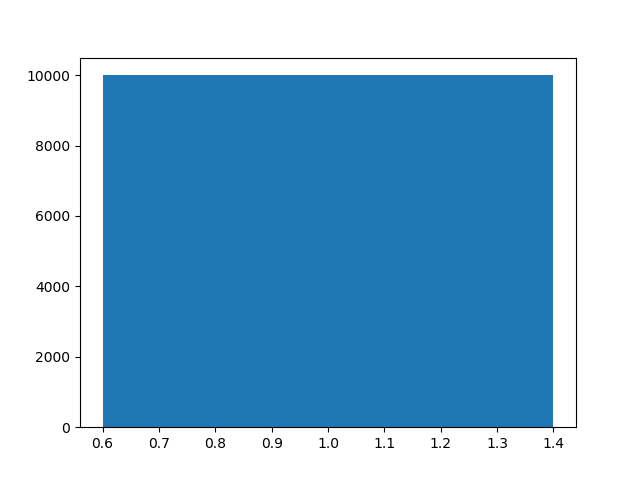

<IPython.core.display.Javascript object>


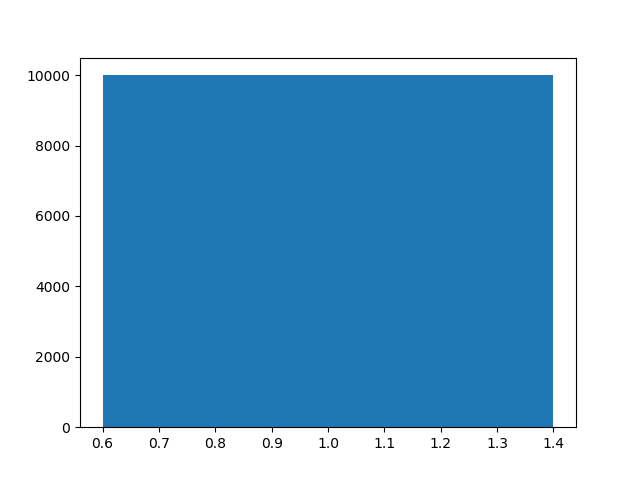

<IPython.core.display.Javascript object>


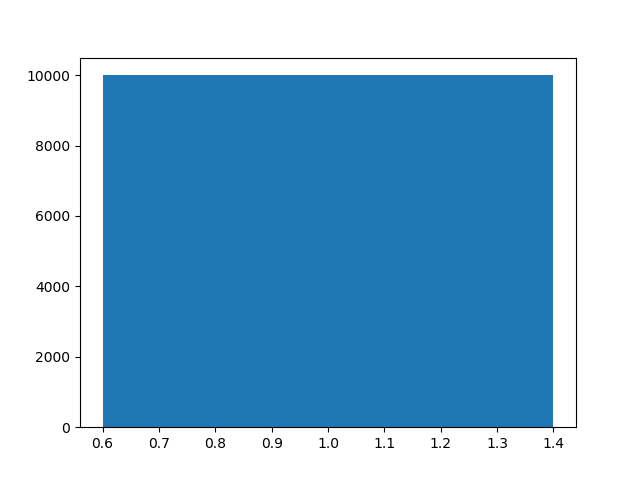

<IPython.core.display.Javascript object>


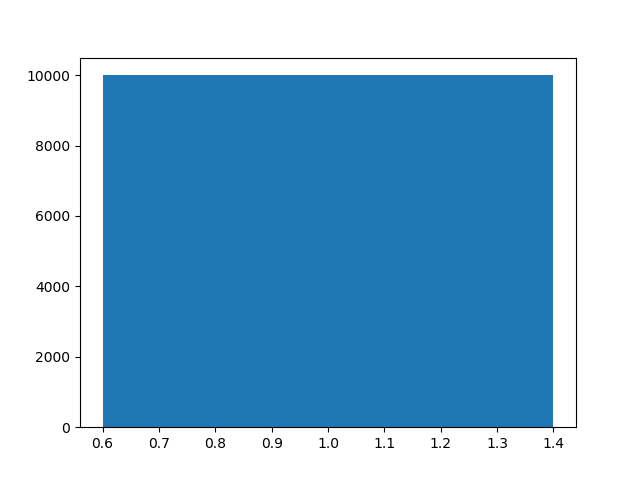

<IPython.core.display.Javascript object>


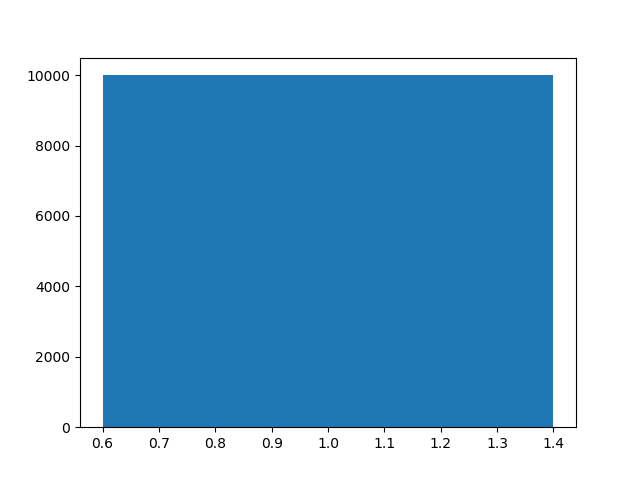

<IPython.core.display.Javascript object>


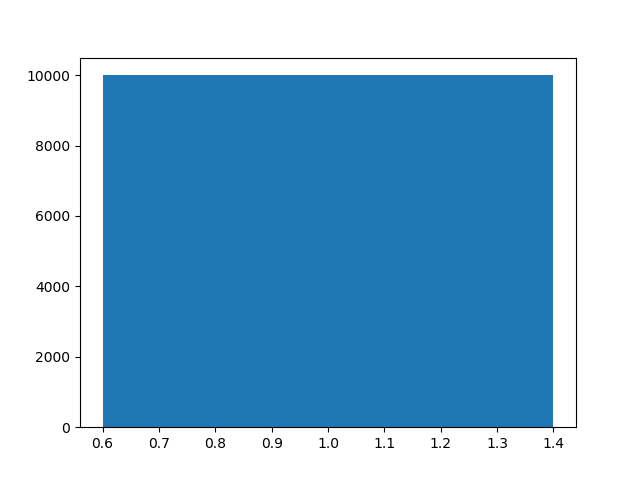

<IPython.core.display.Javascript object>


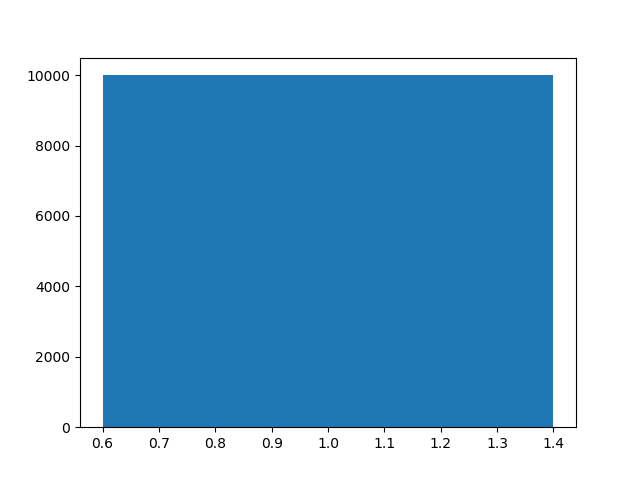

<IPython.core.display.Javascript object>


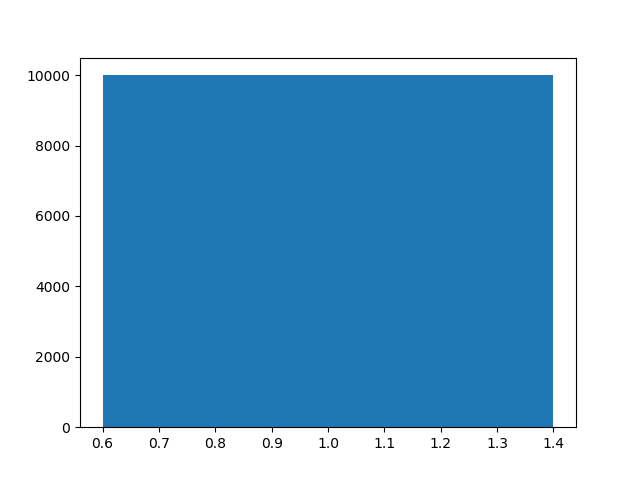

<IPython.core.display.Javascript object>


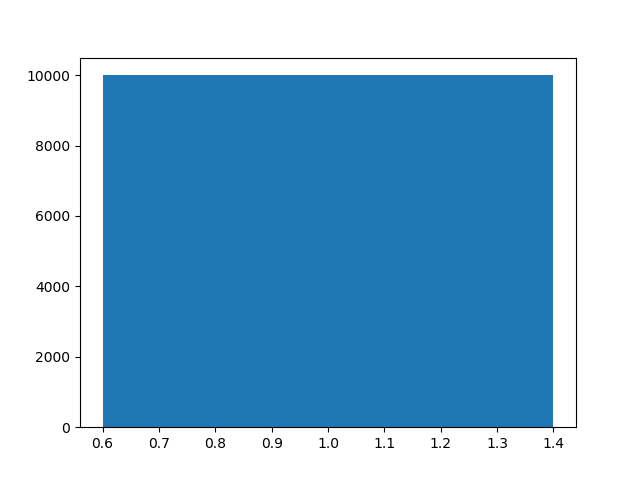

In [91]:
for l in range (0,len(bs30)):
    idxs= np.where(h30[l] > 0)[0]
    v = h30[l][idxs]
    figure(l)
    bar(idxs, v)

# 2) cambio force niter
### 2a) force niter 10000

In [77]:
bs = n_state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

In [22]:
state = n_state.copy(bs=bs, sampling=True)

In [23]:
state.mcmc_sweep(niter=1000)

(0.019067583178376424, 949992, 293705)

In [24]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(19586.229098220618, 50476106, 15732297)

In [25]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

In [26]:
gt.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19555.656209364588, 96437963, 30426306)

In [27]:
state

<NestedBlockState object, with base <BlockState object with 69 blocks (65 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 65), (65, 14), (14, 7), (7, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [28]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_10.pkl', 'wb'), 2)

In [29]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_10.pkl', 'wb'), 2)

In [61]:
h10000= pickle.load( open( "adata_10x/10x_force_niter/h_10.pkl", "rb" ) )

### 2b) 15000 

In [31]:
gt.mcmc_equilibrate(state, force_niter=15000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19542.82090215483, 145335357, 44432083)

In [32]:
state

<NestedBlockState object, with base <BlockState object with 72 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 70), (70, 19), (19, 6), (6, 6), (6, 3), (3, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [33]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_15.pkl', 'wb'), 2)

In [34]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_15.pkl', 'wb'), 2)

In [62]:
h15000 = pickle.load( open( "adata_10x/10x_force_niter/h_15.pkl", "rb" ) )

### 2c) 20000

In [35]:
gt.mcmc_equilibrate(state, force_niter=20000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19595.474867490306, 194320731, 58435008)

In [36]:
state

<NestedBlockState object, with base <BlockState object with 74 blocks (70 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 70), (70, 17), (17, 7), (7, 4), (4, 3), (3, 3), (3, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [37]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_20.pkl', 'wb'), 2)

In [38]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_20.pkl', 'wb'), 2)

In [63]:
h20000 = pickle.load( open( "adata_10x/10x_force_niter/h_20.pkl", "rb" ) )

### 2d) 25000

In [39]:
gt.mcmc_equilibrate(state, force_niter=25000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19591.818860822896, 243876493, 71805267)

In [40]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 17), (17, 6), (6, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 1), (1, 1)] at 0x7f23e811df50>

In [41]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_25.pkl', 'wb'), 2)

In [42]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_25.pkl', 'wb'), 2)

In [64]:
h25000 = pickle.load( open( "adata_10x/10x_force_niter/h_25.pkl", "rb" ) )

### 2e) 30000

In [43]:
gt.mcmc_equilibrate(state, force_niter=30000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19594.642503247487, 292330714, 86593308)

In [44]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 19), (19, 8), (8, 5), (5, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f23e811df50>

In [45]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_30.pkl', 'wb'), 2)

In [46]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_30.pkl', 'wb'), 2)

In [65]:
h30000 = pickle.load( open( "adata_10x/10x_force_niter/h_30.pkl", "rb" ) )

### 2f) 35000

In [47]:
gt.mcmc_equilibrate(state, force_niter=35000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19575.085811302863, 341305486, 100620468)

In [48]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 17), (17, 7), (7, 4), (4, 4), (4, 3), (3, 2), (2, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [49]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_35.pkl', 'wb'), 2)

In [50]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_35.pkl', 'wb'), 2)

In [66]:
h35000 = pickle.load( open( "adata_10x/10x_force_niter/h_35.pkl", "rb" ) )

### 2g) 40000

In [51]:
gt.mcmc_equilibrate(state, force_niter=40000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19586.02231770529, 389402016, 115274464)

In [52]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (74 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 74), (74, 17), (17, 7), (7, 5), (5, 4), (4, 3), (3, 3), (3, 3), (3, 3), (3, 2)] at 0x7f23e811df50>

In [53]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_40.pkl', 'wb'), 2)

In [54]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_40.pkl', 'wb'), 2)

In [67]:
h40000 = pickle.load( open( "adata_10x/10x_force_niter/h_40.pkl", "rb" ) )

### 2h) 45000

In [55]:
gt.mcmc_equilibrate(state, force_niter=45000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19584.882138078745, 437982435, 129327919)

In [56]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 18), (18, 8), (8, 5), (5, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f23e811df50>

In [57]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_45.pkl', 'wb'), 2)

In [58]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_45.pkl', 'wb'), 2)

In [68]:
h45000 = pickle.load( open( "adata_10x/10x_force_niter/h_45.pkl", "rb" ) )

### 2i) 50000

In [59]:
gt.mcmc_equilibrate(state, force_niter=50000, mcmc_args=dict(niter=10), callback=collect_num_groups)

(19548.424993879882, 486422232, 144928657)

In [60]:
state

<NestedBlockState object, with base <BlockState object with 78 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f241e3ec2d0>, at 0x7f23e811da10>, and 10 levels of sizes [(860, 72), (72, 16), (16, 7), (7, 3), (3, 3), (3, 3), (3, 3), (3, 2), (2, 2), (2, 2)] at 0x7f23e811df50>

In [61]:
pickle.dump(state, open('adata_10x/10x_force_niter/fn_50.pkl', 'wb'), 2)

In [62]:
pickle.dump(h, open("adata_10x/10x_force_niter/h_50.pkl", 'wb'), 2)

In [69]:
h50000 = pickle.load( open( "adata_10x/10x_force_niter/h_50.pkl", "rb" ) )

In [64]:
len(h50)

10

In [78]:
for l in range (0,len(bs)):
    idxs= np.where(h50000[l] > 0)[0]
    v = h50000[l][idxs]
    figure(l)
    bar(idxs, v)

# 3) Classificazione delle cellule da parte dei nuovi grafi

In [27]:
import anndata

In [28]:
adata=sc.read('adata_10x/adata_sc_10x.h5ad')
adata

AnnData object with n_obs × n_vars = 860 × 1596 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [29]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [30]:
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo

In [31]:
cell_annotation= pd.read_table('../sc_mixology/data/csv/sc_10x_5cl.metadata.csv.gz', compression="gzip", sep=",", index_col=0)

In [32]:
adata.obs.loc[:, "cell_line"] = cell_annotation.loc[adata.obs_names, "cell_line"]
adata.obs.columns

Index(['n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase',
       'leiden', 'cell_line'],
      dtype='object')

### bs 10

<IPython.core.display.Javascript object>


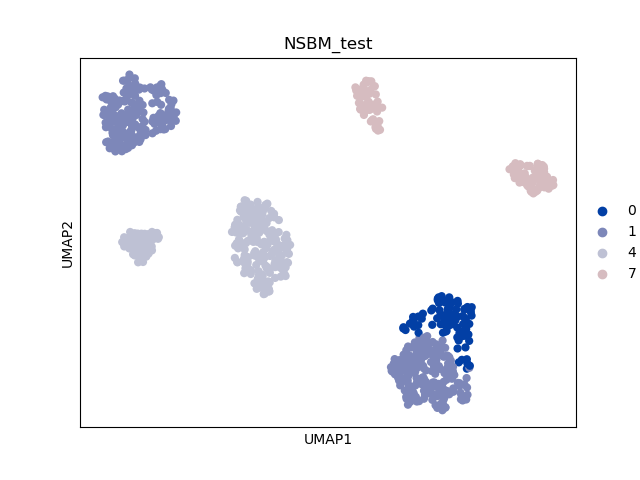

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0     91       0
1             0   176      7    204       0
4            62     0      4      1     188
7             0     0    127      0       0

In [81]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 14

<IPython.core.display.Javascript object>


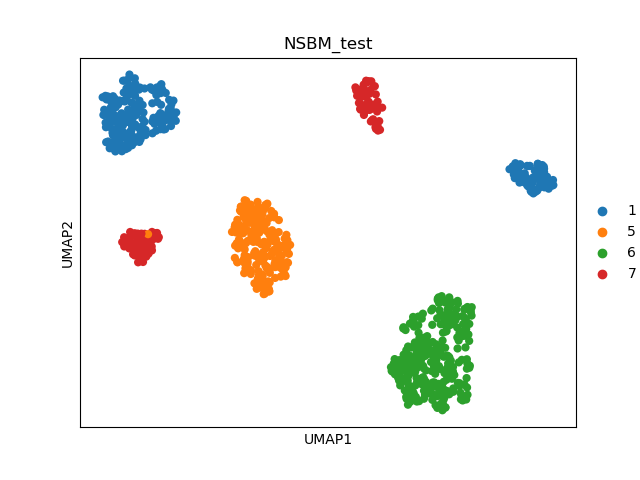

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             0   176     78      0       0
5             1     0      4      1     188
6             0     0      0    295       0
7            61     0     56      0       0

In [88]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state14.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 18

<IPython.core.display.Javascript object>


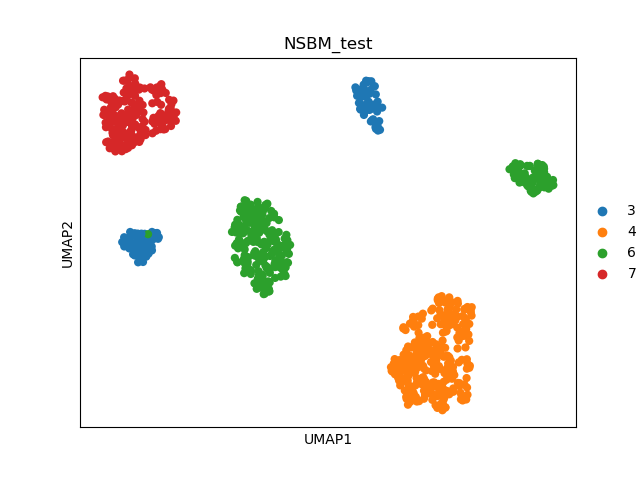

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
3            61     0     56      0       0
4             0     0      0    295       0
6             1     0     75      1     188
7             0   176      7      0       0

In [34]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state18.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 22

<IPython.core.display.Javascript object>


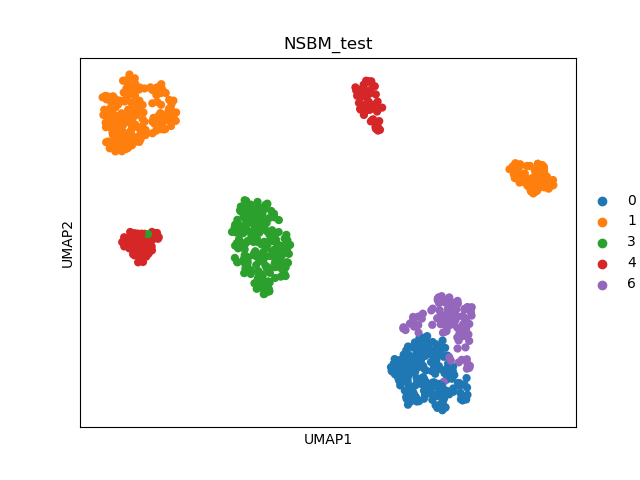

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    200       0
1             0   176     78      0       0
3             1     0      4      1     188
4            61     0     56      0       0
6             0     0      0     95       0

In [90]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state22.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 26

<IPython.core.display.Javascript object>


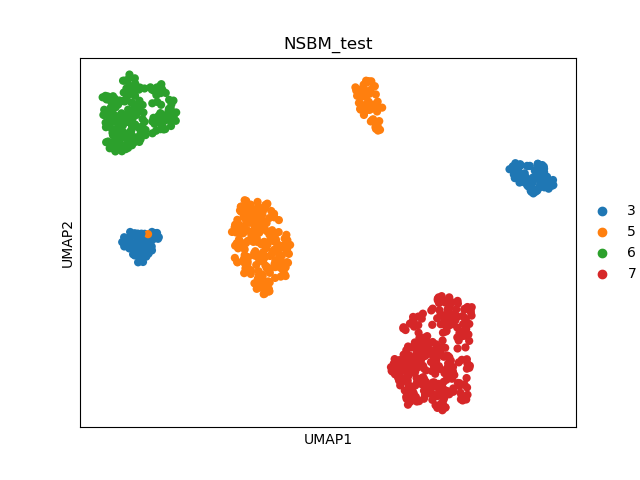

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
3            61     0     71      0       0
5             1     0     60      1     188
6             0   176      7      0       0
7             0     0      0    295       0

In [35]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state26.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### bs 30

<IPython.core.display.Javascript object>


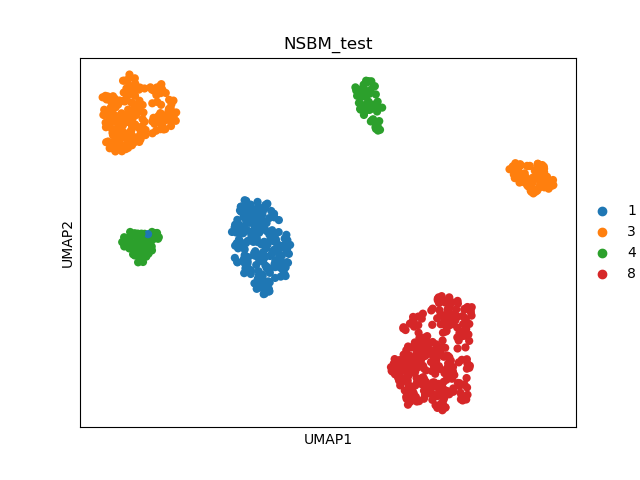

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1             1     0      4      1     188
3             0   176     78      0       0
4            61     0     56      0       0
8             0     0      0    295       0

In [36]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state30.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 10

In [37]:
state10000 = pickle.load( open( "adata_10x/10x_force_niter/fn_10.pkl", "rb" ) )

<IPython.core.display.Javascript object>


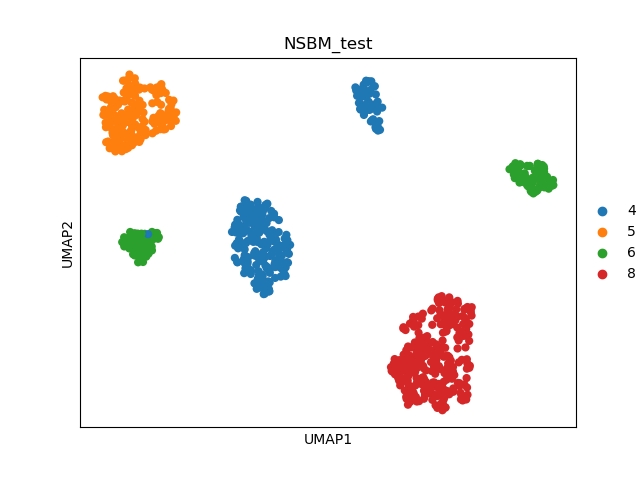

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
4             1     0     60      1     188
5             0   176      7      0       0
6            61     0     71      0       0
8             0     0      0    295       0

In [95]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state10000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 15

In [38]:
state15000 = pickle.load( open( "adata_10x/10x_force_niter/fn_15.pkl", "rb" ) )

<IPython.core.display.Javascript object>


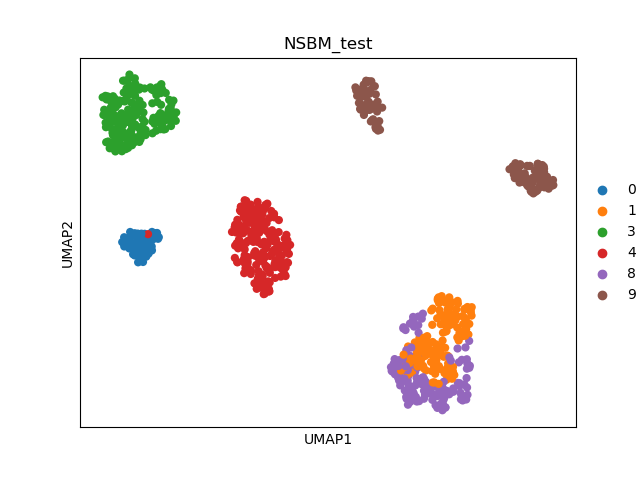

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
1             0     0      0    153       0
3             0   176      7      0       0
4             1     0      4      1     188
8             0     0      0    142       0
9             0     0    127      0       0

In [39]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state15000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 20

In [40]:
state20000 = pickle.load( open( "adata_10x/10x_force_niter/fn_20.pkl", "rb" ) )

<IPython.core.display.Javascript object>


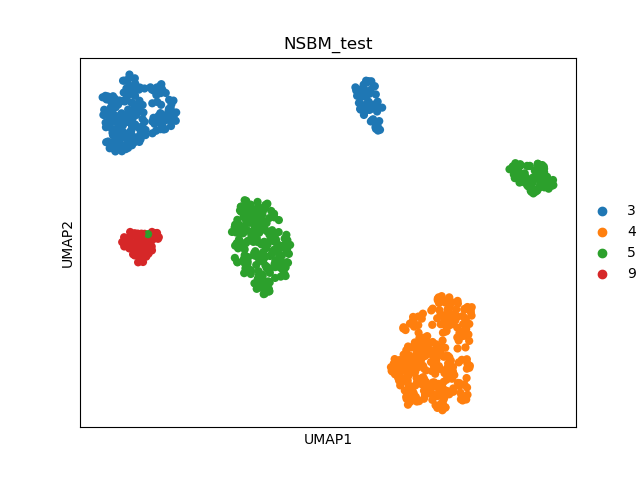

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
3             0   176     63      0       0
4             0     0      0    295       0
5             1     0     75      1     188
9            61     0      0      0       0

In [41]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state20000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 25

In [43]:
state25000 = pickle.load( open( "adata_10x/10x_force_niter/fn_25.pkl", "rb" ) )

<IPython.core.display.Javascript object>


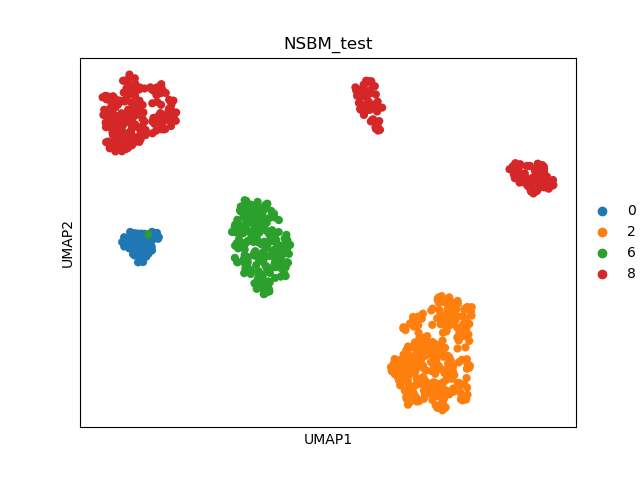

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
2             0     0      0    295       0
6             1     0      4      1     188
8             0   176    134      0       0

In [44]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state25000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 30

In [45]:
state30000 = pickle.load( open( "adata_10x/10x_force_niter/fn_30.pkl", "rb" ) )

<IPython.core.display.Javascript object>


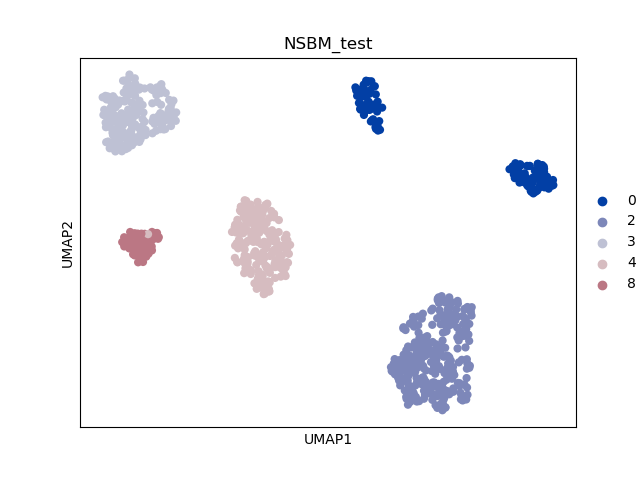

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0    127      0       0
2             0     0      0    295       0
3             0   176      7      0       0
4             1     0      4      1     188
8            61     0      0      0       0

In [90]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state30000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 35

In [47]:
state35000 = pickle.load( open( "adata_10x/10x_force_niter/fn_35.pkl", "rb" ) )

<IPython.core.display.Javascript object>


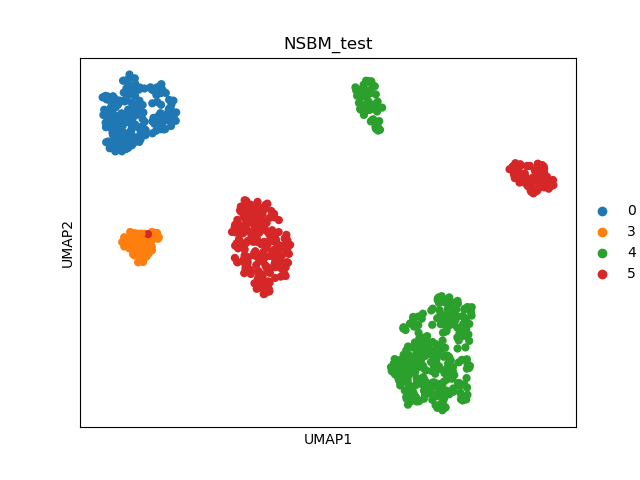

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
3            61     0      0      0       0
4             0     0     56    295       0
5             1     0     75      1     188

In [48]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state35000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 40

In [49]:
state40000 = pickle.load( open( "adata_10x/10x_force_niter/fn_40.pkl", "rb" ) )

<IPython.core.display.Javascript object>


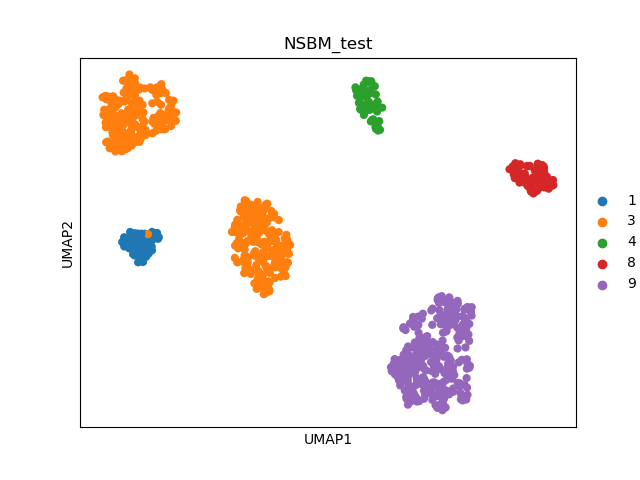

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
1            61     0      0      0       0
3             1   176     11      1     188
4             0     0     56      0       0
8             0     0     71      0       0
9             0     0      0    295       0

In [50]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state40000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 45

In [51]:
state45000 = pickle.load( open( "adata_10x/10x_force_niter/fn_45.pkl", "rb" ) )

<IPython.core.display.Javascript object>


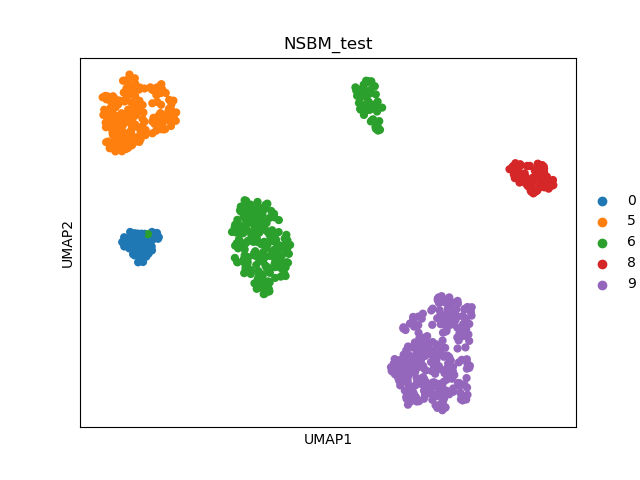

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0            61     0      0      0       0
5             0   176      7      0       0
6             1     0     60      1     188
8             0     0     71      0       0
9             0     0      0    295       0

In [109]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state45000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### fn 50

In [53]:
state50000 = pickle.load( open( "adata_10x/10x_force_niter/fn_50.pkl", "rb" ) )

<IPython.core.display.Javascript object>


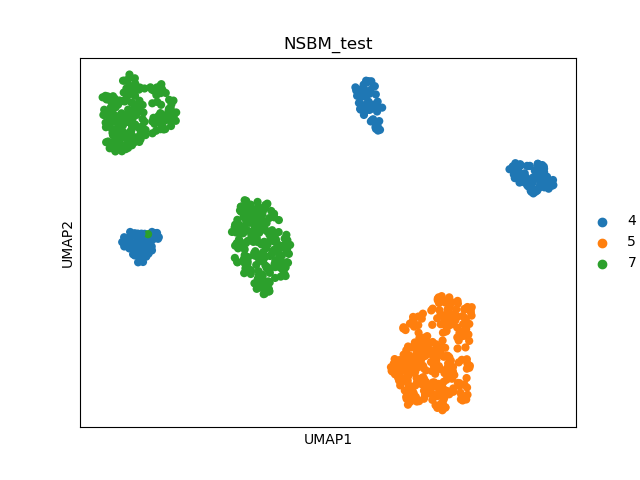

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
4            61     0    127      0       0
5             0     0      0    295       0
7             1   176     11      1     188

In [54]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state50000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

# 4) Provo ad effettuare mcmc_equilibrate senza force_niter

In [6]:
state = n_state.copy(bs=bs, sampling=True)

NameError: name 'bs' is not defined

In [94]:
state.mcmc_sweep(niter=1000)

(1.8690966063378855, 950845, 290766)

In [95]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(19585.310704677206, 48256725, 15120419)

In [101]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

### prima prova

In [150]:
gt.mcmc_equilibrate(state,mcmc_args=dict(niter=10), callback=collect_num_groups,verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 19552.295  max_S: 19558.365  S: 19552.295  ΔS:     -6.07075  moves:  2993 
niter:     2  count:    0  breaks:  0  min_S: 19529.877  max_S: 19558.365  S: 19529.877  ΔS:     -22.4182  moves:  2913 
niter:     3  count:    0  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19571.769  ΔS:      41.8921  moves:  2884 
niter:     4  count:    1  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19559.872  ΔS:     -11.8967  moves:  3000 
niter:     5  count:    2  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19555.367  ΔS:     -4.50477  moves:  2896 
niter:     6  count:    3  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19562.499  ΔS:      7.13218  moves:  2996 
niter:     7  count:    4  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19553.337  ΔS:     -9.16224  moves:  2963 
niter:     8  count:    5  breaks:  0  min_S: 19529.877  max_S: 19571.769  S: 19563.223  ΔS:      9.88560  moves:  2911 
niter:     9  count:    6  break

niter:    76  count:   33  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19558.938  ΔS:      18.6204  moves:  3018 
niter:    77  count:   34  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19576.480  ΔS:      17.5426  moves:  3030 
niter:    78  count:   35  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19569.174  ΔS:     -7.30591  moves:  3102 
niter:    79  count:   36  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19578.830  ΔS:      9.65569  moves:  3023 
niter:    80  count:   37  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19566.339  ΔS:     -12.4908  moves:  3058 
niter:    81  count:   38  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19576.391  ΔS:      10.0522  moves:  3014 
niter:    82  count:   39  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19577.885  ΔS:      1.49358  moves:  3004 
niter:    83  count:   40  breaks:  0  min_S: 19529.877  max_S: 19621.846  S: 19544.919  ΔS:     -32.9661  moves:  2965 
niter:    84  count:    0  break

niter:   153  count:   51  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19566.121  ΔS:      5.88614  moves:  3051 
niter:   154  count:   52  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19574.379  ΔS:      8.25828  moves:  2971 
niter:   155  count:   53  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19541.495  ΔS:     -32.8841  moves:  3006 
niter:   156  count:   54  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19576.818  ΔS:      35.3233  moves:  3015 
niter:   157  count:   55  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19593.578  ΔS:      16.7593  moves:  3079 
niter:   158  count:   56  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19574.438  ΔS:     -19.1398  moves:  2993 
niter:   159  count:   57  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19553.184  ΔS:     -21.2541  moves:  3037 
niter:   160  count:   58  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19544.082  ΔS:     -9.10146  moves:  2986 
niter:   161  count:   59  break

niter:   227  count:  125  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19594.469  ΔS:     -10.3553  moves:  3019 
niter:   228  count:  126  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19597.449  ΔS:      2.98017  moves:  3096 
niter:   229  count:  127  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19613.980  ΔS:      16.5311  moves:  3035 
niter:   230  count:  128  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19591.636  ΔS:     -22.3441  moves:  2992 
niter:   231  count:  129  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19587.239  ΔS:     -4.39668  moves:  3095 
niter:   232  count:  130  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19568.022  ΔS:     -19.2169  moves:  3016 
niter:   233  count:  131  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19576.774  ΔS:      8.75130  moves:  2955 
niter:   234  count:  132  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19573.223  ΔS:     -3.55017  moves:  3067 
niter:   235  count:  133  break

niter:   304  count:  202  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19542.752  ΔS:     -28.0084  moves:  3010 
niter:   305  count:  203  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19567.717  ΔS:      24.9644  moves:  3034 
niter:   306  count:  204  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19568.890  ΔS:      1.17311  moves:  3004 
niter:   307  count:  205  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19564.814  ΔS:     -4.07564  moves:  3082 
niter:   308  count:  206  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19567.734  ΔS:      2.91950  moves:  3067 
niter:   309  count:  207  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19573.882  ΔS:      6.14886  moves:  3050 
niter:   310  count:  208  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19562.904  ΔS:     -10.9785  moves:  3087 
niter:   311  count:  209  breaks:  0  min_S: 19529.710  max_S: 19630.479  S: 19578.428  ΔS:      15.5246  moves:  2960 
niter:   312  count:  210  break

niter:   383  count:   19  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19555.823  ΔS:     -11.0203  moves:  3055 
niter:   384  count:   20  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19578.872  ΔS:      23.0489  moves:  3131 
niter:   385  count:   21  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19558.232  ΔS:     -20.6401  moves:  3038 
niter:   386  count:   22  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19554.232  ΔS:     -3.99985  moves:  3044 
niter:   387  count:   23  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19553.152  ΔS:     -1.08000  moves:  2989 
niter:   388  count:   24  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19547.217  ΔS:     -5.93507  moves:  3080 
niter:   389  count:   25  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19549.785  ΔS:      2.56796  moves:  3038 
niter:   390  count:   26  breaks:  0  min_S: 19526.957  max_S: 19630.479  S: 19527.996  ΔS:     -21.7891  moves:  3060 
niter:   391  count:   27  break

niter:   463  count:   61  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19566.345  ΔS:     -23.3274  moves:  3006 
niter:   464  count:   62  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19563.903  ΔS:     -2.44193  moves:  2992 
niter:   465  count:   63  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19538.128  ΔS:     -25.7747  moves:  3047 
niter:   466  count:   64  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19566.265  ΔS:      28.1367  moves:  2940 
niter:   467  count:   65  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19564.308  ΔS:     -1.95642  moves:  3065 
niter:   468  count:   66  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19543.930  ΔS:     -20.3786  moves:  3038 
niter:   469  count:   67  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19566.388  ΔS:      22.4579  moves:  2989 
niter:   470  count:   68  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19548.278  ΔS:     -18.1100  moves:  2996 
niter:   471  count:   69  break

niter:   534  count:  132  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19587.622  ΔS:      22.9777  moves:  2943 
niter:   535  count:  133  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19554.240  ΔS:     -33.3825  moves:  2937 
niter:   536  count:  134  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19561.746  ΔS:      7.50628  moves:  2979 
niter:   537  count:  135  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19572.316  ΔS:      10.5704  moves:  2942 
niter:   538  count:  136  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19558.675  ΔS:     -13.6410  moves:  3009 
niter:   539  count:  137  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19554.941  ΔS:     -3.73412  moves:  2949 
niter:   540  count:  138  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19559.088  ΔS:      4.14674  moves:  2941 
niter:   541  count:  139  breaks:  0  min_S: 19525.525  max_S: 19630.479  S: 19577.023  ΔS:      17.9345  moves:  2983 
niter:   542  count:  140  break

niter:   603  count:   18  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19583.009  ΔS:      11.8435  moves:  3087 
niter:   604  count:   19  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19539.250  ΔS:     -43.7592  moves:  3041 
niter:   605  count:   20  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19567.585  ΔS:      28.3354  moves:  2963 
niter:   606  count:   21  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19560.904  ΔS:     -6.68062  moves:  2941 
niter:   607  count:   22  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19567.406  ΔS:      6.50143  moves:  3016 
niter:   608  count:   23  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19592.973  ΔS:      25.5676  moves:  2906 
niter:   609  count:   24  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19551.444  ΔS:     -41.5296  moves:  2922 
niter:   610  count:   25  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19564.797  ΔS:      13.3530  moves:  3014 
niter:   611  count:   26  break

niter:   673  count:   88  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19552.484  ΔS:      7.43756  moves:  3023 
niter:   674  count:   89  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19563.388  ΔS:      10.9045  moves:  2998 
niter:   675  count:   90  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19550.868  ΔS:     -12.5203  moves:  3019 
niter:   676  count:   91  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19548.274  ΔS:     -2.59440  moves:  3012 
niter:   677  count:   92  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19538.277  ΔS:     -9.99709  moves:  3083 
niter:   678  count:   93  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19549.984  ΔS:      11.7069  moves:  3078 
niter:   679  count:   94  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19581.771  ΔS:      31.7871  moves:  3027 
niter:   680  count:   95  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19578.530  ΔS:     -3.24039  moves:  3023 
niter:   681  count:   96  break

niter:   742  count:  157  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19560.529  ΔS:    -0.671485  moves:  3067 
niter:   743  count:  158  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19565.046  ΔS:      4.51694  moves:  3089 
niter:   744  count:  159  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19555.510  ΔS:     -9.53566  moves:  3063 
niter:   745  count:  160  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19544.265  ΔS:     -11.2447  moves:  2991 
niter:   746  count:  161  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19588.455  ΔS:      44.1892  moves:  2950 
niter:   747  count:  162  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19553.476  ΔS:     -34.9781  moves:  3037 
niter:   748  count:  163  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19568.697  ΔS:      15.2207  moves:  3039 
niter:   749  count:  164  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19538.690  ΔS:     -30.0068  moves:  3001 
niter:   750  count:  165  break

niter:   822  count:  237  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19555.084  ΔS:     -22.4504  moves:  2977 
niter:   823  count:  238  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19553.362  ΔS:     -1.72198  moves:  2989 
niter:   824  count:  239  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19541.321  ΔS:     -12.0409  moves:  3079 
niter:   825  count:  240  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19561.972  ΔS:      20.6511  moves:  2987 
niter:   826  count:  241  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19544.357  ΔS:     -17.6148  moves:  3065 
niter:   827  count:  242  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19573.027  ΔS:      28.6700  moves:  3022 
niter:   828  count:  243  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19569.648  ΔS:     -3.37954  moves:  2971 
niter:   829  count:  244  breaks:  0  min_S: 19521.191  max_S: 19630.479  S: 19595.928  ΔS:      26.2804  moves:  2995 
niter:   830  count:  245  break

niter:   891  count:    0  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19632.105  ΔS:      50.0598  moves:  3088 
niter:   892  count:    1  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19579.782  ΔS:     -52.3235  moves:  3063 
niter:   893  count:    2  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19589.767  ΔS:      9.98525  moves:  3083 
niter:   894  count:    3  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19577.414  ΔS:     -12.3531  moves:  3098 
niter:   895  count:    4  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19598.683  ΔS:      21.2692  moves:  3090 
niter:   896  count:    5  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19581.633  ΔS:     -17.0501  moves:  3024 
niter:   897  count:    6  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19577.319  ΔS:     -4.31391  moves:  3032 
niter:   898  count:    7  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19611.259  ΔS:      33.9404  moves:  2986 
niter:   899  count:    8  break

niter:   972  count:   81  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19533.974  ΔS:      2.49001  moves:  2935 
niter:   973  count:   82  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19564.417  ΔS:      30.4437  moves:  2949 
niter:   974  count:   83  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19533.874  ΔS:     -30.5434  moves:  2910 
niter:   975  count:   84  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19570.506  ΔS:      36.6320  moves:  2997 
niter:   976  count:   85  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19558.851  ΔS:     -11.6552  moves:  2988 
niter:   977  count:   86  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19570.522  ΔS:      11.6717  moves:  2975 
niter:   978  count:   87  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19568.066  ΔS:     -2.45647  moves:  2971 
niter:   979  count:   88  breaks:  0  min_S: 19521.191  max_S: 19632.105  S: 19546.481  ΔS:     -21.5855  moves:  2933 
niter:   980  count:    0  break

niter:  1046  count:   66  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19577.439  ΔS:      32.8552  moves:  2958 
niter:  1047  count:   67  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19566.501  ΔS:     -10.9380  moves:  2910 
niter:  1048  count:   68  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19569.824  ΔS:      3.32257  moves:  2971 
niter:  1049  count:   69  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19572.217  ΔS:      2.39268  moves:  3025 
niter:  1050  count:   70  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19596.260  ΔS:      24.0434  moves:  2979 
niter:  1051  count:   71  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19578.129  ΔS:     -18.1308  moves:  2948 
niter:  1052  count:   72  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19567.154  ΔS:     -10.9754  moves:  2956 
niter:  1053  count:   73  breaks:  0  min_S: 19518.597  max_S: 19632.105  S: 19558.773  ΔS:     -8.38041  moves:  2898 
niter:  1054  count:   74  break

niter:  1118  count:   49  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19541.670  ΔS:     -24.1915  moves:  2918 
niter:  1119  count:   50  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19563.310  ΔS:      21.6400  moves:  2995 
niter:  1120  count:   51  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19558.509  ΔS:     -4.80151  moves:  2903 
niter:  1121  count:   52  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19551.325  ΔS:     -7.18332  moves:  2908 
niter:  1122  count:   53  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19554.952  ΔS:      3.62655  moves:  2910 
niter:  1123  count:   54  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19555.670  ΔS:     0.718206  moves:  2939 
niter:  1124  count:   55  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19538.450  ΔS:     -17.2203  moves:  3013 
niter:  1125  count:   56  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19532.568  ΔS:     -5.88161  moves:  2956 
niter:  1126  count:   57  break

niter:  1189  count:  120  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19546.765  ΔS:     -8.38248  moves:  2958 
niter:  1190  count:  121  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19563.196  ΔS:      16.4318  moves:  3046 
niter:  1191  count:  122  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19559.246  ΔS:     -3.95041  moves:  2958 
niter:  1192  count:  123  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19545.058  ΔS:     -14.1883  moves:  3017 
niter:  1193  count:  124  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19541.641  ΔS:     -3.41671  moves:  2996 
niter:  1194  count:  125  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19558.661  ΔS:      17.0199  moves:  2984 
niter:  1195  count:  126  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19558.719  ΔS:    0.0584651  moves:  3047 
niter:  1196  count:  127  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19571.773  ΔS:      13.0542  moves:  2986 
niter:  1197  count:  128  break

niter:  1261  count:  192  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19532.843  ΔS:     -8.90867  moves:  2928 
niter:  1262  count:  193  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19549.281  ΔS:      16.4377  moves:  2995 
niter:  1263  count:  194  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19563.577  ΔS:      14.2964  moves:  3031 
niter:  1264  count:  195  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19533.997  ΔS:     -29.5805  moves:  3041 
niter:  1265  count:  196  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19552.373  ΔS:      18.3766  moves:  2943 
niter:  1266  count:  197  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19532.627  ΔS:     -19.7462  moves:  2930 
niter:  1267  count:  198  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19542.566  ΔS:      9.93889  moves:  3017 
niter:  1268  count:  199  breaks:  0  min_S: 19517.812  max_S: 19632.105  S: 19527.886  ΔS:     -14.6798  moves:  2955 
niter:  1269  count:  200  break

niter:  1330  count:   52  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19547.076  ΔS:     -5.01721  moves:  3049 
niter:  1331  count:   53  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19550.120  ΔS:      3.04428  moves:  3102 
niter:  1332  count:   54  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19554.124  ΔS:      4.00366  moves:  2998 
niter:  1333  count:   55  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19547.240  ΔS:     -6.88398  moves:  2933 
niter:  1334  count:   56  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19562.039  ΔS:      14.7993  moves:  3006 
niter:  1335  count:   57  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19587.320  ΔS:      25.2810  moves:  3050 
niter:  1336  count:   58  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19587.914  ΔS:     0.594026  moves:  3074 
niter:  1337  count:   59  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19576.634  ΔS:     -11.2806  moves:  2989 
niter:  1338  count:   60  break

niter:  1412  count:  134  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19575.120  ΔS:      27.7415  moves:  2898 
niter:  1413  count:  135  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19559.595  ΔS:     -15.5250  moves:  2949 
niter:  1414  count:  136  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19563.642  ΔS:      4.04748  moves:  2932 
niter:  1415  count:  137  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19559.143  ΔS:     -4.49964  moves:  2982 
niter:  1416  count:  138  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19554.202  ΔS:     -4.94103  moves:  2949 
niter:  1417  count:  139  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19566.788  ΔS:      12.5864  moves:  2982 
niter:  1418  count:  140  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19554.235  ΔS:     -12.5528  moves:  3053 
niter:  1419  count:  141  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19568.524  ΔS:      14.2886  moves:  2980 
niter:  1420  count:  142  break

niter:  1480  count:  202  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19608.220  ΔS:      20.6966  moves:  2960 
niter:  1481  count:  203  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19592.838  ΔS:     -15.3823  moves:  3094 
niter:  1482  count:  204  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19575.265  ΔS:     -17.5726  moves:  3067 
niter:  1483  count:  205  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19583.023  ΔS:      7.75723  moves:  2978 
niter:  1484  count:  206  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19587.136  ΔS:      4.11365  moves:  3129 
niter:  1485  count:  207  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19580.403  ΔS:     -6.73343  moves:  3060 
niter:  1486  count:  208  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.716  ΔS:      2.31315  moves:  3099 
niter:  1487  count:  209  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19597.204  ΔS:      14.4879  moves:  3057 
niter:  1488  count:  210  break

niter:  1548  count:  270  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19545.253  ΔS:     -11.8317  moves:  2900 
niter:  1549  count:  271  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19570.172  ΔS:      24.9185  moves:  3004 
niter:  1550  count:  272  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19553.524  ΔS:     -16.6477  moves:  2966 
niter:  1551  count:  273  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.603  ΔS:      29.0788  moves:  2982 
niter:  1552  count:  274  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19559.667  ΔS:     -22.9357  moves:  2948 
niter:  1553  count:  275  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.845  ΔS:      14.1779  moves:  2883 
niter:  1554  count:  276  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19552.234  ΔS:     -21.6110  moves:  2923 
niter:  1555  count:  277  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19563.185  ΔS:      10.9509  moves:  3006 
niter:  1556  count:  278  break

niter:  1628  count:  350  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19548.074  ΔS:     -34.5392  moves:  2941 
niter:  1629  count:  351  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19557.855  ΔS:      9.78140  moves:  2947 
niter:  1630  count:  352  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19567.792  ΔS:      9.93655  moves:  3010 
niter:  1631  count:  353  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19552.878  ΔS:     -14.9142  moves:  3013 
niter:  1632  count:  354  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19563.652  ΔS:      10.7742  moves:  3006 
niter:  1633  count:  355  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19537.944  ΔS:     -25.7078  moves:  3011 
niter:  1634  count:  356  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19558.615  ΔS:      20.6708  moves:  2970 
niter:  1635  count:  357  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19571.394  ΔS:      12.7789  moves:  2986 
niter:  1636  count:  358  break

niter:  1697  count:  419  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19600.733  ΔS:      35.9167  moves:  2971 
niter:  1698  count:  420  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19584.186  ΔS:     -16.5466  moves:  3100 
niter:  1699  count:  421  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.502  ΔS:     -10.6848  moves:  3091 
niter:  1700  count:  422  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.973  ΔS:     0.471006  moves:  3018 
niter:  1701  count:  423  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19554.801  ΔS:     -19.1714  moves:  3043 
niter:  1702  count:  424  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.650  ΔS:      18.8489  moves:  2972 
niter:  1703  count:  425  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19563.396  ΔS:     -10.2543  moves:  3005 
niter:  1704  count:  426  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19557.877  ΔS:     -5.51891  moves:  3026 
niter:  1705  count:  427  break

niter:  1766  count:  488  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19581.297  ΔS:      10.2264  moves:  3010 
niter:  1767  count:  489  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19543.575  ΔS:     -37.7218  moves:  2917 
niter:  1768  count:  490  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19590.087  ΔS:      46.5117  moves:  2989 
niter:  1769  count:  491  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19552.110  ΔS:     -37.9772  moves:  3022 
niter:  1770  count:  492  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.725  ΔS:      21.6158  moves:  2962 
niter:  1771  count:  493  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19568.978  ΔS:     -4.74724  moves:  2893 
niter:  1772  count:  494  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19620.190  ΔS:      51.2121  moves:  3031 
niter:  1773  count:  495  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19607.534  ΔS:     -12.6567  moves:  2995 
niter:  1774  count:  496  break

niter:  1840  count:  562  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19578.592  ΔS:     0.513972  moves:  3050 
niter:  1841  count:  563  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19579.274  ΔS:     0.682367  moves:  2931 
niter:  1842  count:  564  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19581.490  ΔS:      2.21591  moves:  2973 
niter:  1843  count:  565  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19544.964  ΔS:     -36.5261  moves:  2987 
niter:  1844  count:  566  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19546.601  ΔS:      1.63720  moves:  2986 
niter:  1845  count:  567  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19563.783  ΔS:      17.1822  moves:  2968 
niter:  1846  count:  568  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19546.446  ΔS:     -17.3373  moves:  2962 
niter:  1847  count:  569  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19574.898  ΔS:      28.4517  moves:  2949 
niter:  1848  count:  570  break

niter:  1908  count:  630  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19537.827  ΔS:     -30.2788  moves:  2882 
niter:  1909  count:  631  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19568.875  ΔS:      31.0482  moves:  2936 
niter:  1910  count:  632  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19570.005  ΔS:      1.12932  moves:  2901 
niter:  1911  count:  633  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19537.123  ΔS:     -32.8811  moves:  2976 
niter:  1912  count:  634  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19574.304  ΔS:      37.1805  moves:  2984 
niter:  1913  count:  635  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19565.093  ΔS:     -9.21073  moves:  2966 
niter:  1914  count:  636  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19556.367  ΔS:     -8.72599  moves:  2962 
niter:  1915  count:  637  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19594.542  ΔS:      38.1753  moves:  2921 
niter:  1916  count:  638  break

niter:  1979  count:  701  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19586.453  ΔS:     -11.1802  moves:  3056 
niter:  1980  count:  702  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19577.680  ΔS:     -8.77363  moves:  2960 
niter:  1981  count:  703  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19607.698  ΔS:      30.0182  moves:  3048 
niter:  1982  count:  704  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19564.964  ΔS:     -42.7337  moves:  3026 
niter:  1983  count:  705  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19583.402  ΔS:      18.4382  moves:  3029 
niter:  1984  count:  706  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19561.404  ΔS:     -21.9983  moves:  2973 
niter:  1985  count:  707  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.729  ΔS:      21.3251  moves:  2985 
niter:  1986  count:  708  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19557.254  ΔS:     -25.4752  moves:  3085 
niter:  1987  count:  709  break

niter:  2048  count:  770  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19583.427  ΔS:      19.2215  moves:  2940 
niter:  2049  count:  771  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19562.137  ΔS:     -21.2897  moves:  2993 
niter:  2050  count:  772  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.411  ΔS:      20.2743  moves:  3008 
niter:  2051  count:  773  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19573.158  ΔS:     -9.25318  moves:  3006 
niter:  2052  count:  774  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19548.364  ΔS:     -24.7941  moves:  2958 
niter:  2053  count:  775  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19567.107  ΔS:      18.7427  moves:  3002 
niter:  2054  count:  776  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19557.903  ΔS:     -9.20372  moves:  2933 
niter:  2055  count:  777  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19567.514  ΔS:      9.61130  moves:  2955 
niter:  2056  count:  778  break

niter:  2119  count:  841  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19583.751  ΔS:      19.4193  moves:  3042 
niter:  2120  count:  842  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19595.917  ΔS:      12.1654  moves:  3000 
niter:  2121  count:  843  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19601.620  ΔS:      5.70312  moves:  3000 
niter:  2122  count:  844  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.262  ΔS:     -19.3576  moves:  3030 
niter:  2123  count:  845  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19592.102  ΔS:      9.83974  moves:  2999 
niter:  2124  count:  846  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19568.111  ΔS:     -23.9911  moves:  3061 
niter:  2125  count:  847  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19571.053  ΔS:      2.94200  moves:  3004 
niter:  2126  count:  848  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19583.706  ΔS:      12.6535  moves:  3023 
niter:  2127  count:  849  break

niter:  2189  count:  911  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19590.773  ΔS:      29.8223  moves:  2930 
niter:  2190  count:  912  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19541.911  ΔS:     -48.8613  moves:  3030 
niter:  2191  count:  913  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19590.288  ΔS:      48.3765  moves:  2914 
niter:  2192  count:  914  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19553.637  ΔS:     -36.6512  moves:  3018 
niter:  2193  count:  915  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19555.513  ΔS:      1.87669  moves:  2990 
niter:  2194  count:  916  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19542.964  ΔS:     -12.5497  moves:  3040 
niter:  2195  count:  917  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19564.625  ΔS:      21.6617  moves:  3006 
niter:  2196  count:  918  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19582.443  ΔS:      17.8174  moves:  2922 
niter:  2197  count:  919  break

niter:  2259  count:  981  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19587.104  ΔS:      16.2296  moves:  3002 
niter:  2260  count:  982  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19564.560  ΔS:     -22.5445  moves:  3001 
niter:  2261  count:  983  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19578.658  ΔS:      14.0987  moves:  2933 
niter:  2262  count:  984  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19562.315  ΔS:     -16.3434  moves:  2990 
niter:  2263  count:  985  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19598.750  ΔS:      36.4349  moves:  3094 
niter:  2264  count:  986  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19572.543  ΔS:     -26.2068  moves:  3041 
niter:  2265  count:  987  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19560.310  ΔS:     -12.2325  moves:  3000 
niter:  2266  count:  988  breaks:  0  min_S: 19516.779  max_S: 19632.105  S: 19591.269  ΔS:      30.9591  moves:  3103 
niter:  2267  count:  989  break

niter:  2331  count:   25  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19585.515  ΔS:      10.3199  moves:  3015 
niter:  2332  count:   26  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19578.435  ΔS:     -7.08004  moves:  3040 
niter:  2333  count:   27  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19602.244  ΔS:      23.8092  moves:  3018 
niter:  2334  count:   28  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19570.770  ΔS:     -31.4747  moves:  3070 
niter:  2335  count:   29  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19565.616  ΔS:     -5.15345  moves:  3017 
niter:  2336  count:   30  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19572.566  ΔS:      6.94995  moves:  3064 
niter:  2337  count:   31  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19586.094  ΔS:      13.5281  moves:  3001 
niter:  2338  count:   32  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19579.801  ΔS:     -6.29333  moves:  3083 
niter:  2339  count:   33  break

niter:  2402  count:   96  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19588.137  ΔS:      25.2214  moves:  3061 
niter:  2403  count:   97  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19577.634  ΔS:     -10.5031  moves:  3064 
niter:  2404  count:   98  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19576.793  ΔS:    -0.841005  moves:  3066 
niter:  2405  count:   99  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19578.359  ΔS:      1.56597  moves:  3007 
niter:  2406  count:  100  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19583.088  ΔS:      4.72853  moves:  3058 
niter:  2407  count:  101  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19573.152  ΔS:     -9.93627  moves:  2961 
niter:  2408  count:  102  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19550.764  ΔS:     -22.3879  moves:  3127 
niter:  2409  count:  103  breaks:  1  min_S: 19550.360  max_S: 19616.075  S: 19567.396  ΔS:      16.6322  moves:  3024 
niter:  2410  count:  104  break

niter:  2471  count:    8  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19569.044  ΔS:     -2.65489  moves:  3062 
niter:  2472  count:    9  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19536.888  ΔS:     -32.1561  moves:  2960 
niter:  2473  count:   10  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19559.414  ΔS:      22.5266  moves:  2944 
niter:  2474  count:   11  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19550.151  ΔS:     -9.26349  moves:  3041 
niter:  2475  count:   12  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19561.142  ΔS:      10.9910  moves:  3027 
niter:  2476  count:   13  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19557.268  ΔS:     -3.87377  moves:  3011 
niter:  2477  count:   14  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19557.738  ΔS:     0.469828  moves:  3080 
niter:  2478  count:   15  breaks:  1  min_S: 19532.181  max_S: 19619.885  S: 19574.367  ΔS:      16.6294  moves:  3131 
niter:  2479  count:   16  break

niter:  2552  count:   56  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19591.458  ΔS:     -2.02184  moves:  3022 
niter:  2553  count:   57  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19566.436  ΔS:     -25.0215  moves:  2984 
niter:  2554  count:   58  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19573.054  ΔS:      6.61799  moves:  3068 
niter:  2555  count:   59  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19593.156  ΔS:      20.1019  moves:  3067 
niter:  2556  count:   60  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19565.754  ΔS:     -27.4020  moves:  3076 
niter:  2557  count:   61  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19583.418  ΔS:      17.6631  moves:  3021 
niter:  2558  count:   62  breaks:  1  min_S: 19532.181  max_S: 19620.656  S: 19560.187  ΔS:     -23.2310  moves:  3071 
niter:  2559  count:    0  breaks:  1  min_S: 19524.012  max_S: 19620.656  S: 19524.012  ΔS:     -36.1749  moves:  3051 
niter:  2560  count:    1  break

niter:  2629  count:   37  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19591.890  ΔS:      10.6363  moves:  2981 
niter:  2630  count:   38  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19572.088  ΔS:     -19.8015  moves:  3004 
niter:  2631  count:   39  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19591.384  ΔS:      19.2956  moves:  3069 
niter:  2632  count:   40  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19543.385  ΔS:     -47.9993  moves:  3087 
niter:  2633  count:   41  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19544.157  ΔS:     0.772551  moves:  2970 
niter:  2634  count:   42  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19546.183  ΔS:      2.02593  moves:  3021 
niter:  2635  count:   43  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19551.157  ΔS:      4.97386  moves:  3016 
niter:  2636  count:   44  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19570.182  ΔS:      19.0248  moves:  3049 
niter:  2637  count:   45  break

niter:  2710  count:  118  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19567.504  ΔS:     0.246294  moves:  2986 
niter:  2711  count:  119  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19573.762  ΔS:      6.25865  moves:  2996 
niter:  2712  count:  120  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19588.748  ΔS:      14.9854  moves:  2965 
niter:  2713  count:  121  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19593.652  ΔS:      4.90407  moves:  3025 
niter:  2714  count:  122  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19579.598  ΔS:     -14.0535  moves:  2997 
niter:  2715  count:  123  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19587.501  ΔS:      7.90258  moves:  3054 
niter:  2716  count:  124  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19597.161  ΔS:      9.65984  moves:  2956 
niter:  2717  count:  125  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19592.722  ΔS:     -4.43825  moves:  3031 
niter:  2718  count:  126  break

niter:  2778  count:  186  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19583.446  ΔS:     -3.01915  moves:  2986 
niter:  2779  count:  187  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19591.860  ΔS:      8.41402  moves:  3011 
niter:  2780  count:  188  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19593.834  ΔS:      1.97377  moves:  3028 
niter:  2781  count:  189  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19613.989  ΔS:      20.1549  moves:  3010 
niter:  2782  count:  190  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19606.480  ΔS:     -7.50885  moves:  3000 
niter:  2783  count:  191  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19576.486  ΔS:     -29.9942  moves:  3027 
niter:  2784  count:  192  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19562.602  ΔS:     -13.8840  moves:  3004 
niter:  2785  count:  193  breaks:  1  min_S: 19524.012  max_S: 19623.917  S: 19576.780  ΔS:      14.1782  moves:  2997 
niter:  2786  count:  194  break

niter:  2846  count:    5  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19540.943  ΔS:     -17.8115  moves:  3003 
niter:  2847  count:    6  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19572.565  ΔS:      31.6221  moves:  3032 
niter:  2848  count:    7  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19574.002  ΔS:      1.43717  moves:  3002 
niter:  2849  count:    8  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19580.204  ΔS:      6.20145  moves:  3008 
niter:  2850  count:    9  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19580.290  ΔS:    0.0859386  moves:  2970 
niter:  2851  count:   10  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19582.415  ΔS:      2.12512  moves:  2939 
niter:  2852  count:   11  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19571.619  ΔS:     -10.7959  moves:  2982 
niter:  2853  count:   12  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19564.345  ΔS:     -7.27372  moves:  3017 
niter:  2854  count:   13  break

niter:  2925  count:   84  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19581.227  ΔS:     -13.4954  moves:  3084 
niter:  2926  count:   85  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19552.309  ΔS:     -28.9188  moves:  3051 
niter:  2927  count:   86  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19590.311  ΔS:      38.0024  moves:  3014 
niter:  2928  count:   87  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19558.882  ΔS:     -31.4293  moves:  3011 
niter:  2929  count:   88  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19585.068  ΔS:      26.1860  moves:  3020 
niter:  2930  count:   89  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19587.811  ΔS:      2.74282  moves:  3082 
niter:  2931  count:   90  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19584.305  ΔS:     -3.50571  moves:  3055 
niter:  2932  count:   91  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19585.351  ΔS:      1.04581  moves:  3032 
niter:  2933  count:   92  break

niter:  2994  count:  153  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19551.330  ΔS:      1.45641  moves:  3032 
niter:  2995  count:  154  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19561.090  ΔS:      9.75998  moves:  2944 
niter:  2996  count:  155  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19563.920  ΔS:      2.82978  moves:  3068 
niter:  2997  count:  156  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19560.926  ΔS:     -2.99430  moves:  2942 
niter:  2998  count:  157  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19536.709  ΔS:     -24.2163  moves:  2991 
niter:  2999  count:  158  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19545.056  ΔS:      8.34680  moves:  2933 
niter:  3000  count:  159  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19544.380  ΔS:    -0.676579  moves:  2907 
niter:  3001  count:  160  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19559.556  ΔS:      15.1766  moves:  2939 
niter:  3002  count:  161  break

niter:  3073  count:  232  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19568.787  ΔS:     -35.9353  moves:  2965 
niter:  3074  count:  233  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19563.030  ΔS:     -5.75707  moves:  2968 
niter:  3075  count:  234  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.156  ΔS:      6.12565  moves:  2965 
niter:  3076  count:  235  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19586.145  ΔS:      16.9897  moves:  2961 
niter:  3077  count:  236  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19581.198  ΔS:     -4.94777  moves:  3066 
niter:  3078  count:  237  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19592.386  ΔS:      11.1881  moves:  3042 
niter:  3079  count:  238  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19579.462  ΔS:     -12.9239  moves:  3088 
niter:  3080  count:  239  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19600.068  ΔS:      20.6061  moves:  3031 
niter:  3081  count:  240  break

niter:  3143  count:  302  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19557.121  ΔS:     -10.1863  moves:  3018 
niter:  3144  count:  303  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19575.701  ΔS:      18.5805  moves:  2967 
niter:  3145  count:  304  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19570.654  ΔS:     -5.04760  moves:  2939 
niter:  3146  count:  305  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19591.956  ΔS:      21.3018  moves:  3043 
niter:  3147  count:  306  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19578.970  ΔS:     -12.9853  moves:  2980 
niter:  3148  count:  307  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19590.482  ΔS:      11.5119  moves:  2980 
niter:  3149  count:  308  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.590  ΔS:     -20.8920  moves:  3004 
niter:  3150  count:  309  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19599.345  ΔS:      29.7543  moves:  2992 
niter:  3151  count:  310  break

niter:  3223  count:  382  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19573.699  ΔS:      13.2799  moves:  3052 
niter:  3224  count:  383  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.750  ΔS:     -3.94888  moves:  3013 
niter:  3225  count:  384  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19548.669  ΔS:     -21.0814  moves:  3035 
niter:  3226  count:  385  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19575.294  ΔS:      26.6255  moves:  3025 
niter:  3227  count:  386  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19573.408  ΔS:     -1.88642  moves:  3036 
niter:  3228  count:  387  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19596.100  ΔS:      22.6927  moves:  3027 
niter:  3229  count:  388  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19565.175  ΔS:     -30.9259  moves:  2944 
niter:  3230  count:  389  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19566.817  ΔS:      1.64235  moves:  2944 
niter:  3231  count:  390  break

niter:  3291  count:  450  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.149  ΔS:      6.69908  moves:  2998 
niter:  3292  count:  451  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19566.547  ΔS:     -2.60168  moves:  2979 
niter:  3293  count:  452  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19594.317  ΔS:      27.7700  moves:  3002 
niter:  3294  count:  453  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19567.220  ΔS:     -27.0976  moves:  3077 
niter:  3295  count:  454  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19607.044  ΔS:      39.8246  moves:  2954 
niter:  3296  count:  455  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19598.733  ΔS:     -8.31161  moves:  3049 
niter:  3297  count:  456  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19561.113  ΔS:     -37.6198  moves:  3124 
niter:  3298  count:  457  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19544.422  ΔS:     -16.6913  moves:  3029 
niter:  3299  count:  458  break

niter:  3371  count:  530  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.729  ΔS:      7.20770  moves:  3049 
niter:  3372  count:  531  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19594.163  ΔS:      24.4336  moves:  3071 
niter:  3373  count:  532  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19593.239  ΔS:    -0.923932  moves:  2994 
niter:  3374  count:  533  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19575.059  ΔS:     -18.1795  moves:  3005 
niter:  3375  count:  534  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19599.684  ΔS:      24.6248  moves:  3029 
niter:  3376  count:  535  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19598.414  ΔS:     -1.27050  moves:  3038 
niter:  3377  count:  536  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19576.298  ΔS:     -22.1152  moves:  3005 
niter:  3378  count:  537  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19584.766  ΔS:      8.46763  moves:  3075 
niter:  3379  count:  538  break

niter:  3442  count:  601  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19578.494  ΔS:     -9.12647  moves:  3037 
niter:  3443  count:  602  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19563.248  ΔS:     -15.2457  moves:  3082 
niter:  3444  count:  603  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19581.212  ΔS:      17.9634  moves:  2966 
niter:  3445  count:  604  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19580.199  ΔS:     -1.01325  moves:  3027 
niter:  3446  count:  605  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19557.838  ΔS:     -22.3606  moves:  3082 
niter:  3447  count:  606  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19583.856  ΔS:      26.0180  moves:  3018 
niter:  3448  count:  607  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19575.084  ΔS:     -8.77182  moves:  3002 
niter:  3449  count:  608  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19567.610  ΔS:     -7.47459  moves:  3048 
niter:  3450  count:  609  break

niter:  3514  count:  673  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19559.519  ΔS:     -1.16556  moves:  3011 
niter:  3515  count:  674  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19568.043  ΔS:      8.52435  moves:  2968 
niter:  3516  count:  675  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19586.265  ΔS:      18.2216  moves:  2992 
niter:  3517  count:  676  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19585.817  ΔS:    -0.447583  moves:  2998 
niter:  3518  count:  677  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19588.126  ΔS:      2.30883  moves:  2964 
niter:  3519  count:  678  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19576.044  ΔS:     -12.0821  moves:  3012 
niter:  3520  count:  679  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19580.499  ΔS:      4.45493  moves:  2961 
niter:  3521  count:  680  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19563.377  ΔS:     -17.1223  moves:  2928 
niter:  3522  count:  681  break

niter:  3584  count:  743  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19577.968  ΔS:      1.02549  moves:  2964 
niter:  3585  count:  744  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19576.440  ΔS:     -1.52748  moves:  3018 
niter:  3586  count:  745  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19571.741  ΔS:     -4.69901  moves:  3025 
niter:  3587  count:  746  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19559.790  ΔS:     -11.9512  moves:  2932 
niter:  3588  count:  747  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19562.515  ΔS:      2.72509  moves:  2998 
niter:  3589  count:  748  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19583.446  ΔS:      20.9314  moves:  2988 
niter:  3590  count:  749  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19587.375  ΔS:      3.92876  moves:  3037 
niter:  3591  count:  750  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19566.530  ΔS:     -20.8446  moves:  3008 
niter:  3592  count:  751  break

niter:  3665  count:  824  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19568.166  ΔS:     -6.52356  moves:  3002 
niter:  3666  count:  825  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19582.918  ΔS:      14.7516  moves:  2979 
niter:  3667  count:  826  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19607.112  ΔS:      24.1939  moves:  2947 
niter:  3668  count:  827  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19594.565  ΔS:     -12.5464  moves:  2985 
niter:  3669  count:  828  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19580.780  ΔS:     -13.7857  moves:  3016 
niter:  3670  count:  829  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19597.353  ΔS:      16.5732  moves:  2999 
niter:  3671  count:  830  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19569.526  ΔS:     -27.8271  moves:  3070 
niter:  3672  count:  831  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19589.631  ΔS:      20.1056  moves:  3022 
niter:  3673  count:  832  break

niter:  3736  count:  895  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19555.766  ΔS:     -15.5424  moves:  2997 
niter:  3737  count:  896  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19576.701  ΔS:      20.9352  moves:  2917 
niter:  3738  count:  897  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19564.241  ΔS:     -12.4596  moves:  2946 
niter:  3739  count:  898  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19587.969  ΔS:      23.7274  moves:  2979 
niter:  3740  count:  899  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19594.727  ΔS:      6.75851  moves:  2949 
niter:  3741  count:  900  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19561.497  ΔS:     -33.2305  moves:  3013 
niter:  3742  count:  901  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19570.044  ΔS:      8.54768  moves:  2915 
niter:  3743  count:  902  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19562.350  ΔS:     -7.69403  moves:  3009 
niter:  3744  count:  903  break

niter:  3817  count:  976  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19556.443  ΔS:     -23.6818  moves:  3035 
niter:  3818  count:  977  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19549.926  ΔS:     -6.51730  moves:  3023 
niter:  3819  count:  978  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19551.593  ΔS:      1.66711  moves:  2960 
niter:  3820  count:  979  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19551.944  ΔS:     0.350638  moves:  2975 
niter:  3821  count:  980  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19564.772  ΔS:      12.8283  moves:  2969 
niter:  3822  count:  981  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19570.799  ΔS:      6.02727  moves:  3039 
niter:  3823  count:  982  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19573.739  ΔS:      2.93965  moves:  2994 
niter:  3824  count:  983  breaks:  1  min_S: 19523.903  max_S: 19623.917  S: 19581.774  ΔS:      8.03505  moves:  3026 
niter:  3825  count:  984  break

(19574.679882981072, 37281444, 11547620)

In [151]:
pickle.dump(state, open('adata_10x/10x_force_niter/no_fn_1.pkl', 'wb'), 2)

In [152]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_no_fn_1.pkl', 'wb'), 2)

In [153]:
state

<NestedBlockState object, with base <BlockState object with 71 blocks (69 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba9d0>, at 0x7f43f85dcd50>, and 10 levels of sizes [(860, 69), (69, 16), (16, 7), (7, 5), (5, 4), (4, 3), (3, 3), (3, 3), (3, 2), (2, 2)] at 0x7f43f85dc810>

In [7]:
h0=pickle.load(open('adata_10x/10x_force_niter/h_no_fn_1.pkl','rb'))
state0=pickle.load(open('adata_10x/10x_force_niter/no_fn_1.pkl','rb'))

<IPython.core.display.Javascript object>


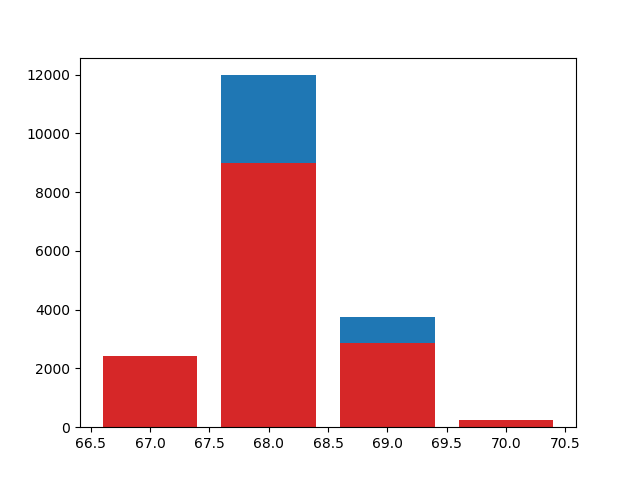

<IPython.core.display.Javascript object>


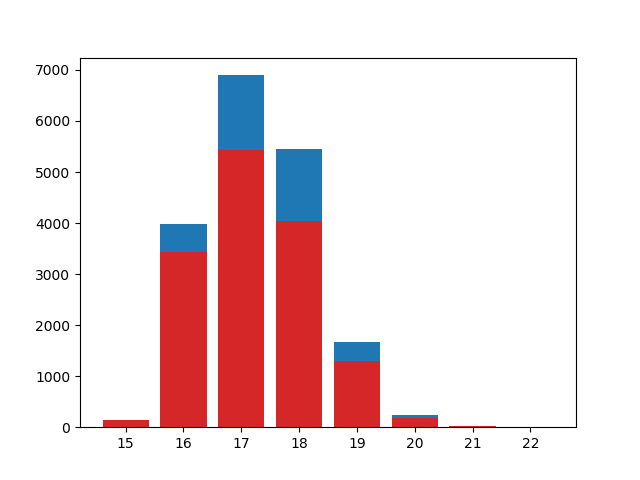

<IPython.core.display.Javascript object>


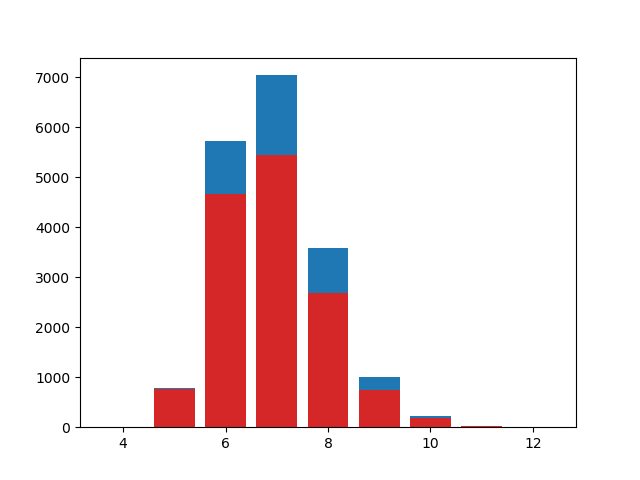

<IPython.core.display.Javascript object>


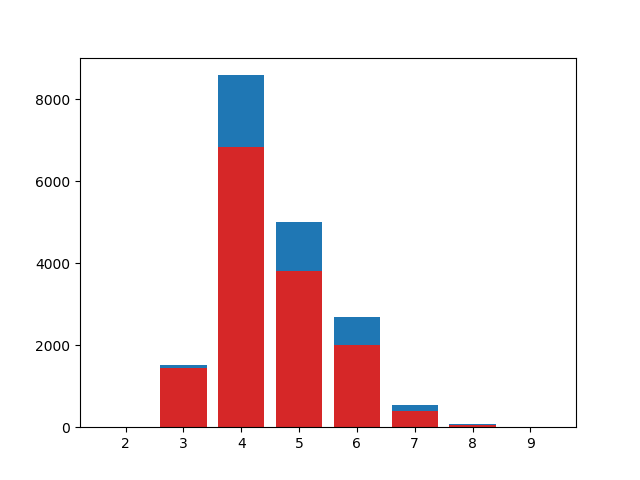

<IPython.core.display.Javascript object>


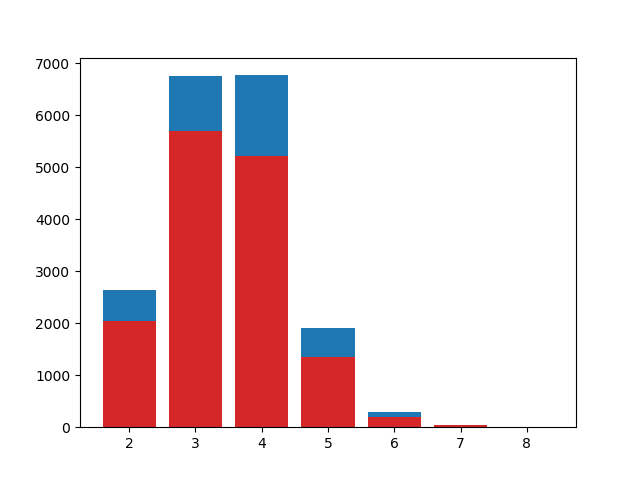

<IPython.core.display.Javascript object>


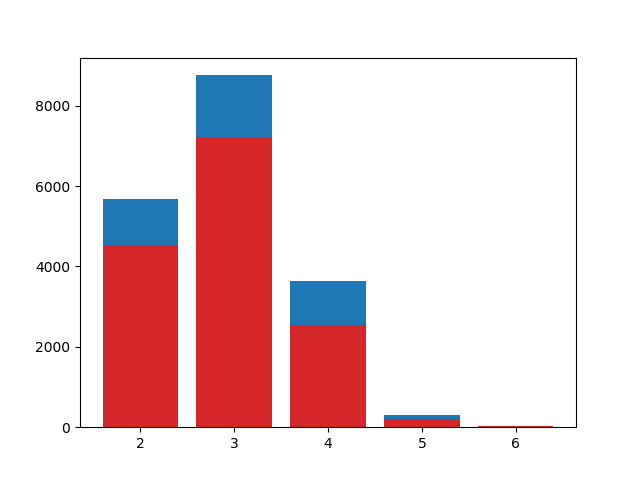

<IPython.core.display.Javascript object>


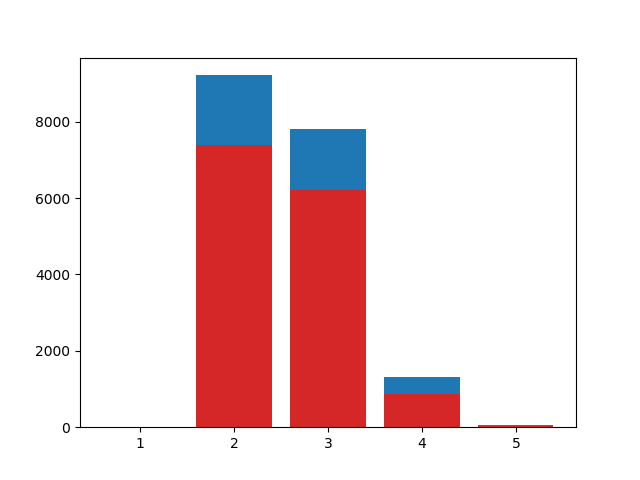

<IPython.core.display.Javascript object>


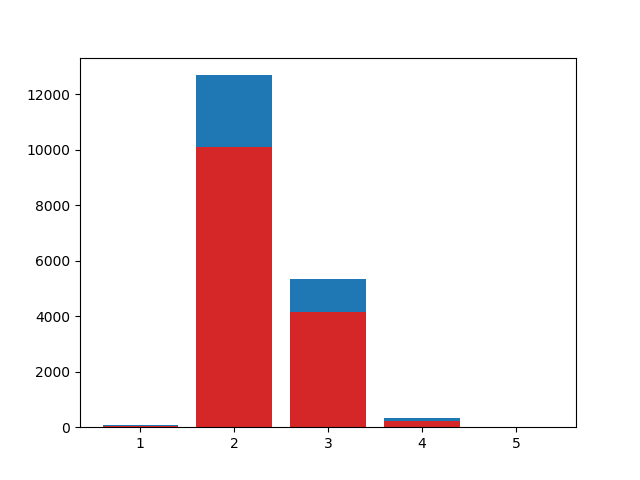

<IPython.core.display.Javascript object>


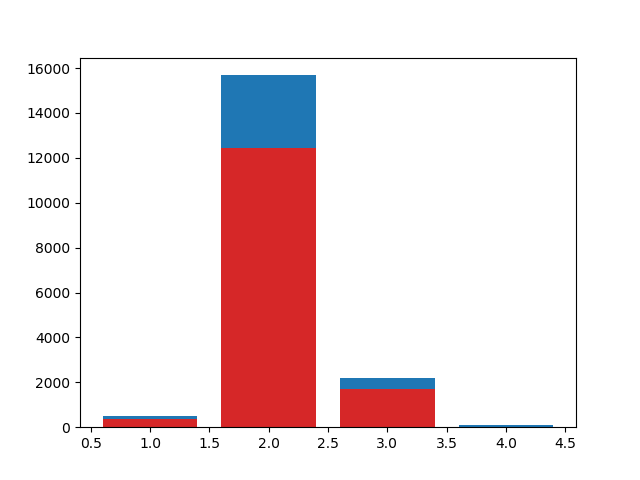

<IPython.core.display.Javascript object>


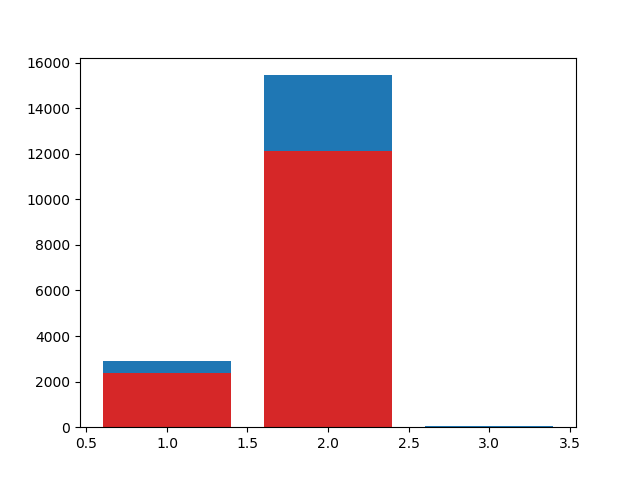

In [155]:
for l in range (0,10):
    idxs= np.where(h0[l] > 0)[0]
    v = h0[l][idxs]
    figure(l)
    bar(idxs, v)

<IPython.core.display.Javascript object>


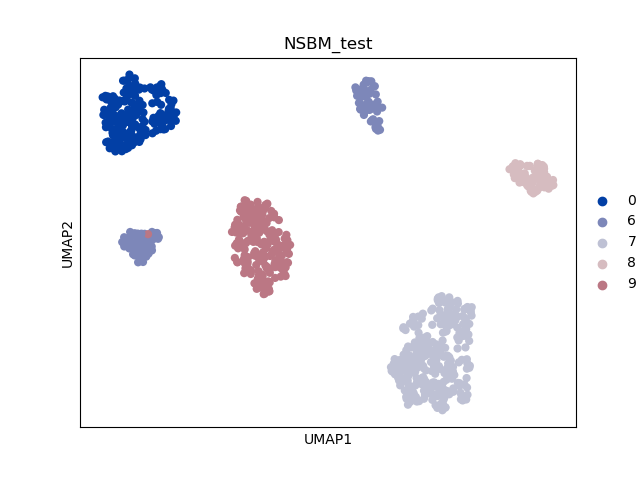

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0   176      7      0       0
6            61     0     56      0       0
7             0     0      0    295       0
8             0     0     71      0       0
9             1     0      4      1     188

In [156]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state0.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### seconda prova

In [110]:
gt.mcmc_equilibrate(state, mcmc_args=dict(niter=10), callback=collect_num_groups,verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 19539.918  max_S: 19548.578  S: 19539.918  ΔS:     -8.66029  moves:  3018 
niter:     2  count:    0  breaks:  0  min_S: 19539.918  max_S: 19560.487  S: 19560.487  ΔS:      20.5695  moves:  3003 
niter:     3  count:    1  breaks:  0  min_S: 19539.918  max_S: 19560.487  S: 19545.792  ΔS:     -14.6959  moves:  2987 
niter:     4  count:    2  breaks:  0  min_S: 19539.918  max_S: 19560.487  S: 19558.322  ΔS:      12.5308  moves:  3073 
niter:     5  count:    0  breaks:  0  min_S: 19539.918  max_S: 19577.371  S: 19577.371  ΔS:      19.0482  moves:  2989 
niter:     6  count:    1  breaks:  0  min_S: 19539.918  max_S: 19577.371  S: 19564.670  ΔS:     -12.7005  moves:  3078 
niter:     7  count:    2  breaks:  0  min_S: 19539.918  max_S: 19577.371  S: 19563.166  ΔS:     -1.50373  moves:  3133 
niter:     8  count:    3  breaks:  0  min_S: 19539.918  max_S: 19577.371  S: 19564.287  ΔS:      1.12078  moves:  3079 
niter:     9  count:    4  break

niter:    81  count:    4  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19559.912  ΔS:     -4.00862  moves:  3008 
niter:    82  count:    5  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19546.168  ΔS:     -13.7444  moves:  2984 
niter:    83  count:    6  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19572.964  ΔS:      26.7965  moves:  3002 
niter:    84  count:    7  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19581.473  ΔS:      8.50833  moves:  3011 
niter:    85  count:    8  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19559.791  ΔS:     -21.6817  moves:  3026 
niter:    86  count:    9  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19573.208  ΔS:      13.4172  moves:  3105 
niter:    87  count:   10  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19561.751  ΔS:     -11.4570  moves:  3074 
niter:    88  count:   11  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19568.761  ΔS:      7.00971  moves:  3027 
niter:    89  count:   12  break

niter:   151  count:   74  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19594.624  ΔS:      34.8943  moves:  3030 
niter:   152  count:   75  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19580.791  ΔS:     -13.8332  moves:  2976 
niter:   153  count:   76  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19565.951  ΔS:     -14.8398  moves:  3055 
niter:   154  count:   77  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19568.439  ΔS:      2.48747  moves:  2944 
niter:   155  count:   78  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19554.682  ΔS:     -13.7566  moves:  2977 
niter:   156  count:   79  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19558.221  ΔS:      3.53870  moves:  3013 
niter:   157  count:   80  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19570.648  ΔS:      12.4272  moves:  3007 
niter:   158  count:   81  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19576.157  ΔS:      5.50941  moves:  3021 
niter:   159  count:   82  break

niter:   223  count:  146  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19605.822  ΔS:      24.1905  moves:  2997 
niter:   224  count:  147  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19575.045  ΔS:     -30.7771  moves:  3038 
niter:   225  count:  148  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19581.974  ΔS:      6.92877  moves:  2968 
niter:   226  count:  149  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19587.927  ΔS:      5.95274  moves:  3012 
niter:   227  count:  150  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19563.848  ΔS:     -24.0789  moves:  3016 
niter:   228  count:  151  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19575.491  ΔS:      11.6429  moves:  2941 
niter:   229  count:  152  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19567.535  ΔS:     -7.95522  moves:  3012 
niter:   230  count:  153  breaks:  0  min_S: 19532.406  max_S: 19615.048  S: 19602.556  ΔS:      35.0203  moves:  3008 
niter:   231  count:  154  break

niter:   297  count:    1  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19551.510  ΔS:      29.5790  moves:  3100 
niter:   298  count:    2  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19536.656  ΔS:     -14.8542  moves:  3045 
niter:   299  count:    3  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19542.957  ΔS:      6.30105  moves:  3070 
niter:   300  count:    4  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19569.348  ΔS:      26.3915  moves:  3026 
niter:   301  count:    5  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19545.988  ΔS:     -23.3608  moves:  3072 
niter:   302  count:    6  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19559.094  ΔS:      13.1067  moves:  2999 
niter:   303  count:    7  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.778  ΔS:      5.68366  moves:  2988 
niter:   304  count:    8  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19565.698  ΔS:     0.919661  moves:  3002 
niter:   305  count:    9  break

niter:   366  count:   70  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19578.263  ΔS:      4.98711  moves:  3009 
niter:   367  count:   71  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19573.083  ΔS:     -5.17991  moves:  2949 
niter:   368  count:   72  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19579.144  ΔS:      6.06120  moves:  3077 
niter:   369  count:   73  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19576.105  ΔS:     -3.03843  moves:  3030 
niter:   370  count:   74  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19556.918  ΔS:     -19.1878  moves:  3003 
niter:   371  count:   75  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19576.252  ΔS:      19.3340  moves:  3003 
niter:   372  count:   76  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19571.476  ΔS:     -4.77547  moves:  3016 
niter:   373  count:   77  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19570.138  ΔS:     -1.33845  moves:  3025 
niter:   374  count:   78  break

niter:   437  count:  141  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19560.809  ΔS:      2.56528  moves:  3002 
niter:   438  count:  142  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.339  ΔS:      3.53004  moves:  2990 
niter:   439  count:  143  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19575.023  ΔS:      10.6837  moves:  3110 
niter:   440  count:  144  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19563.993  ΔS:     -11.0300  moves:  3097 
niter:   441  count:  145  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19592.944  ΔS:      28.9508  moves:  3081 
niter:   442  count:  146  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19584.279  ΔS:     -8.66470  moves:  2990 
niter:   443  count:  147  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19566.588  ΔS:     -17.6910  moves:  3004 
niter:   444  count:  148  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19573.465  ΔS:      6.87731  moves:  3050 
niter:   445  count:  149  break

niter:   513  count:  217  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19549.443  ΔS:     -37.6667  moves:  2945 
niter:   514  count:  218  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.020  ΔS:      14.5772  moves:  2937 
niter:   515  count:  219  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19587.788  ΔS:      23.7679  moves:  3029 
niter:   516  count:  220  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19580.173  ΔS:     -7.61432  moves:  2984 
niter:   517  count:  221  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19590.040  ΔS:      9.86680  moves:  2940 
niter:   518  count:  222  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19590.402  ΔS:     0.362281  moves:  2937 
niter:   519  count:  223  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19607.749  ΔS:      17.3462  moves:  3008 
niter:   520  count:  224  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19572.485  ΔS:     -35.2634  moves:  2924 
niter:   521  count:  225  break

niter:   589  count:  293  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19614.799  ΔS:      26.1678  moves:  3012 
niter:   590  count:  294  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19576.129  ΔS:     -38.6699  moves:  2937 
niter:   591  count:  295  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19569.170  ΔS:     -6.95923  moves:  2964 
niter:   592  count:  296  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19587.683  ΔS:      18.5127  moves:  3020 
niter:   593  count:  297  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19561.247  ΔS:     -26.4353  moves:  3028 
niter:   594  count:  298  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19552.422  ΔS:     -8.82552  moves:  3014 
niter:   595  count:  299  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.782  ΔS:      12.3606  moves:  2967 
niter:   596  count:  300  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19561.578  ΔS:     -3.20457  moves:  2922 
niter:   597  count:  301  break

niter:   657  count:  361  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19548.842  ΔS:     -32.6512  moves:  2907 
niter:   658  count:  362  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19579.958  ΔS:      31.1168  moves:  2949 
niter:   659  count:  363  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19585.073  ΔS:      5.11499  moves:  3027 
niter:   660  count:  364  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19598.291  ΔS:      13.2173  moves:  2994 
niter:   661  count:  365  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19573.201  ΔS:     -25.0896  moves:  3022 
niter:   662  count:  366  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19573.417  ΔS:     0.216324  moves:  3137 
niter:   663  count:  367  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19586.270  ΔS:      12.8522  moves:  3036 
niter:   664  count:  368  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19576.072  ΔS:     -10.1975  moves:  3068 
niter:   665  count:  369  break

niter:   734  count:  438  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19547.354  ΔS:     -10.6602  moves:  2976 
niter:   735  count:  439  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19554.316  ΔS:      6.96184  moves:  2960 
niter:   736  count:  440  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19569.434  ΔS:      15.1182  moves:  2985 
niter:   737  count:  441  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19555.351  ΔS:     -14.0830  moves:  2954 
niter:   738  count:  442  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19555.958  ΔS:     0.606392  moves:  3065 
niter:   739  count:  443  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19587.321  ΔS:      31.3631  moves:  3034 
niter:   740  count:  444  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19573.999  ΔS:     -13.3218  moves:  3037 
niter:   741  count:  445  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19570.102  ΔS:     -3.89715  moves:  2995 
niter:   742  count:  446  break

niter:   811  count:  515  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19594.853  ΔS:      31.9208  moves:  2958 
niter:   812  count:  516  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19602.464  ΔS:      7.61163  moves:  2942 
niter:   813  count:  517  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19583.227  ΔS:     -19.2374  moves:  2956 
niter:   814  count:  518  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19578.196  ΔS:     -5.03119  moves:  2997 
niter:   815  count:  519  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19586.640  ΔS:      8.44406  moves:  3001 
niter:   816  count:  520  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19589.771  ΔS:      3.13119  moves:  3024 
niter:   817  count:  521  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19561.088  ΔS:     -28.6830  moves:  2977 
niter:   818  count:  522  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19584.959  ΔS:      23.8705  moves:  2998 
niter:   819  count:  523  break

niter:   884  count:  588  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19587.824  ΔS:     -11.0348  moves:  2977 
niter:   885  count:  589  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19571.953  ΔS:     -15.8717  moves:  2964 
niter:   886  count:  590  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19589.417  ΔS:      17.4645  moves:  3064 
niter:   887  count:  591  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19590.003  ΔS:     0.585580  moves:  3063 
niter:   888  count:  592  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19584.424  ΔS:     -5.57885  moves:  3028 
niter:   889  count:  593  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19581.174  ΔS:     -3.24988  moves:  3003 
niter:   890  count:  594  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19582.406  ΔS:      1.23239  moves:  2922 
niter:   891  count:  595  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19609.308  ΔS:      26.9022  moves:  3038 
niter:   892  count:  596  break

niter:   952  count:  656  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19548.314  ΔS:     -10.8423  moves:  3005 
niter:   953  count:  657  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19531.430  ΔS:     -16.8839  moves:  3136 
niter:   954  count:  658  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19530.278  ΔS:     -1.15245  moves:  2985 
niter:   955  count:  659  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19557.258  ΔS:      26.9806  moves:  3108 
niter:   956  count:  660  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19562.509  ΔS:      5.25064  moves:  3027 
niter:   957  count:  661  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19554.749  ΔS:     -7.76048  moves:  2979 
niter:   958  count:  662  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19526.729  ΔS:     -28.0192  moves:  3070 
niter:   959  count:  663  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19560.054  ΔS:      33.3247  moves:  2962 
niter:   960  count:  664  break

niter:  1030  count:  734  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19612.339  ΔS:      7.40014  moves:  3043 
niter:  1031  count:  735  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19568.000  ΔS:     -44.3383  moves:  3070 
niter:  1032  count:  736  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19582.398  ΔS:      14.3981  moves:  3092 
niter:  1033  count:  737  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19588.432  ΔS:      6.03385  moves:  3036 
niter:  1034  count:  738  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19590.717  ΔS:      2.28493  moves:  3015 
niter:  1035  count:  739  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19576.608  ΔS:     -14.1096  moves:  3076 
niter:  1036  count:  740  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.263  ΔS:     -12.3443  moves:  2997 
niter:  1037  count:  741  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19586.944  ΔS:      22.6803  moves:  3062 
niter:  1038  count:  742  break

niter:  1103  count:  807  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19534.985  ΔS:     -22.8847  moves:  2995 
niter:  1104  count:  808  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19545.045  ΔS:      10.0595  moves:  2897 
niter:  1105  count:  809  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19560.899  ΔS:      15.8542  moves:  2965 
niter:  1106  count:  810  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19543.973  ΔS:     -16.9257  moves:  2979 
niter:  1107  count:  811  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19565.601  ΔS:      21.6283  moves:  2980 
niter:  1108  count:  812  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19554.236  ΔS:     -11.3650  moves:  2962 
niter:  1109  count:  813  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19568.004  ΔS:      13.7673  moves:  2901 
niter:  1110  count:  814  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19546.629  ΔS:     -21.3743  moves:  2961 
niter:  1111  count:  815  break

niter:  1174  count:  878  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19538.485  ΔS:     -29.4755  moves:  3011 
niter:  1175  count:  879  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.774  ΔS:      26.2886  moves:  2942 
niter:  1176  count:  880  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19542.684  ΔS:     -22.0901  moves:  2980 
niter:  1177  count:  881  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19554.588  ΔS:      11.9045  moves:  2954 
niter:  1178  count:  882  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19553.255  ΔS:     -1.33318  moves:  2872 
niter:  1179  count:  883  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19550.465  ΔS:     -2.78945  moves:  2991 
niter:  1180  count:  884  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19564.471  ΔS:      14.0059  moves:  3024 
niter:  1181  count:  885  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19559.847  ΔS:     -4.62464  moves:  3004 
niter:  1182  count:  886  break

niter:  1249  count:  953  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19553.564  ΔS:     -25.5787  moves:  3092 
niter:  1250  count:  954  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19571.560  ΔS:      17.9963  moves:  3020 
niter:  1251  count:  955  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19558.264  ΔS:     -13.2965  moves:  3017 
niter:  1252  count:  956  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19544.942  ΔS:     -13.3219  moves:  3054 
niter:  1253  count:  957  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19536.733  ΔS:     -8.20939  moves:  3028 
niter:  1254  count:  958  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19530.298  ΔS:     -6.43489  moves:  3051 
niter:  1255  count:  959  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19557.776  ΔS:      27.4786  moves:  3012 
niter:  1256  count:  960  breaks:  0  min_S: 19521.931  max_S: 19624.722  S: 19534.797  ΔS:     -22.9796  moves:  3025 
niter:  1257  count:  961  break

niter:  1320  count:    6  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19571.703  ΔS:     -1.98337  moves:  2944 
niter:  1321  count:    7  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19577.038  ΔS:      5.33517  moves:  3018 
niter:  1322  count:    8  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19588.336  ΔS:      11.2980  moves:  2944 
niter:  1323  count:    9  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19596.202  ΔS:      7.86549  moves:  3005 
niter:  1324  count:   10  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19579.879  ΔS:     -16.3224  moves:  2976 
niter:  1325  count:   11  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19564.131  ΔS:     -15.7480  moves:  2948 
niter:  1326  count:   12  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19551.984  ΔS:     -12.1479  moves:  2938 
niter:  1327  count:   13  breaks:  1  min_S: 19546.645  max_S: 19601.288  S: 19567.824  ΔS:      15.8406  moves:  3030 
niter:  1328  count:    0  break

niter:  1395  count:   47  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19542.346  ΔS:     -4.95669  moves:  3014 
niter:  1396  count:   48  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19561.135  ΔS:      18.7896  moves:  2997 
niter:  1397  count:   49  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19560.008  ΔS:     -1.12740  moves:  2981 
niter:  1398  count:   50  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19574.083  ΔS:      14.0752  moves:  3042 
niter:  1399  count:   51  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19577.616  ΔS:      3.53305  moves:  3026 
niter:  1400  count:   52  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19577.373  ΔS:    -0.243225  moves:  2954 
niter:  1401  count:   53  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19568.758  ΔS:     -8.61531  moves:  3025 
niter:  1402  count:   54  breaks:  1  min_S: 19530.576  max_S: 19601.288  S: 19596.564  ΔS:      27.8062  moves:  3057 
niter:  1403  count:   55  break

niter:  1471  count:   53  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19536.862  ΔS:     -21.7372  moves:  2895 
niter:  1472  count:   54  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19563.491  ΔS:      26.6293  moves:  3023 
niter:  1473  count:   55  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19602.444  ΔS:      38.9533  moves:  3027 
niter:  1474  count:   56  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19582.910  ΔS:     -19.5345  moves:  2933 
niter:  1475  count:   57  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19578.857  ΔS:     -4.05294  moves:  3074 
niter:  1476  count:   58  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19579.679  ΔS:     0.821947  moves:  2973 
niter:  1477  count:   59  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19577.425  ΔS:     -2.25332  moves:  3028 
niter:  1478  count:   60  breaks:  1  min_S: 19530.576  max_S: 19621.430  S: 19587.081  ΔS:      9.65590  moves:  2933 
niter:  1479  count:   61  break

niter:  1542  count:   30  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19575.031  ΔS:      14.6254  moves:  2929 
niter:  1543  count:   31  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19573.320  ΔS:     -1.71066  moves:  2922 
niter:  1544  count:   32  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19552.089  ΔS:     -21.2319  moves:  2957 
niter:  1545  count:   33  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19565.821  ΔS:      13.7329  moves:  2927 
niter:  1546  count:   34  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19590.746  ΔS:      24.9243  moves:  2929 
niter:  1547  count:   35  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19572.921  ΔS:     -17.8251  moves:  3015 
niter:  1548  count:   36  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19590.769  ΔS:      17.8487  moves:  2997 
niter:  1549  count:   37  breaks:  1  min_S: 19530.576  max_S: 19625.468  S: 19577.886  ΔS:     -12.8831  moves:  2918 
niter:  1550  count:   38  break

niter:  1619  count:   42  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19586.075  ΔS:   0.00899590  moves:  2951 
niter:  1620  count:   43  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19570.419  ΔS:     -15.6567  moves:  2967 
niter:  1621  count:   44  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19576.492  ΔS:      6.07358  moves:  2962 
niter:  1622  count:   45  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19614.617  ΔS:      38.1252  moves:  2974 
niter:  1623  count:   46  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19594.475  ΔS:     -20.1424  moves:  2999 
niter:  1624  count:   47  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19564.011  ΔS:     -30.4642  moves:  3011 
niter:  1625  count:   48  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19559.271  ΔS:     -4.73945  moves:  3045 
niter:  1626  count:   49  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19589.588  ΔS:      30.3166  moves:  3006 
niter:  1627  count:   50  break

niter:  1688  count:  111  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19602.664  ΔS:      21.7133  moves:  2966 
niter:  1689  count:  112  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19582.868  ΔS:     -19.7951  moves:  2935 
niter:  1690  count:  113  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19582.163  ΔS:    -0.705133  moves:  2935 
niter:  1691  count:  114  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19561.962  ΔS:     -20.2011  moves:  2937 
niter:  1692  count:  115  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19583.210  ΔS:      21.2477  moves:  3042 
niter:  1693  count:  116  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19562.718  ΔS:     -20.4920  moves:  2963 
niter:  1694  count:  117  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19545.964  ΔS:     -16.7537  moves:  3008 
niter:  1695  count:  118  breaks:  1  min_S: 19528.455  max_S: 19625.468  S: 19556.492  ΔS:      10.5278  moves:  2968 
niter:  1696  count:  119  break

niter:  1765  count:   61  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19558.135  ΔS:     -9.00077  moves:  3003 
niter:  1766  count:   62  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19562.396  ΔS:      4.26079  moves:  2967 
niter:  1767  count:   63  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19565.129  ΔS:      2.73301  moves:  2954 
niter:  1768  count:   64  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19557.516  ΔS:     -7.61298  moves:  2926 
niter:  1769  count:   65  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19569.465  ΔS:      11.9494  moves:  3017 
niter:  1770  count:   66  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19559.368  ΔS:     -10.0972  moves:  2938 
niter:  1771  count:   67  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19571.688  ΔS:      12.3198  moves:  2987 
niter:  1772  count:   68  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19570.386  ΔS:     -1.30163  moves:  2923 
niter:  1773  count:   69  break

niter:  1835  count:  131  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19557.321  ΔS:     -2.81883  moves:  2980 
niter:  1836  count:  132  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19559.714  ΔS:      2.39360  moves:  2999 
niter:  1837  count:  133  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19594.437  ΔS:      34.7229  moves:  2950 
niter:  1838  count:  134  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19550.806  ΔS:     -43.6310  moves:  2938 
niter:  1839  count:  135  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19569.523  ΔS:      18.7170  moves:  2975 
niter:  1840  count:  136  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19570.913  ΔS:      1.38955  moves:  2950 
niter:  1841  count:  137  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19563.104  ΔS:     -7.80870  moves:  2921 
niter:  1842  count:  138  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19552.980  ΔS:     -10.1241  moves:  2883 
niter:  1843  count:  139  break

niter:  1912  count:  208  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19554.417  ΔS:     -19.0979  moves:  2918 
niter:  1913  count:  209  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19551.991  ΔS:     -2.42578  moves:  2972 
niter:  1914  count:  210  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19568.250  ΔS:      16.2592  moves:  3016 
niter:  1915  count:  211  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19567.164  ΔS:     -1.08657  moves:  3056 
niter:  1916  count:  212  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19557.107  ΔS:     -10.0566  moves:  3043 
niter:  1917  count:  213  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19547.589  ΔS:     -9.51884  moves:  2908 
niter:  1918  count:  214  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19560.532  ΔS:      12.9432  moves:  2971 
niter:  1919  count:  215  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19562.419  ΔS:      1.88714  moves:  3026 
niter:  1920  count:  216  break

niter:  1989  count:  285  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19553.832  ΔS:     -1.17394  moves:  2971 
niter:  1990  count:  286  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19551.115  ΔS:     -2.71661  moves:  3059 
niter:  1991  count:  287  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19546.812  ΔS:     -4.30302  moves:  2996 
niter:  1992  count:  288  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19551.594  ΔS:      4.78225  moves:  2953 
niter:  1993  count:  289  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19544.276  ΔS:     -7.31850  moves:  3059 
niter:  1994  count:  290  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19544.637  ΔS:     0.361711  moves:  3008 
niter:  1995  count:  291  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19552.428  ΔS:      7.79030  moves:  3006 
niter:  1996  count:  292  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19566.980  ΔS:      14.5527  moves:  3023 
niter:  1997  count:  293  break

niter:  2067  count:  363  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19594.416  ΔS:      16.1391  moves:  3103 
niter:  2068  count:  364  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19590.778  ΔS:     -3.63809  moves:  3092 
niter:  2069  count:  365  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19586.857  ΔS:     -3.92037  moves:  3139 
niter:  2070  count:  366  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19588.373  ΔS:      1.51580  moves:  3055 
niter:  2071  count:  367  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19595.160  ΔS:      6.78708  moves:  3103 
niter:  2072  count:  368  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19575.917  ΔS:     -19.2429  moves:  3083 
niter:  2073  count:  369  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19571.978  ΔS:     -3.93907  moves:  3009 
niter:  2074  count:  370  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19574.837  ΔS:      2.85910  moves:  3055 
niter:  2075  count:  371  break

niter:  2148  count:  444  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19569.754  ΔS:    -0.441282  moves:  3031 
niter:  2149  count:  445  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19566.626  ΔS:     -3.12749  moves:  3018 
niter:  2150  count:  446  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19559.701  ΔS:     -6.92493  moves:  3014 
niter:  2151  count:  447  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19539.049  ΔS:     -20.6522  moves:  3062 
niter:  2152  count:  448  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19565.105  ΔS:      26.0564  moves:  2999 
niter:  2153  count:  449  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19602.178  ΔS:      37.0728  moves:  2995 
niter:  2154  count:  450  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19604.218  ΔS:      2.04015  moves:  3066 
niter:  2155  count:  451  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19575.190  ΔS:     -29.0282  moves:  3060 
niter:  2156  count:  452  break

niter:  2224  count:  520  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19555.105  ΔS:      7.02381  moves:  2870 
niter:  2225  count:  521  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19573.288  ΔS:      18.1832  moves:  2973 
niter:  2226  count:  522  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19577.285  ΔS:      3.99623  moves:  2960 
niter:  2227  count:  523  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19576.458  ΔS:    -0.826226  moves:  3015 
niter:  2228  count:  524  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19572.370  ΔS:     -4.08830  moves:  2978 
niter:  2229  count:  525  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19568.863  ΔS:     -3.50745  moves:  3000 
niter:  2230  count:  526  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19586.187  ΔS:      17.3245  moves:  3006 
niter:  2231  count:  527  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19583.423  ΔS:     -2.76426  moves:  3013 
niter:  2232  count:  528  break

niter:  2305  count:  601  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19582.158  ΔS:      12.6537  moves:  3003 
niter:  2306  count:  602  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19597.927  ΔS:      15.7690  moves:  3002 
niter:  2307  count:  603  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19575.739  ΔS:     -22.1886  moves:  3023 
niter:  2308  count:  604  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19601.009  ΔS:      25.2702  moves:  2946 
niter:  2309  count:  605  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19558.306  ΔS:     -42.7026  moves:  2994 
niter:  2310  count:  606  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19552.777  ΔS:     -5.52950  moves:  2993 
niter:  2311  count:  607  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19532.226  ΔS:     -20.5505  moves:  3052 
niter:  2312  count:  608  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19540.676  ΔS:      8.44955  moves:  3013 
niter:  2313  count:  609  break

niter:  2384  count:  680  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19557.240  ΔS:      25.9665  moves:  2961 
niter:  2385  count:  681  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19562.349  ΔS:      5.10946  moves:  2915 
niter:  2386  count:  682  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19549.672  ΔS:     -12.6773  moves:  2904 
niter:  2387  count:  683  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19554.074  ΔS:      4.40212  moves:  2979 
niter:  2388  count:  684  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19533.265  ΔS:     -20.8090  moves:  3076 
niter:  2389  count:  685  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19546.351  ΔS:      13.0859  moves:  3049 
niter:  2390  count:  686  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19541.618  ΔS:     -4.73346  moves:  2970 
niter:  2391  count:  687  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19556.759  ΔS:      15.1416  moves:  2969 
niter:  2392  count:  688  break

niter:  2458  count:  754  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19556.035  ΔS:     -31.9725  moves:  2937 
niter:  2459  count:  755  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19539.572  ΔS:     -16.4633  moves:  2990 
niter:  2460  count:  756  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19553.205  ΔS:      13.6331  moves:  2983 
niter:  2461  count:  757  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19556.397  ΔS:      3.19194  moves:  3028 
niter:  2462  count:  758  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19557.298  ΔS:     0.900851  moves:  3026 
niter:  2463  count:  759  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19552.025  ΔS:     -5.27242  moves:  3096 
niter:  2464  count:  760  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19573.789  ΔS:      21.7638  moves:  3001 
niter:  2465  count:  761  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19578.042  ΔS:      4.25267  moves:  3031 
niter:  2466  count:  762  break

niter:  2535  count:  831  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19546.190  ΔS:     -29.4893  moves:  2946 
niter:  2536  count:  832  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19603.493  ΔS:      57.3030  moves:  2985 
niter:  2537  count:  833  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19586.642  ΔS:     -16.8510  moves:  3010 
niter:  2538  count:  834  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19580.936  ΔS:     -5.70632  moves:  2970 
niter:  2539  count:  835  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19573.630  ΔS:     -7.30593  moves:  3038 
niter:  2540  count:  836  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19569.955  ΔS:     -3.67470  moves:  2948 
niter:  2541  count:  837  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19572.448  ΔS:      2.49286  moves:  2958 
niter:  2542  count:  838  breaks:  1  min_S: 19523.899  max_S: 19625.468  S: 19561.368  ΔS:     -11.0803  moves:  3029 
niter:  2543  count:  839  break

niter:  2615  count:   22  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19567.918  ΔS:     -13.9937  moves:  3050 
niter:  2616  count:   23  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19565.332  ΔS:     -2.58566  moves:  3085 
niter:  2617  count:   24  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19570.305  ΔS:      4.97271  moves:  2961 
niter:  2618  count:   25  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19557.366  ΔS:     -12.9386  moves:  3047 
niter:  2619  count:   26  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19567.157  ΔS:      9.79048  moves:  3038 
niter:  2620  count:   27  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19564.975  ΔS:     -2.18177  moves:  3017 
niter:  2621  count:   28  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19540.417  ΔS:     -24.5583  moves:  2932 
niter:  2622  count:   29  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19558.938  ΔS:      18.5210  moves:  2997 
niter:  2623  count:   30  break

niter:  2684  count:   91  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19542.226  ΔS:     -15.0896  moves:  3003 
niter:  2685  count:   92  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19532.222  ΔS:     -10.0035  moves:  3007 
niter:  2686  count:   93  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19572.740  ΔS:      40.5176  moves:  2994 
niter:  2687  count:   94  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19576.328  ΔS:      3.58771  moves:  3063 
niter:  2688  count:   95  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19563.944  ΔS:     -12.3832  moves:  3026 
niter:  2689  count:   96  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19581.831  ΔS:      17.8870  moves:  3114 
niter:  2690  count:   97  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19578.209  ΔS:     -3.62231  moves:  3048 
niter:  2691  count:   98  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19564.038  ΔS:     -14.1715  moves:  3001 
niter:  2692  count:   99  break

niter:  2760  count:  167  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19555.469  ΔS:     -30.3960  moves:  2992 
niter:  2761  count:  168  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19538.158  ΔS:     -17.3112  moves:  3071 
niter:  2762  count:  169  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19573.974  ΔS:      35.8165  moves:  2945 
niter:  2763  count:  170  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19554.245  ΔS:     -19.7291  moves:  2869 
niter:  2764  count:  171  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19561.262  ΔS:      7.01684  moves:  3011 
niter:  2765  count:  172  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19556.826  ΔS:     -4.43605  moves:  2984 
niter:  2766  count:  173  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19596.103  ΔS:      39.2775  moves:  2988 
niter:  2767  count:  174  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19575.771  ΔS:     -20.3321  moves:  3049 
niter:  2768  count:  175  break

niter:  2834  count:  241  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19599.618  ΔS:      28.3661  moves:  2994 
niter:  2835  count:  242  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19572.514  ΔS:     -27.1041  moves:  3022 
niter:  2836  count:  243  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19561.174  ΔS:     -11.3399  moves:  3066 
niter:  2837  count:  244  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19550.702  ΔS:     -10.4722  moves:  3080 
niter:  2838  count:  245  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19567.976  ΔS:      17.2745  moves:  3053 
niter:  2839  count:  246  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19552.850  ΔS:     -15.1256  moves:  3031 
niter:  2840  count:  247  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19577.456  ΔS:      24.6051  moves:  3077 
niter:  2841  count:  248  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19560.937  ΔS:     -16.5187  moves:  3051 
niter:  2842  count:  249  break

niter:  2911  count:  318  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19588.043  ΔS:      14.7025  moves:  2972 
niter:  2912  count:  319  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19592.537  ΔS:      4.49422  moves:  2971 
niter:  2913  count:  320  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19600.202  ΔS:      7.66490  moves:  3001 
niter:  2914  count:  321  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19572.613  ΔS:     -27.5890  moves:  3038 
niter:  2915  count:  322  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19564.008  ΔS:     -8.60510  moves:  2961 
niter:  2916  count:  323  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19580.054  ΔS:      16.0458  moves:  2928 
niter:  2917  count:  324  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19571.391  ΔS:     -8.66259  moves:  2986 
niter:  2918  count:  325  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19551.900  ΔS:     -19.4919  moves:  2859 
niter:  2919  count:  326  break

niter:  2990  count:  397  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19569.075  ΔS:     -24.3440  moves:  3028 
niter:  2991  count:  398  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19574.879  ΔS:      5.80431  moves:  3028 
niter:  2992  count:  399  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19569.622  ΔS:     -5.25637  moves:  3018 
niter:  2993  count:  400  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19563.494  ΔS:     -6.12835  moves:  2930 
niter:  2994  count:  401  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19602.378  ΔS:      38.8841  moves:  3038 
niter:  2995  count:  402  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19583.496  ΔS:     -18.8817  moves:  2988 
niter:  2996  count:  403  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19574.101  ΔS:     -9.39536  moves:  2964 
niter:  2997  count:  404  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19604.326  ΔS:      30.2253  moves:  3012 
niter:  2998  count:  405  break

niter:  3068  count:  475  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19557.413  ΔS:     -19.2246  moves:  2947 
niter:  3069  count:  476  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19595.086  ΔS:      37.6733  moves:  3003 
niter:  3070  count:  477  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19558.110  ΔS:     -36.9764  moves:  2981 
niter:  3071  count:  478  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19563.292  ΔS:      5.18243  moves:  3012 
niter:  3072  count:  479  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19552.852  ΔS:     -10.4398  moves:  2978 
niter:  3073  count:  480  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19559.784  ΔS:      6.93163  moves:  2948 
niter:  3074  count:  481  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19543.954  ΔS:     -15.8303  moves:  2949 
niter:  3075  count:  482  breaks:  1  min_S: 19523.899  max_S: 19626.925  S: 19543.641  ΔS:    -0.312979  moves:  2936 
niter:  3076  count:  483  break

niter:  3142  count:   27  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19552.248  ΔS:      10.5081  moves:  2932 
niter:  3143  count:   28  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19553.484  ΔS:      1.23653  moves:  3010 
niter:  3144  count:   29  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19546.170  ΔS:     -7.31458  moves:  2942 
niter:  3145  count:   30  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19551.639  ΔS:      5.46945  moves:  2983 
niter:  3146  count:   31  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19560.961  ΔS:      9.32173  moves:  2937 
niter:  3147  count:   32  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19540.772  ΔS:     -20.1888  moves:  2943 
niter:  3148  count:   33  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19537.803  ΔS:     -2.96868  moves:  2985 
niter:  3149  count:   34  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19527.538  ΔS:     -10.2649  moves:  2987 
niter:  3150  count:   35  break

niter:  3211  count:   96  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19573.094  ΔS:      28.5323  moves:  2947 
niter:  3212  count:   97  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19552.009  ΔS:     -21.0857  moves:  2989 
niter:  3213  count:   98  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19561.420  ΔS:      9.41110  moves:  2927 
niter:  3214  count:   99  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19551.687  ΔS:     -9.73252  moves:  2923 
niter:  3215  count:  100  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19557.089  ΔS:      5.40209  moves:  2953 
niter:  3216  count:  101  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19556.595  ΔS:    -0.494632  moves:  2980 
niter:  3217  count:  102  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19543.806  ΔS:     -12.7882  moves:  2941 
niter:  3218  count:  103  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19571.905  ΔS:      28.0982  moves:  2821 
niter:  3219  count:  104  break

niter:  3291  count:  176  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19584.508  ΔS:     -3.07731  moves:  2971 
niter:  3292  count:  177  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19550.458  ΔS:     -34.0501  moves:  2958 
niter:  3293  count:  178  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19558.302  ΔS:      7.84460  moves:  2986 
niter:  3294  count:  179  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19565.389  ΔS:      7.08661  moves:  2930 
niter:  3295  count:  180  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19558.101  ΔS:     -7.28742  moves:  3028 
niter:  3296  count:  181  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19555.752  ΔS:     -2.34974  moves:  2963 
niter:  3297  count:  182  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19559.254  ΔS:      3.50260  moves:  2983 
niter:  3298  count:  183  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19576.817  ΔS:      17.5626  moves:  2920 
niter:  3299  count:  184  break

niter:  3373  count:  258  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19561.281  ΔS:      15.8052  moves:  2959 
niter:  3374  count:  259  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19552.489  ΔS:     -8.79187  moves:  3045 
niter:  3375  count:  260  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19551.001  ΔS:     -1.48812  moves:  2988 
niter:  3376  count:  261  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19575.224  ΔS:      24.2228  moves:  3026 
niter:  3377  count:  262  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19561.129  ΔS:     -14.0947  moves:  2969 
niter:  3378  count:  263  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19575.352  ΔS:      14.2231  moves:  3001 
niter:  3379  count:  264  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19559.058  ΔS:     -16.2939  moves:  2935 
niter:  3380  count:  265  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19552.762  ΔS:     -6.29645  moves:  2941 
niter:  3381  count:  266  break

niter:  3444  count:  329  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19576.449  ΔS:      16.0897  moves:  3000 
niter:  3445  count:  330  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19541.228  ΔS:     -35.2207  moves:  3016 
niter:  3446  count:  331  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19553.214  ΔS:      11.9860  moves:  2960 
niter:  3447  count:  332  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19546.538  ΔS:     -6.67574  moves:  3002 
niter:  3448  count:  333  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19558.603  ΔS:      12.0645  moves:  2946 
niter:  3449  count:  334  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19578.643  ΔS:      20.0397  moves:  2951 
niter:  3450  count:  335  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19555.873  ΔS:     -22.7693  moves:  2956 
niter:  3451  count:  336  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19553.420  ΔS:     -2.45327  moves:  2978 
niter:  3452  count:  337  break

niter:  3521  count:  406  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19563.928  ΔS:     -13.8935  moves:  3040 
niter:  3522  count:  407  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19564.353  ΔS:     0.424376  moves:  3021 
niter:  3523  count:  408  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19570.341  ΔS:      5.98893  moves:  2986 
niter:  3524  count:  409  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19571.199  ΔS:     0.857110  moves:  3013 
niter:  3525  count:  410  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19566.347  ΔS:     -4.85165  moves:  2984 
niter:  3526  count:  411  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19564.050  ΔS:     -2.29690  moves:  3064 
niter:  3527  count:  412  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19554.521  ΔS:     -9.52933  moves:  3049 
niter:  3528  count:  413  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19551.452  ΔS:     -3.06864  moves:  2885 
niter:  3529  count:  414  break

niter:  3599  count:  484  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19577.295  ΔS:      3.94628  moves:  2946 
niter:  3600  count:  485  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19566.928  ΔS:     -10.3670  moves:  2843 
niter:  3601  count:  486  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19569.812  ΔS:      2.88393  moves:  2844 
niter:  3602  count:  487  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19544.222  ΔS:     -25.5907  moves:  2853 
niter:  3603  count:  488  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19549.345  ΔS:      5.12301  moves:  2934 
niter:  3604  count:  489  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19548.451  ΔS:    -0.893683  moves:  2874 
niter:  3605  count:  490  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19544.057  ΔS:     -4.39412  moves:  2963 
niter:  3606  count:  491  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19573.825  ΔS:      29.7682  moves:  3018 
niter:  3607  count:  492  break

niter:  3672  count:  557  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19564.312  ΔS:      4.27708  moves:  2993 
niter:  3673  count:  558  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19549.283  ΔS:     -15.0285  moves:  3100 
niter:  3674  count:  559  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19560.900  ΔS:      11.6165  moves:  3040 
niter:  3675  count:  560  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19573.437  ΔS:      12.5372  moves:  3007 
niter:  3676  count:  561  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19581.108  ΔS:      7.67032  moves:  3077 
niter:  3677  count:  562  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19581.197  ΔS:    0.0898253  moves:  3050 
niter:  3678  count:  563  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19557.668  ΔS:     -23.5291  moves:  2952 
niter:  3679  count:  564  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19572.838  ΔS:      15.1701  moves:  2948 
niter:  3680  count:  565  break

niter:  3745  count:  630  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19556.647  ΔS:     -17.9234  moves:  2871 
niter:  3746  count:  631  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19545.214  ΔS:     -11.4339  moves:  2907 
niter:  3747  count:  632  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19556.560  ΔS:      11.3469  moves:  2976 
niter:  3748  count:  633  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19566.517  ΔS:      9.95679  moves:  2922 
niter:  3749  count:  634  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19549.905  ΔS:     -16.6124  moves:  2959 
niter:  3750  count:  635  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19579.292  ΔS:      29.3872  moves:  3004 
niter:  3751  count:  636  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19562.717  ΔS:     -16.5746  moves:  2985 
niter:  3752  count:  637  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19578.279  ΔS:      15.5615  moves:  2947 
niter:  3753  count:  638  break

niter:  3825  count:  710  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19566.463  ΔS:     -2.92059  moves:  3072 
niter:  3826  count:  711  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19597.855  ΔS:      31.3918  moves:  2951 
niter:  3827  count:  712  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19591.808  ΔS:     -6.04640  moves:  2996 
niter:  3828  count:  713  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19545.454  ΔS:     -46.3541  moves:  2990 
niter:  3829  count:  714  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19591.775  ΔS:      46.3215  moves:  3021 
niter:  3830  count:  715  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19600.262  ΔS:      8.48624  moves:  3056 
niter:  3831  count:  716  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19604.206  ΔS:      3.94448  moves:  2988 
niter:  3832  count:  717  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19614.422  ΔS:      10.2160  moves:  2995 
niter:  3833  count:  718  break

niter:  3904  count:  789  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19562.360  ΔS:      19.6525  moves:  2928 
niter:  3905  count:  790  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19561.507  ΔS:    -0.852636  moves:  3022 
niter:  3906  count:  791  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19548.044  ΔS:     -13.4628  moves:  2871 
niter:  3907  count:  792  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19571.708  ΔS:      23.6643  moves:  2889 
niter:  3908  count:  793  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19557.348  ΔS:     -14.3603  moves:  2939 
niter:  3909  count:  794  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19559.081  ΔS:      1.73251  moves:  2953 
niter:  3910  count:  795  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19571.094  ΔS:      12.0139  moves:  2910 
niter:  3911  count:  796  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19575.455  ΔS:      4.36029  moves:  2940 
niter:  3912  count:  797  break

niter:  3980  count:  865  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19588.494  ΔS:      10.0054  moves:  3000 
niter:  3981  count:  866  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19560.619  ΔS:     -27.8744  moves:  2987 
niter:  3982  count:  867  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19553.779  ΔS:     -6.84020  moves:  2963 
niter:  3983  count:  868  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19555.573  ΔS:      1.79336  moves:  2958 
niter:  3984  count:  869  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19568.124  ΔS:      12.5519  moves:  2926 
niter:  3985  count:  870  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19558.479  ΔS:     -9.64526  moves:  2972 
niter:  3986  count:  871  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19554.299  ΔS:     -4.18025  moves:  2983 
niter:  3987  count:  872  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19565.196  ΔS:      10.8971  moves:  2945 
niter:  3988  count:  873  break

niter:  4048  count:  933  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19603.585  ΔS:      1.01401  moves:  2978 
niter:  4049  count:  934  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19584.157  ΔS:     -19.4279  moves:  3055 
niter:  4050  count:  935  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19591.270  ΔS:      7.11347  moves:  3048 
niter:  4051  count:  936  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19568.076  ΔS:     -23.1946  moves:  2944 
niter:  4052  count:  937  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19585.179  ΔS:      17.1035  moves:  3100 
niter:  4053  count:  938  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19588.187  ΔS:      3.00814  moves:  3008 
niter:  4054  count:  939  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19581.404  ΔS:     -6.78351  moves:  2945 
niter:  4055  count:  940  breaks:  1  min_S: 19523.148  max_S: 19626.925  S: 19600.663  ΔS:      19.2588  moves:  3000 
niter:  4056  count:  941  break

(19571.210740534905, 39875559, 12307408)

In [111]:
pickle.dump(state, open('adata_10x/10x_force_niter/no_fn_2.pkl', 'wb'), 2)

In [112]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_no_fn_2.pkl', 'wb'), 2)

In [113]:
state

<NestedBlockState object, with base <BlockState object with 71 blocks (68 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba9d0>, at 0x7f43f85dcd50>, and 10 levels of sizes [(860, 68), (68, 17), (17, 6), (6, 6), (6, 4), (4, 4), (4, 4), (4, 3), (3, 3), (3, 2)] at 0x7f43f85dc810>

In [8]:
h00=pickle.load(open('adata_10x/10x_force_niter/h_no_fn_2.pkl','rb'))
state00=pickle.load(open('adata_10x/10x_force_niter/no_fn_2.pkl','rb'))

In [119]:
for l in range (0,10):
    idxs= np.where(h00[l] > 0)[0]
    v = h00[l][idxs]
    figure(l)
    bar(idxs, v)

<IPython.core.display.Javascript object>


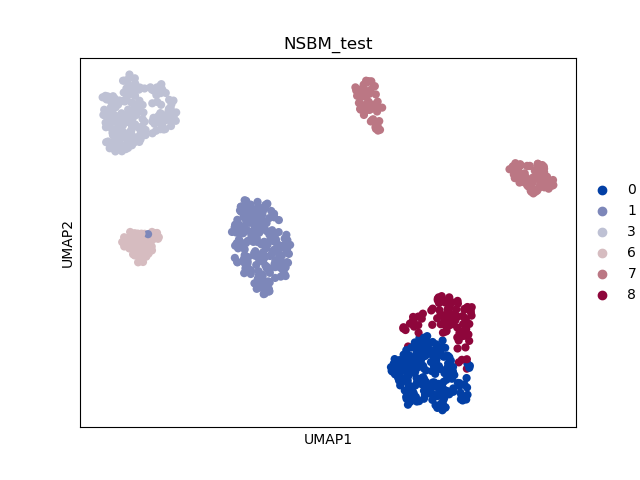

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
0             0     0      0    205       0
1             1     0      4      1     188
3             0   176      7      0       0
6            61     0      0      0       0
7             0     0    127      0       0
8             0     0      0     90       0

In [134]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state00.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### terza prova

In [135]:
gt.mcmc_equilibrate(state, mcmc_args=dict(niter=10), callback=collect_num_groups,verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 19550.351  max_S: 19558.110  S: 19550.351  ΔS:     -7.75875  moves:  2877 
niter:     2  count:    0  breaks:  0  min_S: 19550.351  max_S: 19570.110  S: 19570.110  ΔS:      19.7584  moves:  2924 
niter:     3  count:    1  breaks:  0  min_S: 19550.351  max_S: 19570.110  S: 19554.968  ΔS:     -15.1414  moves:  2950 
niter:     4  count:    0  breaks:  0  min_S: 19543.688  max_S: 19570.110  S: 19543.688  ΔS:     -11.2800  moves:  2865 
niter:     5  count:    1  breaks:  0  min_S: 19543.688  max_S: 19570.110  S: 19567.852  ΔS:      24.1638  moves:  2823 
niter:     6  count:    2  breaks:  0  min_S: 19543.688  max_S: 19570.110  S: 19568.459  ΔS:     0.606825  moves:  2877 
niter:     7  count:    3  breaks:  0  min_S: 19543.688  max_S: 19570.110  S: 19568.562  ΔS:     0.103435  moves:  2877 
niter:     8  count:    0  breaks:  0  min_S: 19543.688  max_S: 19581.605  S: 19581.605  ΔS:      13.0424  moves:  2852 
niter:     9  count:    1  break

niter:    81  count:   15  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19567.228  ΔS:     -10.3951  moves:  2929 
niter:    82  count:   16  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19563.346  ΔS:     -3.88205  moves:  2855 
niter:    83  count:   17  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19578.206  ΔS:      14.8599  moves:  2964 
niter:    84  count:   18  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19585.320  ΔS:      7.11363  moves:  2953 
niter:    85  count:   19  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19614.982  ΔS:      29.6622  moves:  2977 
niter:    86  count:   20  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19550.413  ΔS:     -64.5697  moves:  2887 
niter:    87  count:   21  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19566.680  ΔS:      16.2672  moves:  2882 
niter:    88  count:   22  breaks:  0  min_S: 19531.567  max_S: 19626.179  S: 19583.940  ΔS:      17.2600  moves:  2888 
niter:    89  count:   23  break

niter:   160  count:   13  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19556.451  ΔS:     -14.2643  moves:  2888 
niter:   161  count:   14  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19561.468  ΔS:      5.01727  moves:  2862 
niter:   162  count:   15  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19577.454  ΔS:      15.9863  moves:  2846 
niter:   163  count:   16  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19580.368  ΔS:      2.91429  moves:  2930 
niter:   164  count:   17  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19584.723  ΔS:      4.35402  moves:  2897 
niter:   165  count:   18  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19565.238  ΔS:     -19.4847  moves:  2886 
niter:   166  count:   19  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19558.643  ΔS:     -6.59525  moves:  2881 
niter:   167  count:   20  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19592.861  ΔS:      34.2184  moves:  2893 
niter:   168  count:   21  break

niter:   230  count:   83  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19576.307  ΔS:      4.02405  moves:  2897 
niter:   231  count:   84  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19558.376  ΔS:     -17.9311  moves:  2975 
niter:   232  count:   85  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19566.380  ΔS:      8.00346  moves:  2966 
niter:   233  count:   86  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19547.969  ΔS:     -18.4109  moves:  2963 
niter:   234  count:   87  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19584.228  ΔS:      36.2590  moves:  2982 
niter:   235  count:   88  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19565.966  ΔS:     -18.2620  moves:  2971 
niter:   236  count:   89  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19566.620  ΔS:     0.654693  moves:  2908 
niter:   237  count:   90  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19561.464  ΔS:     -5.15697  moves:  2872 
niter:   238  count:   91  break

niter:   308  count:  161  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19548.805  ΔS:     -12.4037  moves:  2929 
niter:   309  count:  162  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19558.141  ΔS:      9.33615  moves:  2968 
niter:   310  count:  163  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19593.020  ΔS:      34.8792  moves:  2938 
niter:   311  count:  164  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19573.314  ΔS:     -19.7065  moves:  2964 
niter:   312  count:  165  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19584.780  ΔS:      11.4662  moves:  2925 
niter:   313  count:  166  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19573.901  ΔS:     -10.8788  moves:  2958 
niter:   314  count:  167  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19582.612  ΔS:      8.71066  moves:  2964 
niter:   315  count:  168  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19586.390  ΔS:      3.77869  moves:  2832 
niter:   316  count:  169  break

niter:   387  count:  240  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19572.466  ΔS:      22.3858  moves:  3023 
niter:   388  count:  241  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19567.902  ΔS:     -4.56449  moves:  2942 
niter:   389  count:  242  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19587.226  ΔS:      19.3239  moves:  2894 
niter:   390  count:  243  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19558.074  ΔS:     -29.1515  moves:  3020 
niter:   391  count:  244  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19554.945  ΔS:     -3.12895  moves:  3002 
niter:   392  count:  245  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19597.893  ΔS:      42.9477  moves:  2921 
niter:   393  count:  246  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19599.767  ΔS:      1.87430  moves:  2994 
niter:   394  count:  247  breaks:  0  min_S: 19531.567  max_S: 19634.129  S: 19559.234  ΔS:     -40.5330  moves:  2959 
niter:   395  count:  248  break

niter:   465  count:   24  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19591.600  ΔS:      34.3061  moves:  3009 
niter:   466  count:   25  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19589.580  ΔS:     -2.01998  moves:  2950 
niter:   467  count:   26  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19586.056  ΔS:     -3.52341  moves:  3038 
niter:   468  count:   27  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19560.124  ΔS:     -25.9327  moves:  2878 
niter:   469  count:   28  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19541.939  ΔS:     -18.1842  moves:  3006 
niter:   470  count:   29  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19548.681  ΔS:      6.74160  moves:  3042 
niter:   471  count:   30  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19531.303  ΔS:     -17.3784  moves:  3014 
niter:   472  count:   31  breaks:  0  min_S: 19527.638  max_S: 19649.659  S: 19549.279  ΔS:      17.9763  moves:  3001 
niter:   473  count:   32  break

niter:   540  count:   55  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19548.841  ΔS:     -27.8551  moves:  2929 
niter:   541  count:   56  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19578.135  ΔS:      29.2933  moves:  3013 
niter:   542  count:   57  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19594.174  ΔS:      16.0390  moves:  2958 
niter:   543  count:   58  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19583.363  ΔS:     -10.8108  moves:  3018 
niter:   544  count:   59  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19574.546  ΔS:     -8.81684  moves:  2978 
niter:   545  count:   60  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19547.195  ΔS:     -27.3512  moves:  2915 
niter:   546  count:   61  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19562.837  ΔS:      15.6421  moves:  2938 
niter:   547  count:   62  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19566.368  ΔS:      3.53137  moves:  2988 
niter:   548  count:   63  break

niter:   619  count:  134  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19569.685  ΔS:      10.2816  moves:  2945 
niter:   620  count:  135  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19564.769  ΔS:     -4.91597  moves:  2960 
niter:   621  count:  136  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19556.579  ΔS:     -8.19009  moves:  3051 
niter:   622  count:  137  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19581.559  ΔS:      24.9796  moves:  2975 
niter:   623  count:  138  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19575.450  ΔS:     -6.10880  moves:  2965 
niter:   624  count:  139  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19546.499  ΔS:     -28.9508  moves:  2954 
niter:   625  count:  140  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19580.496  ΔS:      33.9972  moves:  2970 
niter:   626  count:  141  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19592.277  ΔS:      11.7808  moves:  3049 
niter:   627  count:  142  break

niter:   698  count:  213  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19586.653  ΔS:     -5.03301  moves:  3003 
niter:   699  count:  214  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19563.127  ΔS:     -23.5260  moves:  2988 
niter:   700  count:  215  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19588.604  ΔS:      25.4777  moves:  3055 
niter:   701  count:  216  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19589.295  ΔS:     0.690838  moves:  3030 
niter:   702  count:  217  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19615.690  ΔS:      26.3946  moves:  3117 
niter:   703  count:  218  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19565.388  ΔS:     -50.3019  moves:  3089 
niter:   704  count:  219  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19563.217  ΔS:     -2.17041  moves:  2966 
niter:   705  count:  220  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19537.088  ΔS:     -26.1292  moves:  2978 
niter:   706  count:  221  break

niter:   774  count:  289  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19553.050  ΔS:     -15.3801  moves:  2991 
niter:   775  count:  290  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19556.252  ΔS:      3.20149  moves:  2955 
niter:   776  count:  291  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19536.507  ΔS:     -19.7453  moves:  2953 
niter:   777  count:  292  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19554.431  ΔS:      17.9243  moves:  2975 
niter:   778  count:  293  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19564.223  ΔS:      9.79177  moves:  2900 
niter:   779  count:  294  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19556.660  ΔS:     -7.56217  moves:  2901 
niter:   780  count:  295  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19547.468  ΔS:     -9.19261  moves:  2984 
niter:   781  count:  296  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19544.846  ΔS:     -2.62155  moves:  2907 
niter:   782  count:  297  break

niter:   845  count:  360  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19562.147  ΔS:      13.1286  moves:  2953 
niter:   846  count:  361  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19563.374  ΔS:      1.22650  moves:  3011 
niter:   847  count:  362  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19561.782  ΔS:     -1.59132  moves:  2942 
niter:   848  count:  363  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19557.248  ΔS:     -4.53478  moves:  3050 
niter:   849  count:  364  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19583.167  ΔS:      25.9197  moves:  2999 
niter:   850  count:  365  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19586.646  ΔS:      3.47903  moves:  3016 
niter:   851  count:  366  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19576.175  ΔS:     -10.4707  moves:  2945 
niter:   852  count:  367  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19553.163  ΔS:     -23.0129  moves:  3012 
niter:   853  count:  368  break

niter:   919  count:  434  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19545.804  ΔS:      4.53099  moves:  2979 
niter:   920  count:  435  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19537.125  ΔS:     -8.67881  moves:  2959 
niter:   921  count:  436  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19564.767  ΔS:      27.6423  moves:  2922 
niter:   922  count:  437  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19547.293  ΔS:     -17.4742  moves:  2915 
niter:   923  count:  438  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19578.244  ΔS:      30.9507  moves:  2964 
niter:   924  count:  439  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19564.739  ΔS:     -13.5047  moves:  2934 
niter:   925  count:  440  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19570.858  ΔS:      6.11907  moves:  2975 
niter:   926  count:  441  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19574.215  ΔS:      3.35627  moves:  2989 
niter:   927  count:  442  break

niter:   996  count:  511  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19544.525  ΔS:      5.81043  moves:  3026 
niter:   997  count:  512  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19548.553  ΔS:      4.02810  moves:  2924 
niter:   998  count:  513  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19537.319  ΔS:     -11.2340  moves:  2963 
niter:   999  count:  514  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19565.845  ΔS:      28.5267  moves:  3010 
niter:  1000  count:  515  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19545.765  ΔS:     -20.0804  moves:  2913 
niter:  1001  count:  516  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19549.640  ΔS:      3.87471  moves:  3027 
niter:  1002  count:  517  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19580.094  ΔS:      30.4540  moves:  2993 
niter:  1003  count:  518  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19562.042  ΔS:     -18.0512  moves:  3032 
niter:  1004  count:  519  break

niter:  1072  count:  587  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19573.207  ΔS:      2.29721  moves:  2872 
niter:  1073  count:  588  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19545.600  ΔS:     -27.6074  moves:  2931 
niter:  1074  count:  589  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19572.148  ΔS:      26.5480  moves:  2863 
niter:  1075  count:  590  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19555.527  ΔS:     -16.6209  moves:  2890 
niter:  1076  count:  591  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19539.314  ΔS:     -16.2130  moves:  2898 
niter:  1077  count:  592  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19544.209  ΔS:      4.89490  moves:  2929 
niter:  1078  count:  593  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19529.615  ΔS:     -14.5945  moves:  2960 
niter:  1079  count:  594  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19546.483  ΔS:      16.8681  moves:  2911 
niter:  1080  count:  595  break

niter:  1141  count:  656  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19597.922  ΔS:      12.5569  moves:  2903 
niter:  1142  count:  657  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19572.937  ΔS:     -24.9853  moves:  2946 
niter:  1143  count:  658  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19561.985  ΔS:     -10.9523  moves:  3000 
niter:  1144  count:  659  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19570.114  ΔS:      8.12949  moves:  2895 
niter:  1145  count:  660  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19572.597  ΔS:      2.48300  moves:  2981 
niter:  1146  count:  661  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19571.607  ΔS:    -0.990197  moves:  2896 
niter:  1147  count:  662  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19577.771  ΔS:      6.16404  moves:  2997 
niter:  1148  count:  663  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19558.739  ΔS:     -19.0322  moves:  2966 
niter:  1149  count:  664  break

niter:  1219  count:  734  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19568.164  ΔS:    -0.914533  moves:  3024 
niter:  1220  count:  735  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19578.028  ΔS:      9.86394  moves:  2977 
niter:  1221  count:  736  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19562.651  ΔS:     -15.3764  moves:  3047 
niter:  1222  count:  737  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19554.612  ΔS:     -8.03899  moves:  3021 
niter:  1223  count:  738  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19556.298  ΔS:      1.68592  moves:  2968 
niter:  1224  count:  739  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19577.795  ΔS:      21.4968  moves:  2895 
niter:  1225  count:  740  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19553.729  ΔS:     -24.0659  moves:  2847 
niter:  1226  count:  741  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19570.133  ΔS:      16.4038  moves:  2894 
niter:  1227  count:  742  break

niter:  1288  count:  803  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19544.495  ΔS:     -33.8030  moves:  2987 
niter:  1289  count:  804  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19566.666  ΔS:      22.1715  moves:  2986 
niter:  1290  count:  805  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19559.746  ΔS:     -6.92010  moves:  3024 
niter:  1291  count:  806  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19555.731  ΔS:     -4.01465  moves:  2929 
niter:  1292  count:  807  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19560.622  ΔS:      4.89072  moves:  3035 
niter:  1293  count:  808  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19554.778  ΔS:     -5.84363  moves:  3038 
niter:  1294  count:  809  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19582.092  ΔS:      27.3137  moves:  2966 
niter:  1295  count:  810  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19578.612  ΔS:     -3.47969  moves:  3025 
niter:  1296  count:  811  break

niter:  1357  count:  872  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19557.076  ΔS:      14.6674  moves:  3002 
niter:  1358  count:  873  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19559.694  ΔS:      2.61820  moves:  2975 
niter:  1359  count:  874  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19558.493  ΔS:     -1.20084  moves:  3070 
niter:  1360  count:  875  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19569.068  ΔS:      10.5744  moves:  2941 
niter:  1361  count:  876  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19553.799  ΔS:     -15.2693  moves:  2972 
niter:  1362  count:  877  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19533.269  ΔS:     -20.5292  moves:  2931 
niter:  1363  count:  878  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19556.315  ΔS:      23.0456  moves:  2941 
niter:  1364  count:  879  breaks:  0  min_S: 19522.566  max_S: 19649.659  S: 19561.894  ΔS:      5.57906  moves:  2946 
niter:  1365  count:  880  break

niter:  1437  count:   55  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19540.059  ΔS:     -6.45610  moves:  3032 
niter:  1438  count:   56  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19591.277  ΔS:      51.2179  moves:  2979 
niter:  1439  count:   57  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19557.735  ΔS:     -33.5425  moves:  2949 
niter:  1440  count:   58  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19544.552  ΔS:     -13.1831  moves:  2965 
niter:  1441  count:   59  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19545.606  ΔS:      1.05409  moves:  2963 
niter:  1442  count:   60  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19546.969  ΔS:      1.36306  moves:  2966 
niter:  1443  count:   61  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19527.612  ΔS:     -19.3569  moves:  2886 
niter:  1444  count:   62  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19530.147  ΔS:      2.53455  moves:  2962 
niter:  1445  count:   63  break

niter:  1516  count:  134  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19601.631  ΔS:      4.84392  moves:  3000 
niter:  1517  count:  135  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19606.025  ΔS:      4.39371  moves:  2970 
niter:  1518  count:  136  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19600.958  ΔS:     -5.06709  moves:  2936 
niter:  1519  count:  137  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19586.902  ΔS:     -14.0558  moves:  2967 
niter:  1520  count:  138  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19604.448  ΔS:      17.5460  moves:  2891 
niter:  1521  count:  139  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19593.837  ΔS:     -10.6113  moves:  2980 
niter:  1522  count:  140  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19617.036  ΔS:      23.1987  moves:  2984 
niter:  1523  count:  141  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19583.468  ΔS:     -33.5679  moves:  3009 
niter:  1524  count:  142  break

niter:  1584  count:  202  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19594.226  ΔS:      19.6156  moves:  3060 
niter:  1585  count:  203  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19603.039  ΔS:      8.81335  moves:  3046 
niter:  1586  count:  204  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19608.851  ΔS:      5.81148  moves:  3060 
niter:  1587  count:  205  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19596.708  ΔS:     -12.1426  moves:  3008 
niter:  1588  count:  206  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19593.373  ΔS:     -3.33525  moves:  3021 
niter:  1589  count:  207  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19593.192  ΔS:    -0.180773  moves:  2943 
niter:  1590  count:  208  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19569.721  ΔS:     -23.4707  moves:  2968 
niter:  1591  count:  209  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19576.789  ΔS:      7.06800  moves:  3002 
niter:  1592  count:  210  break

niter:  1663  count:  281  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19559.193  ΔS:     -12.5669  moves:  2866 
niter:  1664  count:  282  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19561.664  ΔS:      2.47059  moves:  2944 
niter:  1665  count:  283  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19583.573  ΔS:      21.9096  moves:  2898 
niter:  1666  count:  284  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19554.487  ΔS:     -29.0864  moves:  2955 
niter:  1667  count:  285  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19575.302  ΔS:      20.8151  moves:  2971 
niter:  1668  count:  286  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19565.424  ΔS:     -9.87783  moves:  2944 
niter:  1669  count:  287  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19562.512  ΔS:     -2.91242  moves:  2897 
niter:  1670  count:  288  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19603.892  ΔS:      41.3800  moves:  2898 
niter:  1671  count:  289  break

niter:  1732  count:  350  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19590.333  ΔS:      9.63087  moves:  2915 
niter:  1733  count:  351  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19548.115  ΔS:     -42.2184  moves:  2974 
niter:  1734  count:  352  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19559.905  ΔS:      11.7907  moves:  2939 
niter:  1735  count:  353  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19551.617  ΔS:     -8.28838  moves:  2889 
niter:  1736  count:  354  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19555.998  ΔS:      4.38088  moves:  2969 
niter:  1737  count:  355  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19542.191  ΔS:     -13.8067  moves:  3022 
niter:  1738  count:  356  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19550.485  ΔS:      8.29347  moves:  2993 
niter:  1739  count:  357  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19553.933  ΔS:      3.44805  moves:  2904 
niter:  1740  count:  358  break

niter:  1812  count:  430  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19581.836  ΔS:      35.4684  moves:  2973 
niter:  1813  count:  431  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19554.006  ΔS:     -27.8306  moves:  2954 
niter:  1814  count:  432  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19541.841  ΔS:     -12.1646  moves:  2917 
niter:  1815  count:  433  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19555.824  ΔS:      13.9830  moves:  2931 
niter:  1816  count:  434  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19542.236  ΔS:     -13.5881  moves:  2981 
niter:  1817  count:  435  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19533.987  ΔS:     -8.24934  moves:  2902 
niter:  1818  count:  436  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19544.930  ΔS:      10.9432  moves:  2882 
niter:  1819  count:  437  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19559.269  ΔS:      14.3392  moves:  2899 
niter:  1820  count:  438  break

niter:  1893  count:  511  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19540.738  ΔS:     -16.8008  moves:  2930 
niter:  1894  count:  512  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19560.744  ΔS:      20.0056  moves:  2940 
niter:  1895  count:  513  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19558.935  ΔS:     -1.80847  moves:  2942 
niter:  1896  count:  514  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19567.488  ΔS:      8.55283  moves:  2936 
niter:  1897  count:  515  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19561.288  ΔS:     -6.19966  moves:  2869 
niter:  1898  count:  516  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19560.744  ΔS:    -0.544951  moves:  2931 
niter:  1899  count:  517  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19557.492  ΔS:     -3.25132  moves:  2964 
niter:  1900  count:  518  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19560.533  ΔS:      3.04067  moves:  2915 
niter:  1901  count:  519  break

niter:  1971  count:  589  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19577.079  ΔS:     -17.2501  moves:  3085 
niter:  1972  count:  590  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19589.413  ΔS:      12.3339  moves:  2986 
niter:  1973  count:  591  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19575.678  ΔS:     -13.7351  moves:  3077 
niter:  1974  count:  592  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19576.165  ΔS:     0.487454  moves:  3088 
niter:  1975  count:  593  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19556.669  ΔS:     -19.4959  moves:  2976 
niter:  1976  count:  594  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19576.032  ΔS:      19.3624  moves:  2975 
niter:  1977  count:  595  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19580.814  ΔS:      4.78159  moves:  3025 
niter:  1978  count:  596  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19576.508  ΔS:     -4.30595  moves:  2973 
niter:  1979  count:  597  break

niter:  2051  count:  669  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19559.412  ΔS:      15.8537  moves:  2948 
niter:  2052  count:  670  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19565.788  ΔS:      6.37534  moves:  2831 
niter:  2053  count:  671  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19554.380  ΔS:     -11.4070  moves:  3018 
niter:  2054  count:  672  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19535.386  ΔS:     -18.9945  moves:  3005 
niter:  2055  count:  673  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19541.706  ΔS:      6.31984  moves:  2998 
niter:  2056  count:  674  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19542.544  ΔS:     0.838431  moves:  3085 
niter:  2057  count:  675  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19581.192  ΔS:      38.6481  moves:  3031 
niter:  2058  count:  676  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19571.256  ΔS:     -9.93626  moves:  2939 
niter:  2059  count:  677  break

niter:  2131  count:  749  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19563.038  ΔS:      1.77769  moves:  3034 
niter:  2132  count:  750  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19548.535  ΔS:     -14.5028  moves:  2997 
niter:  2133  count:  751  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19561.140  ΔS:      12.6045  moves:  3006 
niter:  2134  count:  752  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19552.114  ΔS:     -9.02613  moves:  3066 
niter:  2135  count:  753  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19568.391  ΔS:      16.2767  moves:  3083 
niter:  2136  count:  754  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19568.384  ΔS:  -0.00703549  moves:  3027 
niter:  2137  count:  755  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19574.002  ΔS:      5.61844  moves:  2947 
niter:  2138  count:  756  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19576.544  ΔS:      2.54205  moves:  3047 
niter:  2139  count:  757  break

niter:  2202  count:  820  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19570.200  ΔS:      15.4139  moves:  3006 
niter:  2203  count:  821  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19561.052  ΔS:     -9.14765  moves:  2978 
niter:  2204  count:  822  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19535.402  ΔS:     -25.6500  moves:  2987 
niter:  2205  count:  823  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19546.123  ΔS:      10.7212  moves:  2962 
niter:  2206  count:  824  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19575.164  ΔS:      29.0403  moves:  2991 
niter:  2207  count:  825  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19571.409  ΔS:     -3.75499  moves:  3056 
niter:  2208  count:  826  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19547.784  ΔS:     -23.6244  moves:  2953 
niter:  2209  count:  827  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19531.748  ΔS:     -16.0365  moves:  2892 
niter:  2210  count:  828  break

niter:  2270  count:  888  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19558.148  ΔS:     -6.50377  moves:  3015 
niter:  2271  count:  889  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19575.392  ΔS:      17.2439  moves:  2975 
niter:  2272  count:  890  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19569.305  ΔS:     -6.08709  moves:  2997 
niter:  2273  count:  891  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19553.173  ΔS:     -16.1315  moves:  2875 
niter:  2274  count:  892  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19550.529  ΔS:     -2.64382  moves:  2937 
niter:  2275  count:  893  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19575.456  ΔS:      24.9263  moves:  3087 
niter:  2276  count:  894  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19581.911  ΔS:      6.45500  moves:  2976 
niter:  2277  count:  895  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19568.500  ΔS:     -13.4108  moves:  3039 
niter:  2278  count:  896  break

niter:  2341  count:  959  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19564.784  ΔS:     -2.30094  moves:  2927 
niter:  2342  count:  960  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19541.753  ΔS:     -23.0308  moves:  2958 
niter:  2343  count:  961  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19547.888  ΔS:      6.13524  moves:  2939 
niter:  2344  count:  962  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19571.291  ΔS:      23.4024  moves:  2914 
niter:  2345  count:  963  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19572.449  ΔS:      1.15859  moves:  2978 
niter:  2346  count:  964  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19585.562  ΔS:      13.1127  moves:  2912 
niter:  2347  count:  965  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19606.794  ΔS:      21.2322  moves:  2924 
niter:  2348  count:  966  breaks:  0  min_S: 19514.030  max_S: 19649.659  S: 19578.298  ΔS:     -28.4958  moves:  2877 
niter:  2349  count:  967  break

niter:  2414  count:   16  breaks:  1  min_S: 19533.343  max_S: 19604.038  S: 19580.070  ΔS:      6.08885  moves:  2928 
niter:  2415  count:   17  breaks:  1  min_S: 19533.343  max_S: 19604.038  S: 19581.405  ΔS:      1.33495  moves:  3038 
niter:  2416  count:   18  breaks:  1  min_S: 19533.343  max_S: 19604.038  S: 19591.401  ΔS:      9.99664  moves:  3029 
niter:  2417  count:   19  breaks:  1  min_S: 19533.343  max_S: 19604.038  S: 19578.769  ΔS:     -12.6323  moves:  3028 
niter:  2418  count:    0  breaks:  1  min_S: 19533.343  max_S: 19606.452  S: 19606.452  ΔS:      27.6833  moves:  3010 
niter:  2419  count:    1  breaks:  1  min_S: 19533.343  max_S: 19606.452  S: 19561.485  ΔS:     -44.9677  moves:  2996 
niter:  2420  count:    2  breaks:  1  min_S: 19533.343  max_S: 19606.452  S: 19566.454  ΔS:      4.96942  moves:  3119 
niter:  2421  count:    3  breaks:  1  min_S: 19533.343  max_S: 19606.452  S: 19570.076  ΔS:      3.62213  moves:  2978 
niter:  2422  count:    4  break

niter:  2485  count:    7  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19588.897  ΔS:     -15.2300  moves:  3111 
niter:  2486  count:    8  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19578.239  ΔS:     -10.6580  moves:  3038 
niter:  2487  count:    9  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19575.568  ΔS:     -2.67067  moves:  3076 
niter:  2488  count:   10  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19565.010  ΔS:     -10.5586  moves:  2975 
niter:  2489  count:   11  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19577.575  ΔS:      12.5649  moves:  3063 
niter:  2490  count:   12  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19561.903  ΔS:     -15.6717  moves:  3008 
niter:  2491  count:   13  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19551.937  ΔS:     -9.96540  moves:  2986 
niter:  2492  count:   14  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19558.561  ΔS:      6.62339  moves:  3028 
niter:  2493  count:   15  break

niter:  2558  count:   80  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19595.260  ΔS:      8.21155  moves:  3114 
niter:  2559  count:   81  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19595.174  ΔS:   -0.0863033  moves:  3053 
niter:  2560  count:   82  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19586.455  ΔS:     -8.71918  moves:  3022 
niter:  2561  count:   83  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19573.612  ΔS:     -12.8430  moves:  3025 
niter:  2562  count:   84  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19571.805  ΔS:     -1.80649  moves:  3023 
niter:  2563  count:   85  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19575.163  ΔS:      3.35810  moves:  3103 
niter:  2564  count:   86  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19545.733  ΔS:     -29.4300  moves:  2985 
niter:  2565  count:   87  breaks:  1  min_S: 19533.343  max_S: 19623.832  S: 19557.993  ΔS:      12.2597  moves:  2995 
niter:  2566  count:   88  break

niter:  2630  count:   16  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19567.321  ΔS:      15.0664  moves:  2962 
niter:  2631  count:   17  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19557.365  ΔS:     -9.95596  moves:  2970 
niter:  2632  count:   18  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19565.472  ΔS:      8.10739  moves:  3006 
niter:  2633  count:   19  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19560.890  ΔS:     -4.58230  moves:  2932 
niter:  2634  count:   20  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19547.961  ΔS:     -12.9285  moves:  2951 
niter:  2635  count:   21  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19559.426  ΔS:      11.4652  moves:  2980 
niter:  2636  count:   22  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19565.335  ΔS:      5.90872  moves:  2934 
niter:  2637  count:   23  breaks:  1  min_S: 19530.025  max_S: 19623.832  S: 19575.855  ΔS:      10.5194  moves:  3015 
niter:  2638  count:   24  break

niter:  2699  count:   41  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19607.581  ΔS:      5.47632  moves:  2990 
niter:  2700  count:   42  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19610.836  ΔS:      3.25553  moves:  2994 
niter:  2701  count:   43  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19583.302  ΔS:     -27.5342  moves:  3062 
niter:  2702  count:   44  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19595.085  ΔS:      11.7832  moves:  2943 
niter:  2703  count:   45  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19596.158  ΔS:      1.07270  moves:  2992 
niter:  2704  count:   46  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19602.029  ΔS:      5.87105  moves:  3034 
niter:  2705  count:   47  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19580.525  ΔS:     -21.5044  moves:  3003 
niter:  2706  count:   48  breaks:  1  min_S: 19530.025  max_S: 19631.194  S: 19583.455  ΔS:      2.93017  moves:  2998 
niter:  2707  count:   49  break

niter:  2779  count:   70  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19566.880  ΔS:     -1.50414  moves:  2898 
niter:  2780  count:   71  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19565.593  ΔS:     -1.28671  moves:  2963 
niter:  2781  count:   72  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19563.107  ΔS:     -2.48582  moves:  3000 
niter:  2782  count:   73  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19574.849  ΔS:      11.7421  moves:  2982 
niter:  2783  count:   74  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19561.378  ΔS:     -13.4709  moves:  2926 
niter:  2784  count:   75  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19570.952  ΔS:      9.57384  moves:  3074 
niter:  2785  count:   76  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19564.683  ΔS:     -6.26912  moves:  2982 
niter:  2786  count:   77  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19559.423  ΔS:     -5.26009  moves:  3046 
niter:  2787  count:   78  break

niter:  2849  count:  140  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19565.604  ΔS:     -3.38293  moves:  2973 
niter:  2850  count:  141  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19539.327  ΔS:     -26.2769  moves:  3003 
niter:  2851  count:  142  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19552.852  ΔS:      13.5250  moves:  3051 
niter:  2852  count:  143  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19548.578  ΔS:     -4.27422  moves:  2988 
niter:  2853  count:  144  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19561.862  ΔS:      13.2834  moves:  3008 
niter:  2854  count:  145  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19570.785  ΔS:      8.92355  moves:  2962 
niter:  2855  count:  146  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19594.233  ΔS:      23.4477  moves:  2992 
niter:  2856  count:  147  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19578.075  ΔS:     -16.1582  moves:  3026 
niter:  2857  count:  148  break

niter:  2921  count:  212  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19599.978  ΔS:      14.9967  moves:  3084 
niter:  2922  count:  213  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19582.027  ΔS:     -17.9520  moves:  3064 
niter:  2923  count:  214  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19550.367  ΔS:     -31.6600  moves:  3024 
niter:  2924  count:  215  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19567.896  ΔS:      17.5291  moves:  3024 
niter:  2925  count:  216  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19587.114  ΔS:      19.2181  moves:  3076 
niter:  2926  count:  217  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19593.799  ΔS:      6.68566  moves:  3100 
niter:  2927  count:  218  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19578.687  ΔS:     -15.1128  moves:  3081 
niter:  2928  count:  219  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19582.724  ΔS:      4.03783  moves:  3068 
niter:  2929  count:  220  break

niter:  3000  count:  291  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19587.368  ΔS:     -16.8865  moves:  2965 
niter:  3001  count:  292  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19582.616  ΔS:     -4.75293  moves:  3019 
niter:  3002  count:  293  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19595.619  ΔS:      13.0034  moves:  2995 
niter:  3003  count:  294  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19597.682  ΔS:      2.06321  moves:  3031 
niter:  3004  count:  295  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19622.328  ΔS:      24.6457  moves:  3007 
niter:  3005  count:  296  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19593.828  ΔS:     -28.5003  moves:  3010 
niter:  3006  count:  297  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19585.211  ΔS:     -8.61648  moves:  2954 
niter:  3007  count:  298  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19576.928  ΔS:     -8.28278  moves:  2953 
niter:  3008  count:  299  break

niter:  3068  count:  359  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19606.393  ΔS:      18.2465  moves:  2925 
niter:  3069  count:  360  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19598.080  ΔS:     -8.31360  moves:  2912 
niter:  3070  count:  361  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19586.887  ΔS:     -11.1925  moves:  2959 
niter:  3071  count:  362  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19599.693  ΔS:      12.8056  moves:  2926 
niter:  3072  count:  363  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19608.049  ΔS:      8.35601  moves:  2934 
niter:  3073  count:  364  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19598.546  ΔS:     -9.50237  moves:  2886 
niter:  3074  count:  365  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19617.687  ΔS:      19.1403  moves:  2973 
niter:  3075  count:  366  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19597.916  ΔS:     -19.7709  moves:  3011 
niter:  3076  count:  367  break

niter:  3137  count:  428  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19554.573  ΔS:     -38.4281  moves:  2904 
niter:  3138  count:  429  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19549.826  ΔS:     -4.74744  moves:  2908 
niter:  3139  count:  430  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19545.737  ΔS:     -4.08867  moves:  2935 
niter:  3140  count:  431  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19543.552  ΔS:     -2.18519  moves:  2911 
niter:  3141  count:  432  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19548.896  ΔS:      5.34370  moves:  2850 
niter:  3142  count:  433  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19569.280  ΔS:      20.3846  moves:  2790 
niter:  3143  count:  434  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19571.526  ΔS:      2.24622  moves:  2834 
niter:  3144  count:  435  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19588.178  ΔS:      16.6516  moves:  2926 
niter:  3145  count:  436  break

niter:  3206  count:  497  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19609.416  ΔS:     -5.15280  moves:  3000 
niter:  3207  count:  498  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19592.744  ΔS:     -16.6724  moves:  2958 
niter:  3208  count:  499  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19590.395  ΔS:     -2.34893  moves:  3068 
niter:  3209  count:  500  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19576.878  ΔS:     -13.5170  moves:  2888 
niter:  3210  count:  501  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19589.390  ΔS:      12.5123  moves:  2945 
niter:  3211  count:  502  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19586.072  ΔS:     -3.31772  moves:  2925 
niter:  3212  count:  503  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19579.420  ΔS:     -6.65243  moves:  2921 
niter:  3213  count:  504  breaks:  1  min_S: 19530.025  max_S: 19636.898  S: 19571.566  ΔS:     -7.85418  moves:  2888 
niter:  3214  count:  505  break

niter:  3286  count:   10  breaks:  1  min_S: 19520.228  max_S: 19636.898  S: 19552.762  ΔS:     -22.9204  moves:  2856 
niter:  3287  count:    0  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19518.643  ΔS:     -34.1190  moves:  2875 
niter:  3288  count:    1  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19529.823  ΔS:      11.1798  moves:  2935 
niter:  3289  count:    2  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19528.856  ΔS:    -0.967090  moves:  2957 
niter:  3290  count:    3  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19548.726  ΔS:      19.8705  moves:  2888 
niter:  3291  count:    4  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19556.165  ΔS:      7.43897  moves:  2879 
niter:  3292  count:    5  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19544.552  ΔS:     -11.6130  moves:  3009 
niter:  3293  count:    6  breaks:  1  min_S: 19518.643  max_S: 19636.898  S: 19536.197  ΔS:     -8.35534  moves:  3042 
niter:  3294  count:    7  break

niter:  3354  count:   45  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19537.296  ΔS:     -8.02722  moves:  2896 
niter:  3355  count:   46  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19545.995  ΔS:      8.69861  moves:  2889 
niter:  3356  count:   47  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19536.974  ΔS:     -9.02101  moves:  2899 
niter:  3357  count:   48  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19520.430  ΔS:     -16.5442  moves:  2880 
niter:  3358  count:   49  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19549.631  ΔS:      29.2015  moves:  2934 
niter:  3359  count:   50  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19535.869  ΔS:     -13.7615  moves:  2854 
niter:  3360  count:   51  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19528.758  ΔS:     -7.11158  moves:  2847 
niter:  3361  count:   52  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19545.705  ΔS:      16.9469  moves:  2926 
niter:  3362  count:   53  break

niter:  3422  count:  113  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19559.768  ΔS:      10.9674  moves:  2959 
niter:  3423  count:  114  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19564.831  ΔS:      5.06227  moves:  2919 
niter:  3424  count:  115  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19559.812  ΔS:     -5.01845  moves:  2924 
niter:  3425  count:  116  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19557.636  ΔS:     -2.17568  moves:  2902 
niter:  3426  count:  117  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19538.632  ΔS:     -19.0047  moves:  2935 
niter:  3427  count:  118  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19579.116  ΔS:      40.4838  moves:  2952 
niter:  3428  count:  119  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19565.985  ΔS:     -13.1302  moves:  2952 
niter:  3429  count:  120  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19559.580  ΔS:     -6.40582  moves:  2906 
niter:  3430  count:  121  break

niter:  3502  count:  193  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19562.888  ΔS:     -7.27051  moves:  2921 
niter:  3503  count:  194  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19553.485  ΔS:     -9.40273  moves:  2919 
niter:  3504  count:  195  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19550.419  ΔS:     -3.06643  moves:  2919 
niter:  3505  count:  196  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19575.894  ΔS:      25.4753  moves:  3025 
niter:  3506  count:  197  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19572.553  ΔS:     -3.34044  moves:  2905 
niter:  3507  count:  198  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19588.661  ΔS:      16.1072  moves:  2982 
niter:  3508  count:  199  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19562.555  ΔS:     -26.1058  moves:  2906 
niter:  3509  count:  200  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19553.331  ΔS:     -9.22362  moves:  2944 
niter:  3510  count:  201  break

niter:  3570  count:  261  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19565.299  ΔS:     -4.98258  moves:  2966 
niter:  3571  count:  262  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19564.159  ΔS:     -1.13961  moves:  3015 
niter:  3572  count:  263  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.257  ΔS:      9.09805  moves:  2915 
niter:  3573  count:  264  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19552.290  ΔS:     -20.9669  moves:  2869 
niter:  3574  count:  265  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19543.131  ΔS:     -9.15916  moves:  2853 
niter:  3575  count:  266  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19564.138  ΔS:      21.0065  moves:  3007 
niter:  3576  count:  267  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19551.275  ΔS:     -12.8629  moves:  2937 
niter:  3577  count:  268  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19532.850  ΔS:     -18.4252  moves:  2945 
niter:  3578  count:  269  break

niter:  3642  count:  333  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19569.091  ΔS:     -5.47602  moves:  2965 
niter:  3643  count:  334  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19561.317  ΔS:     -7.77402  moves:  3014 
niter:  3644  count:  335  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19547.710  ΔS:     -13.6068  moves:  2992 
niter:  3645  count:  336  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19560.886  ΔS:      13.1756  moves:  2988 
niter:  3646  count:  337  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19569.574  ΔS:      8.68878  moves:  3029 
niter:  3647  count:  338  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19548.873  ΔS:     -20.7011  moves:  2966 
niter:  3648  count:  339  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.989  ΔS:      25.1155  moves:  2922 
niter:  3649  count:  340  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19559.886  ΔS:     -14.1032  moves:  3012 
niter:  3650  count:  341  break

niter:  3716  count:  407  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19549.436  ΔS:     -7.35511  moves:  2938 
niter:  3717  count:  408  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19536.896  ΔS:     -12.5392  moves:  2834 
niter:  3718  count:  409  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19538.438  ΔS:      1.54184  moves:  3036 
niter:  3719  count:  410  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19553.420  ΔS:      14.9816  moves:  2943 
niter:  3720  count:  411  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19578.780  ΔS:      25.3597  moves:  2950 
niter:  3721  count:  412  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19552.234  ΔS:     -26.5452  moves:  2933 
niter:  3722  count:  413  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19552.983  ΔS:     0.749004  moves:  2885 
niter:  3723  count:  414  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19538.539  ΔS:     -14.4444  moves:  2912 
niter:  3724  count:  415  break

niter:  3786  count:  477  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19560.376  ΔS:     -7.59256  moves:  2891 
niter:  3787  count:  478  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19555.501  ΔS:     -4.87450  moves:  2944 
niter:  3788  count:  479  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19563.904  ΔS:      8.40327  moves:  2827 
niter:  3789  count:  480  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19555.711  ΔS:     -8.19323  moves:  2997 
niter:  3790  count:  481  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.754  ΔS:      18.0426  moves:  2878 
niter:  3791  count:  482  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19576.753  ΔS:      2.99874  moves:  2899 
niter:  3792  count:  483  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19589.238  ΔS:      12.4858  moves:  2836 
niter:  3793  count:  484  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19553.064  ΔS:     -36.1746  moves:  3031 
niter:  3794  count:  485  break

niter:  3854  count:  545  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19540.601  ΔS:     -19.7186  moves:  2936 
niter:  3855  count:  546  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19551.378  ΔS:      10.7768  moves:  3031 
niter:  3856  count:  547  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19547.701  ΔS:     -3.67656  moves:  2939 
niter:  3857  count:  548  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19554.987  ΔS:      7.28552  moves:  3049 
niter:  3858  count:  549  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19572.991  ΔS:      18.0039  moves:  2969 
niter:  3859  count:  550  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19582.295  ΔS:      9.30398  moves:  2953 
niter:  3860  count:  551  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19549.626  ΔS:     -32.6691  moves:  2998 
niter:  3861  count:  552  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19558.884  ΔS:      9.25850  moves:  2995 
niter:  3862  count:  553  break

niter:  3935  count:  626  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19557.236  ΔS:      10.5262  moves:  2885 
niter:  3936  count:  627  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19531.388  ΔS:     -25.8487  moves:  2918 
niter:  3937  count:  628  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19526.044  ΔS:     -5.34392  moves:  2887 
niter:  3938  count:  629  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19563.112  ΔS:      37.0683  moves:  2874 
niter:  3939  count:  630  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19545.524  ΔS:     -17.5876  moves:  2928 
niter:  3940  count:  631  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19546.367  ΔS:     0.842166  moves:  2911 
niter:  3941  count:  632  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19589.223  ΔS:      42.8561  moves:  2970 
niter:  3942  count:  633  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19561.549  ΔS:     -27.6739  moves:  3026 
niter:  3943  count:  634  break

niter:  4006  count:  697  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19547.097  ΔS:     -18.9051  moves:  2981 
niter:  4007  count:  698  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19555.508  ΔS:      8.41125  moves:  2975 
niter:  4008  count:  699  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.263  ΔS:      17.7552  moves:  2921 
niter:  4009  count:  700  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19553.327  ΔS:     -19.9360  moves:  2956 
niter:  4010  count:  701  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19570.128  ΔS:      16.8003  moves:  2917 
niter:  4011  count:  702  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19548.553  ΔS:     -21.5742  moves:  2984 
niter:  4012  count:  703  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19550.433  ΔS:      1.87967  moves:  2967 
niter:  4013  count:  704  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19581.375  ΔS:      30.9416  moves:  2898 
niter:  4014  count:  705  break

niter:  4085  count:  776  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.048  ΔS:     -2.87717  moves:  2887 
niter:  4086  count:  777  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19588.864  ΔS:      15.8168  moves:  2937 
niter:  4087  count:  778  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19583.707  ΔS:     -5.15698  moves:  2995 
niter:  4088  count:  779  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19564.371  ΔS:     -19.3364  moves:  2983 
niter:  4089  count:  780  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19596.037  ΔS:      31.6658  moves:  2944 
niter:  4090  count:  781  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.852  ΔS:     -22.1852  moves:  2999 
niter:  4091  count:  782  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19588.629  ΔS:      14.7777  moves:  3046 
niter:  4092  count:  783  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19582.843  ΔS:     -5.78613  moves:  2996 
niter:  4093  count:  784  break

niter:  4165  count:  856  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19542.269  ΔS:     -5.26672  moves:  2857 
niter:  4166  count:  857  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19555.960  ΔS:      13.6917  moves:  2899 
niter:  4167  count:  858  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19567.910  ΔS:      11.9500  moves:  2926 
niter:  4168  count:  859  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19573.975  ΔS:      6.06447  moves:  2991 
niter:  4169  count:  860  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19579.415  ΔS:      5.43986  moves:  2911 
niter:  4170  count:  861  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19557.161  ΔS:     -22.2538  moves:  2975 
niter:  4171  count:  862  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19568.106  ΔS:      10.9453  moves:  2958 
niter:  4172  count:  863  breaks:  1  min_S: 19510.947  max_S: 19636.898  S: 19558.391  ΔS:     -9.71510  moves:  2923 
niter:  4173  count:  864  break

niter:  4243  count:   21  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19549.843  ΔS:      4.26431  moves:  2894 
niter:  4244  count:   22  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19524.198  ΔS:     -25.6449  moves:  2917 
niter:  4245  count:   23  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19536.108  ΔS:      11.9097  moves:  2933 
niter:  4246  count:   24  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.824  ΔS:      1.71581  moves:  2939 
niter:  4247  count:   25  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.380  ΔS:    -0.443659  moves:  2824 
niter:  4248  count:   26  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19531.504  ΔS:     -5.87588  moves:  2881 
niter:  4249  count:   27  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19543.761  ΔS:      12.2565  moves:  2841 
niter:  4250  count:   28  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19550.994  ΔS:      7.23302  moves:  2909 
niter:  4251  count:   29  break

niter:  4318  count:   96  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19555.275  ΔS:      13.0033  moves:  2903 
niter:  4319  count:   97  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.253  ΔS:     -18.0218  moves:  2856 
niter:  4320  count:   98  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.373  ΔS:      17.1200  moves:  2925 
niter:  4321  count:   99  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.689  ΔS:     0.316014  moves:  2985 
niter:  4322  count:  100  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.118  ΔS:     -17.5714  moves:  2906 
niter:  4323  count:  101  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19533.740  ΔS:     -3.37791  moves:  2997 
niter:  4324  count:  102  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.892  ΔS:      4.15179  moves:  2928 
niter:  4325  count:  103  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19546.778  ΔS:      8.88683  moves:  2987 
niter:  4326  count:  104  break

niter:  4397  count:  175  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19568.384  ΔS:      16.5945  moves:  2944 
niter:  4398  count:  176  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19558.177  ΔS:     -10.2070  moves:  3010 
niter:  4399  count:  177  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19571.668  ΔS:      13.4907  moves:  2984 
niter:  4400  count:  178  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19595.219  ΔS:      23.5513  moves:  2934 
niter:  4401  count:  179  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19585.471  ΔS:     -9.74829  moves:  3011 
niter:  4402  count:  180  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19572.531  ΔS:     -12.9395  moves:  2992 
niter:  4403  count:  181  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19572.370  ΔS:    -0.161247  moves:  2922 
niter:  4404  count:  182  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19561.135  ΔS:     -11.2352  moves:  3031 
niter:  4405  count:  183  break

niter:  4465  count:  243  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19574.762  ΔS:      7.06425  moves:  2897 
niter:  4466  count:  244  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19550.592  ΔS:     -24.1696  moves:  2952 
niter:  4467  count:  245  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19569.501  ΔS:      18.9088  moves:  2970 
niter:  4468  count:  246  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19551.246  ΔS:     -18.2548  moves:  3006 
niter:  4469  count:  247  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19602.607  ΔS:      51.3606  moves:  3060 
niter:  4470  count:  248  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19563.111  ΔS:     -39.4959  moves:  2996 
niter:  4471  count:  249  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19541.366  ΔS:     -21.7455  moves:  3089 
niter:  4472  count:  250  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19548.285  ΔS:      6.91978  moves:  2936 
niter:  4473  count:  251  break

niter:  4540  count:  318  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19556.994  ΔS:     -10.8085  moves:  2913 
niter:  4541  count:  319  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19561.863  ΔS:      4.86957  moves:  2911 
niter:  4542  count:  320  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19550.790  ΔS:     -11.0737  moves:  2965 
niter:  4543  count:  321  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19587.605  ΔS:      36.8152  moves:  2917 
niter:  4544  count:  322  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19592.239  ΔS:      4.63389  moves:  2983 
niter:  4545  count:  323  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19573.356  ΔS:     -18.8828  moves:  3013 
niter:  4546  count:  324  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19580.727  ΔS:      7.37097  moves:  3031 
niter:  4547  count:  325  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19574.496  ΔS:     -6.23041  moves:  2936 
niter:  4548  count:  326  break

niter:  4619  count:  397  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19564.556  ΔS:      11.4690  moves:  2947 
niter:  4620  count:  398  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.969  ΔS:     -9.58689  moves:  3055 
niter:  4621  count:  399  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19557.980  ΔS:      3.01097  moves:  2940 
niter:  4622  count:  400  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19564.220  ΔS:      6.23952  moves:  3060 
niter:  4623  count:  401  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19565.962  ΔS:      1.74282  moves:  3017 
niter:  4624  count:  402  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19556.799  ΔS:     -9.16334  moves:  2986 
niter:  4625  count:  403  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19575.095  ΔS:      18.2963  moves:  3057 
niter:  4626  count:  404  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19581.455  ΔS:      6.35962  moves:  2912 
niter:  4627  count:  405  break

niter:  4697  count:  475  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19559.059  ΔS:      1.62981  moves:  2956 
niter:  4698  count:  476  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19548.122  ΔS:     -10.9365  moves:  2967 
niter:  4699  count:  477  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19565.117  ΔS:      16.9948  moves:  2983 
niter:  4700  count:  478  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19568.087  ΔS:      2.97028  moves:  2967 
niter:  4701  count:  479  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19580.624  ΔS:      12.5361  moves:  2941 
niter:  4702  count:  480  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19572.323  ΔS:     -8.30089  moves:  3028 
niter:  4703  count:  481  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19572.252  ΔS:   -0.0710515  moves:  2941 
niter:  4704  count:  482  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19569.766  ΔS:     -2.48605  moves:  3044 
niter:  4705  count:  483  break

niter:  4773  count:  551  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19581.621  ΔS:      36.8332  moves:  2964 
niter:  4774  count:  552  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.580  ΔS:     -27.0409  moves:  2947 
niter:  4775  count:  553  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19568.841  ΔS:      14.2607  moves:  3111 
niter:  4776  count:  554  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19537.748  ΔS:     -31.0926  moves:  2933 
niter:  4777  count:  555  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.744  ΔS:      16.9958  moves:  2952 
niter:  4778  count:  556  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19560.141  ΔS:      5.39725  moves:  3013 
niter:  4779  count:  557  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19556.472  ΔS:     -3.66863  moves:  3002 
niter:  4780  count:  558  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19566.724  ΔS:      10.2519  moves:  3045 
niter:  4781  count:  559  break

niter:  4846  count:  624  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19545.331  ΔS:     -12.5471  moves:  2952 
niter:  4847  count:  625  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19562.599  ΔS:      17.2670  moves:  2945 
niter:  4848  count:  626  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19553.041  ΔS:     -9.55762  moves:  2927 
niter:  4849  count:  627  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19571.616  ΔS:      18.5750  moves:  3024 
niter:  4850  count:  628  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19548.879  ΔS:     -22.7368  moves:  2936 
niter:  4851  count:  629  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19570.699  ΔS:      21.8204  moves:  2999 
niter:  4852  count:  630  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19541.440  ΔS:     -29.2597  moves:  2920 
niter:  4853  count:  631  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19560.477  ΔS:      19.0376  moves:  2970 
niter:  4854  count:  632  break

niter:  4925  count:  703  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19572.486  ΔS:     -19.8302  moves:  3049 
niter:  4926  count:  704  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19596.421  ΔS:      23.9356  moves:  2896 
niter:  4927  count:  705  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19583.336  ΔS:     -13.0851  moves:  3074 
niter:  4928  count:  706  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19568.854  ΔS:     -14.4822  moves:  2962 
niter:  4929  count:  707  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19576.171  ΔS:      7.31705  moves:  3022 
niter:  4930  count:  708  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19584.562  ΔS:      8.39055  moves:  2992 
niter:  4931  count:  709  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19589.628  ΔS:      5.06632  moves:  3045 
niter:  4932  count:  710  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19595.326  ΔS:      5.69801  moves:  3096 
niter:  4933  count:  711  break

niter:  5004  count:  782  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19584.178  ΔS:      6.87779  moves:  3162 
niter:  5005  count:  783  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19587.122  ΔS:      2.94343  moves:  3064 
niter:  5006  count:  784  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19598.041  ΔS:      10.9192  moves:  2928 
niter:  5007  count:  785  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19565.227  ΔS:     -32.8143  moves:  2976 
niter:  5008  count:  786  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19589.150  ΔS:      23.9233  moves:  2993 
niter:  5009  count:  787  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19566.981  ΔS:     -22.1685  moves:  2987 
niter:  5010  count:  788  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19585.398  ΔS:      18.4170  moves:  3083 
niter:  5011  count:  789  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19562.232  ΔS:     -23.1660  moves:  3073 
niter:  5012  count:  790  break

niter:  5081  count:  859  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19587.594  ΔS:     -1.41913  moves:  2985 
niter:  5082  count:  860  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19599.361  ΔS:      11.7669  moves:  2998 
niter:  5083  count:  861  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19580.696  ΔS:     -18.6651  moves:  3009 
niter:  5084  count:  862  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19581.006  ΔS:     0.310061  moves:  3007 
niter:  5085  count:  863  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.284  ΔS:     -26.7212  moves:  3048 
niter:  5086  count:  864  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19561.386  ΔS:      7.10160  moves:  3070 
niter:  5087  count:  865  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19554.377  ΔS:     -7.00905  moves:  3014 
niter:  5088  count:  866  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19581.772  ΔS:      27.3949  moves:  2914 
niter:  5089  count:  867  break

niter:  5154  count:  932  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19569.253  ΔS:      8.93934  moves:  3063 
niter:  5155  count:  933  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19559.409  ΔS:     -9.84311  moves:  3032 
niter:  5156  count:  934  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19583.907  ΔS:      24.4974  moves:  3023 
niter:  5157  count:  935  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19580.634  ΔS:     -3.27298  moves:  3066 
niter:  5158  count:  936  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19588.689  ΔS:      8.05517  moves:  3077 
niter:  5159  count:  937  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19619.249  ΔS:      30.5595  moves:  3001 
niter:  5160  count:  938  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19589.355  ΔS:     -29.8939  moves:  3073 
niter:  5161  count:  939  breaks:  1  min_S: 19508.792  max_S: 19636.898  S: 19585.668  ΔS:     -3.68647  moves:  3089 
niter:  5162  count:  940  break

(19548.412003855567, 50659175, 15494181)

In [136]:
pickle.dump(state, open('adata_10x/10x_force_niter/no_fn_3.pkl', 'wb'), 2)

In [137]:
pickle.dump(h, open('adata_10x/10x_force_niter/h_no_fn_3.pkl', 'wb'), 2)

In [138]:
state

<NestedBlockState object, with base <BlockState object with 71 blocks (68 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba9d0>, at 0x7f43f85dcd50>, and 10 levels of sizes [(860, 68), (68, 19), (19, 6), (6, 4), (4, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)] at 0x7f43f85dc810>

In [9]:
h000=pickle.load(open('adata_10x/10x_force_niter/h_no_fn_3.pkl','rb'))
state000=pickle.load(open('adata_10x/10x_force_niter/no_fn_3.pkl','rb'))

In [140]:
for l in range (0,10):
    idxs= np.where(h000[l] > 0)[0]
    v = h000[l][idxs]
    figure(l)
    bar(idxs, v)

<IPython.core.display.Javascript object>


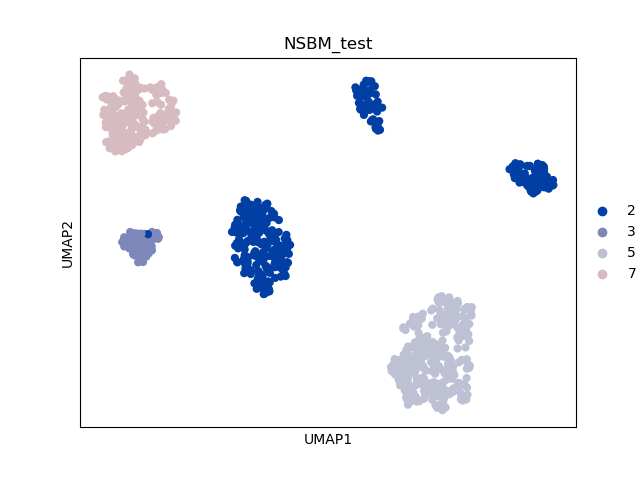

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
2             1     0    131      1     188
3            61     0      0      0       0
5             0     0      0    295       0
7             0   176      7      0       0

In [141]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

# 5) imposto mcmc_equlibrate partendo daltri algoritmi e non mcmc_sweep

### a) multiflip_mcmc

In [157]:
bs = n_state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

In [158]:
state = n_state.copy(bs=bs, sampling=True)

In [162]:
state.multiflip_mcmc_sweep(niter=1000)

(27.7339053678727, 755178, 10958)

In [163]:
gt.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(19557.709361108697, 45140754, 13367275)

In [164]:
h = [np.zeros(g.num_vertices() + 1) for s in state.get_levels()]
def collect_num_groups(s):
    for l, sl in enumerate(s.get_levels()):
        B = sl.get_nonempty_B()
        h[l][B] += 1

In [165]:
gt.mcmc_equilibrate(state,mcmc_args=dict(niter=10), callback=collect_num_groups,verbose=True)

niter:     1  count:    0  breaks:  0  min_S: 19557.709  max_S: 19570.663  S: 19570.663  ΔS:      12.9535  moves:  2886 
niter:     2  count:    1  breaks:  0  min_S: 19557.709  max_S: 19570.663  S: 19562.367  ΔS:     -8.29605  moves:  2932 
niter:     3  count:    0  breaks:  0  min_S: 19557.709  max_S: 19601.915  S: 19601.915  ΔS:      39.5478  moves:  2864 
niter:     4  count:    0  breaks:  0  min_S: 19547.030  max_S: 19601.915  S: 19547.030  ΔS:     -54.8845  moves:  2943 
niter:     5  count:    1  breaks:  0  min_S: 19547.030  max_S: 19601.915  S: 19590.776  ΔS:      43.7459  moves:  2802 
niter:     6  count:    2  breaks:  0  min_S: 19547.030  max_S: 19601.915  S: 19567.301  ΔS:     -23.4754  moves:  2914 
niter:     7  count:    3  breaks:  0  min_S: 19547.030  max_S: 19601.915  S: 19566.764  ΔS:    -0.536224  moves:  2871 
niter:     8  count:    4  breaks:  0  min_S: 19547.030  max_S: 19601.915  S: 19559.808  ΔS:     -6.95660  moves:  2849 
niter:     9  count:    5  break

niter:    81  count:   30  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19589.268  ΔS:     -1.77775  moves:  2881 
niter:    82  count:   31  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19594.787  ΔS:      5.51933  moves:  2892 
niter:    83  count:   32  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19596.064  ΔS:      1.27648  moves:  2879 
niter:    84  count:   33  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19562.571  ΔS:     -33.4928  moves:  2885 
niter:    85  count:   34  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19574.239  ΔS:      11.6676  moves:  2938 
niter:    86  count:   35  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19560.517  ΔS:     -13.7215  moves:  2858 
niter:    87  count:   36  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19576.829  ΔS:      16.3120  moves:  2885 
niter:    88  count:   37  breaks:  0  min_S: 19526.646  max_S: 19601.915  S: 19598.719  ΔS:      21.8902  moves:  2921 
niter:    89  count:    0  break

niter:   161  count:   72  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19573.223  ΔS:    -0.507635  moves:  2823 
niter:   162  count:   73  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19574.829  ΔS:      1.60632  moves:  2950 
niter:   163  count:   74  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19557.948  ΔS:     -16.8808  moves:  2849 
niter:   164  count:   75  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19572.856  ΔS:      14.9078  moves:  2868 
niter:   165  count:   76  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19560.535  ΔS:     -12.3212  moves:  2854 
niter:   166  count:   77  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19541.909  ΔS:     -18.6261  moves:  2892 
niter:   167  count:   78  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19547.495  ΔS:      5.58569  moves:  2899 
niter:   168  count:   79  breaks:  0  min_S: 19526.646  max_S: 19614.459  S: 19576.084  ΔS:      28.5891  moves:  2917 
niter:   169  count:   80  break

niter:   229  count:   12  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19586.033  ΔS:      33.4501  moves:  2920 
niter:   230  count:   13  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19596.365  ΔS:      10.3319  moves:  2991 
niter:   231  count:   14  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19586.050  ΔS:     -10.3152  moves:  2882 
niter:   232  count:   15  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19586.141  ΔS:    0.0913129  moves:  2883 
niter:   233  count:   16  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19571.354  ΔS:     -14.7874  moves:  2951 
niter:   234  count:   17  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19577.886  ΔS:      6.53255  moves:  2977 
niter:   235  count:   18  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19576.890  ΔS:    -0.996423  moves:  2884 
niter:   236  count:   19  breaks:  0  min_S: 19526.646  max_S: 19615.861  S: 19565.508  ΔS:     -11.3818  moves:  2945 
niter:   237  count:   20  break

niter:   310  count:   68  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19575.793  ΔS:     -4.04422  moves:  2855 
niter:   311  count:   69  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19597.311  ΔS:      21.5181  moves:  2850 
niter:   312  count:   70  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19564.208  ΔS:     -33.1026  moves:  2936 
niter:   313  count:   71  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19574.394  ΔS:      10.1862  moves:  2878 
niter:   314  count:   72  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19566.604  ΔS:     -7.79009  moves:  2872 
niter:   315  count:   73  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19589.801  ΔS:      23.1970  moves:  2885 
niter:   316  count:   74  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19567.360  ΔS:     -22.4414  moves:  2989 
niter:   317  count:   75  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19568.741  ΔS:      1.38102  moves:  2985 
niter:   318  count:   76  break

niter:   384  count:  142  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19545.369  ΔS:     -3.30011  moves:  2783 
niter:   385  count:  143  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19541.708  ΔS:     -3.66073  moves:  2777 
niter:   386  count:  144  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19565.687  ΔS:      23.9793  moves:  2800 
niter:   387  count:  145  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19568.056  ΔS:      2.36873  moves:  2824 
niter:   388  count:  146  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19601.793  ΔS:      33.7366  moves:  2802 
niter:   389  count:  147  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19544.980  ΔS:     -56.8124  moves:  2874 
niter:   390  count:  148  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19543.403  ΔS:     -1.57717  moves:  2833 
niter:   391  count:  149  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19539.943  ΔS:     -3.45993  moves:  2933 
niter:   392  count:  150  break

niter:   458  count:  216  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19571.977  ΔS:     -5.66463  moves:  3026 
niter:   459  count:  217  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19560.830  ΔS:     -11.1470  moves:  2916 
niter:   460  count:  218  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19577.164  ΔS:      16.3337  moves:  3006 
niter:   461  count:  219  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19584.719  ΔS:      7.55509  moves:  2916 
niter:   462  count:  220  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19582.926  ΔS:     -1.79242  moves:  2889 
niter:   463  count:  221  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19559.856  ΔS:     -23.0706  moves:  2951 
niter:   464  count:  222  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19575.286  ΔS:      15.4304  moves:  2841 
niter:   465  count:  223  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19579.871  ΔS:      4.58453  moves:  2907 
niter:   466  count:  224  break

niter:   530  count:  288  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19540.029  ΔS:      3.76365  moves:  2857 
niter:   531  count:  289  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19546.573  ΔS:      6.54370  moves:  2830 
niter:   532  count:  290  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19538.756  ΔS:     -7.81649  moves:  2917 
niter:   533  count:  291  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19539.484  ΔS:     0.727211  moves:  2883 
niter:   534  count:  292  breaks:  0  min_S: 19526.646  max_S: 19646.533  S: 19531.355  ΔS:     -8.12877  moves:  2909 
niter:   535  count:    0  breaks:  0  min_S: 19523.971  max_S: 19646.533  S: 19523.971  ΔS:     -7.38385  moves:  2782 
niter:   536  count:    1  breaks:  0  min_S: 19523.971  max_S: 19646.533  S: 19536.800  ΔS:      12.8288  moves:  2807 
niter:   537  count:    2  breaks:  0  min_S: 19523.971  max_S: 19646.533  S: 19555.668  ΔS:      18.8684  moves:  2833 
niter:   538  count:    3  break

niter:   604  count:   57  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19566.511  ΔS:     -18.1600  moves:  2837 
niter:   605  count:   58  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19552.750  ΔS:     -13.7605  moves:  2916 
niter:   606  count:   59  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19559.664  ΔS:      6.91345  moves:  2837 
niter:   607  count:   60  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19558.187  ΔS:     -1.47700  moves:  2822 
niter:   608  count:   61  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19534.759  ΔS:     -23.4282  moves:  2901 
niter:   609  count:   62  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19567.590  ΔS:      32.8317  moves:  2850 
niter:   610  count:   63  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19570.681  ΔS:      3.09117  moves:  2848 
niter:   611  count:   64  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19576.989  ΔS:      6.30756  moves:  2829 
niter:   612  count:   65  break

niter:   681  count:  134  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19567.913  ΔS:     -18.8155  moves:  2881 
niter:   682  count:  135  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19560.666  ΔS:     -7.24714  moves:  2926 
niter:   683  count:  136  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19578.383  ΔS:      17.7170  moves:  2850 
niter:   684  count:  137  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19571.332  ΔS:     -7.05150  moves:  2874 
niter:   685  count:  138  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19595.825  ΔS:      24.4935  moves:  2888 
niter:   686  count:  139  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19578.790  ΔS:     -17.0353  moves:  2929 
niter:   687  count:  140  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19598.870  ΔS:      20.0799  moves:  2881 
niter:   688  count:  141  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19591.926  ΔS:     -6.94365  moves:  2790 
niter:   689  count:  142  break

niter:   760  count:  213  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19571.889  ΔS:      1.28126  moves:  2813 
niter:   761  count:  214  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19545.844  ΔS:     -26.0443  moves:  2871 
niter:   762  count:  215  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19556.497  ΔS:      10.6528  moves:  2835 
niter:   763  count:  216  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19569.644  ΔS:      13.1464  moves:  2843 
niter:   764  count:  217  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19574.889  ΔS:      5.24498  moves:  2793 
niter:   765  count:  218  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19580.770  ΔS:      5.88181  moves:  2816 
niter:   766  count:  219  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19569.421  ΔS:     -11.3489  moves:  2803 
niter:   767  count:  220  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19563.475  ΔS:     -5.94673  moves:  2765 
niter:   768  count:  221  break

niter:   836  count:  289  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19579.367  ΔS:      18.4634  moves:  2777 
niter:   837  count:  290  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19582.384  ΔS:      3.01696  moves:  2848 
niter:   838  count:  291  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19579.618  ΔS:     -2.76580  moves:  2847 
niter:   839  count:  292  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19586.189  ΔS:      6.57091  moves:  2900 
niter:   840  count:  293  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19580.225  ΔS:     -5.96352  moves:  2841 
niter:   841  count:  294  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19584.962  ΔS:      4.73690  moves:  2893 
niter:   842  count:  295  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19586.572  ΔS:      1.60984  moves:  2972 
niter:   843  count:  296  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19554.271  ΔS:     -32.3011  moves:  2849 
niter:   844  count:  297  break

niter:   905  count:  358  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19563.676  ΔS:      1.28591  moves:  2935 
niter:   906  count:  359  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19585.729  ΔS:      22.0539  moves:  2922 
niter:   907  count:  360  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19573.535  ΔS:     -12.1947  moves:  2946 
niter:   908  count:  361  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19551.103  ΔS:     -22.4319  moves:  2896 
niter:   909  count:  362  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19565.514  ΔS:      14.4115  moves:  2925 
niter:   910  count:  363  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19577.123  ΔS:      11.6090  moves:  2869 
niter:   911  count:  364  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19586.716  ΔS:      9.59260  moves:  2910 
niter:   912  count:  365  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19601.655  ΔS:      14.9392  moves:  2934 
niter:   913  count:  366  break

niter:   982  count:  435  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19578.815  ΔS:      20.4556  moves:  2906 
niter:   983  count:  436  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19562.420  ΔS:     -16.3951  moves:  2879 
niter:   984  count:  437  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19553.686  ΔS:     -8.73400  moves:  2963 
niter:   985  count:  438  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19542.659  ΔS:     -11.0261  moves:  2862 
niter:   986  count:  439  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19539.751  ΔS:     -2.90887  moves:  2879 
niter:   987  count:  440  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19551.045  ΔS:      11.2947  moves:  2865 
niter:   988  count:  441  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19577.598  ΔS:      26.5531  moves:  2918 
niter:   989  count:  442  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19556.169  ΔS:     -21.4292  moves:  2868 
niter:   990  count:  443  break

niter:  1055  count:  508  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19594.000  ΔS:      24.2630  moves:  2928 
niter:  1056  count:  509  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19603.234  ΔS:      9.23407  moves:  2977 
niter:  1057  count:  510  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19612.328  ΔS:      9.09397  moves:  3053 
niter:  1058  count:  511  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19588.512  ΔS:     -23.8156  moves:  3023 
niter:  1059  count:  512  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19629.293  ΔS:      40.7812  moves:  2923 
niter:  1060  count:  513  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19579.368  ΔS:     -49.9250  moves:  2966 
niter:  1061  count:  514  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19586.662  ΔS:      7.29318  moves:  2833 
niter:  1062  count:  515  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19572.085  ΔS:     -14.5765  moves:  2892 
niter:  1063  count:  516  break

niter:  1128  count:  581  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19584.711  ΔS:     -2.45936  moves:  2927 
niter:  1129  count:  582  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19561.044  ΔS:     -23.6672  moves:  2882 
niter:  1130  count:  583  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19580.628  ΔS:      19.5844  moves:  2916 
niter:  1131  count:  584  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19577.043  ΔS:     -3.58498  moves:  2895 
niter:  1132  count:  585  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19586.439  ΔS:      9.39510  moves:  2879 
niter:  1133  count:  586  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19566.495  ΔS:     -19.9439  moves:  2904 
niter:  1134  count:  587  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19584.513  ΔS:      18.0184  moves:  2953 
niter:  1135  count:  588  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19563.656  ΔS:     -20.8570  moves:  2859 
niter:  1136  count:  589  break

niter:  1201  count:  654  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19566.856  ΔS:     -7.45944  moves:  2902 
niter:  1202  count:  655  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19559.618  ΔS:     -7.23841  moves:  2942 
niter:  1203  count:  656  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19561.770  ΔS:      2.15230  moves:  2904 
niter:  1204  count:  657  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19569.524  ΔS:      7.75386  moves:  2859 
niter:  1205  count:  658  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19529.308  ΔS:     -40.2156  moves:  2827 
niter:  1206  count:  659  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19533.656  ΔS:      4.34735  moves:  2900 
niter:  1207  count:  660  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19571.534  ΔS:      37.8781  moves:  2950 
niter:  1208  count:  661  breaks:  0  min_S: 19519.477  max_S: 19646.533  S: 19562.123  ΔS:     -9.41081  moves:  2938 
niter:  1209  count:  662  break

niter:  1277  count:   64  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19544.515  ΔS:     -61.6387  moves:  3014 
niter:  1278  count:   65  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19563.537  ΔS:      19.0218  moves:  2935 
niter:  1279  count:   66  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19564.680  ΔS:      1.14301  moves:  2868 
niter:  1280  count:   67  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19538.217  ΔS:     -26.4631  moves:  2906 
niter:  1281  count:   68  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19546.642  ΔS:      8.42466  moves:  2927 
niter:  1282  count:   69  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19559.161  ΔS:      12.5190  moves:  2881 
niter:  1283  count:   70  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19582.977  ΔS:      23.8163  moves:  3024 
niter:  1284  count:   71  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19561.385  ΔS:     -21.5921  moves:  2883 
niter:  1285  count:   72  break

niter:  1354  count:  141  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19567.595  ΔS:      9.16613  moves:  2872 
niter:  1355  count:  142  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19568.743  ΔS:      1.14823  moves:  2946 
niter:  1356  count:  143  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19594.494  ΔS:      25.7511  moves:  3007 
niter:  1357  count:  144  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19586.269  ΔS:     -8.22502  moves:  2896 
niter:  1358  count:  145  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19560.026  ΔS:     -26.2434  moves:  2995 
niter:  1359  count:  146  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19565.555  ΔS:      5.52921  moves:  2980 
niter:  1360  count:  147  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19581.727  ΔS:      16.1714  moves:  2919 
niter:  1361  count:  148  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19572.604  ΔS:     -9.12248  moves:  2891 
niter:  1362  count:  149  break

niter:  1427  count:  214  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19525.440  ΔS:     -45.1384  moves:  2937 
niter:  1428  count:  215  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19538.449  ΔS:      13.0083  moves:  2893 
niter:  1429  count:  216  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19555.961  ΔS:      17.5126  moves:  2799 
niter:  1430  count:  217  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19526.014  ΔS:     -29.9471  moves:  2840 
niter:  1431  count:  218  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19554.289  ΔS:      28.2749  moves:  2910 
niter:  1432  count:  219  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19542.171  ΔS:     -12.1181  moves:  2855 
niter:  1433  count:  220  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19578.065  ΔS:      35.8940  moves:  2874 
niter:  1434  count:  221  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19577.628  ΔS:    -0.436347  moves:  2840 
niter:  1435  count:  222  break

niter:  1503  count:  290  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19581.111  ΔS:      16.2016  moves:  2943 
niter:  1504  count:  291  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19579.710  ΔS:     -1.40094  moves:  2931 
niter:  1505  count:  292  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19573.810  ΔS:     -5.89929  moves:  2962 
niter:  1506  count:  293  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19572.298  ΔS:     -1.51276  moves:  2911 
niter:  1507  count:  294  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19563.974  ΔS:     -8.32393  moves:  3036 
niter:  1508  count:  295  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19548.501  ΔS:     -15.4724  moves:  2872 
niter:  1509  count:  296  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19568.392  ΔS:      19.8904  moves:  2891 
niter:  1510  count:  297  breaks:  0  min_S: 19519.429  max_S: 19646.533  S: 19541.260  ΔS:     -27.1312  moves:  2944 
niter:  1511  count:  298  break

niter:  1574  count:    1  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19542.835  ΔS:      27.5533  moves:  2778 
niter:  1575  count:    2  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19563.031  ΔS:      20.1961  moves:  2847 
niter:  1576  count:    3  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19534.980  ΔS:     -28.0511  moves:  2889 
niter:  1577  count:    4  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19540.292  ΔS:      5.31150  moves:  2753 
niter:  1578  count:    5  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19524.745  ΔS:     -15.5468  moves:  2828 
niter:  1579  count:    6  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19548.627  ΔS:      23.8821  moves:  2808 
niter:  1580  count:    7  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19550.221  ΔS:      1.59377  moves:  2925 
niter:  1581  count:    8  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19538.673  ΔS:     -11.5482  moves:  2830 
niter:  1582  count:    9  break

niter:  1650  count:   77  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19564.321  ΔS:     -17.6428  moves:  3024 
niter:  1651  count:   78  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19560.667  ΔS:     -3.65352  moves:  2912 
niter:  1652  count:   79  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19562.817  ΔS:      2.15021  moves:  2975 
niter:  1653  count:   80  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19579.820  ΔS:      17.0026  moves:  2891 
niter:  1654  count:   81  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19556.823  ΔS:     -22.9972  moves:  2982 
niter:  1655  count:   82  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.539  ΔS:      20.7160  moves:  2904 
niter:  1656  count:   83  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19541.806  ΔS:     -35.7333  moves:  2961 
niter:  1657  count:   84  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19565.291  ΔS:      23.4855  moves:  2845 
niter:  1658  count:   85  break

niter:  1720  count:  147  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19571.331  ΔS:     -2.05948  moves:  2902 
niter:  1721  count:  148  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19621.759  ΔS:      50.4272  moves:  2975 
niter:  1722  count:  149  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19588.456  ΔS:     -33.3032  moves:  2862 
niter:  1723  count:  150  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19570.565  ΔS:     -17.8901  moves:  2940 
niter:  1724  count:  151  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19558.398  ΔS:     -12.1674  moves:  2879 
niter:  1725  count:  152  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19588.612  ΔS:      30.2141  moves:  2861 
niter:  1726  count:  153  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19550.638  ΔS:     -37.9743  moves:  3000 
niter:  1727  count:  154  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19550.487  ΔS:    -0.150750  moves:  2961 
niter:  1728  count:  155  break

niter:  1794  count:  221  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19559.509  ΔS:     -2.54732  moves:  2822 
niter:  1795  count:  222  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19562.565  ΔS:      3.05641  moves:  2886 
niter:  1796  count:  223  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19552.336  ΔS:     -10.2295  moves:  2910 
niter:  1797  count:  224  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19563.294  ΔS:      10.9582  moves:  2850 
niter:  1798  count:  225  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19549.247  ΔS:     -14.0473  moves:  2874 
niter:  1799  count:  226  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19555.003  ΔS:      5.75593  moves:  2897 
niter:  1800  count:  227  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19572.599  ΔS:      17.5966  moves:  2819 
niter:  1801  count:  228  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19551.994  ΔS:     -20.6054  moves:  2921 
niter:  1802  count:  229  break

niter:  1870  count:  297  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19565.643  ΔS:     -22.0280  moves:  2972 
niter:  1871  count:  298  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19563.902  ΔS:     -1.74094  moves:  2936 
niter:  1872  count:  299  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19579.338  ΔS:      15.4360  moves:  2957 
niter:  1873  count:  300  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19575.125  ΔS:     -4.21300  moves:  2883 
niter:  1874  count:  301  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19558.372  ΔS:     -16.7526  moves:  3033 
niter:  1875  count:  302  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.228  ΔS:      22.8559  moves:  2941 
niter:  1876  count:  303  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19580.499  ΔS:    -0.729395  moves:  2876 
niter:  1877  count:  304  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19569.984  ΔS:     -10.5145  moves:  3023 
niter:  1878  count:  305  break

niter:  1942  count:  369  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19574.441  ΔS:     -2.65547  moves:  2953 
niter:  1943  count:  370  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.019  ΔS:      2.57754  moves:  3051 
niter:  1944  count:  371  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19548.070  ΔS:     -28.9483  moves:  2975 
niter:  1945  count:  372  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19547.937  ΔS:    -0.133317  moves:  2916 
niter:  1946  count:  373  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19552.134  ΔS:      4.19683  moves:  2935 
niter:  1947  count:  374  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19569.900  ΔS:      17.7659  moves:  2825 
niter:  1948  count:  375  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19591.264  ΔS:      21.3643  moves:  2925 
niter:  1949  count:  376  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19586.002  ΔS:     -5.26230  moves:  2885 
niter:  1950  count:  377  break

niter:  2022  count:  449  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19557.632  ΔS:     -7.55465  moves:  2931 
niter:  2023  count:  450  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19575.384  ΔS:      17.7521  moves:  2919 
niter:  2024  count:  451  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19561.165  ΔS:     -14.2190  moves:  2883 
niter:  2025  count:  452  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19548.999  ΔS:     -12.1663  moves:  2879 
niter:  2026  count:  453  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19569.057  ΔS:      20.0581  moves:  2852 
niter:  2027  count:  454  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19553.102  ΔS:     -15.9548  moves:  2827 
niter:  2028  count:  455  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19561.771  ΔS:      8.66803  moves:  2883 
niter:  2029  count:  456  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19583.720  ΔS:      21.9498  moves:  2883 
niter:  2030  count:  457  break

niter:  2097  count:  524  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19579.395  ΔS:     -13.9356  moves:  2949 
niter:  2098  count:  525  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19592.520  ΔS:      13.1249  moves:  2999 
niter:  2099  count:  526  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19568.382  ΔS:     -24.1374  moves:  3027 
niter:  2100  count:  527  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19565.196  ΔS:     -3.18621  moves:  3027 
niter:  2101  count:  528  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19573.822  ΔS:      8.62552  moves:  3037 
niter:  2102  count:  529  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.748  ΔS:      7.92671  moves:  2947 
niter:  2103  count:  530  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19607.441  ΔS:      25.6922  moves:  2971 
niter:  2104  count:  531  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19562.833  ΔS:     -44.6077  moves:  2981 
niter:  2105  count:  532  break

niter:  2175  count:  602  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19610.975  ΔS:      15.8319  moves:  2980 
niter:  2176  count:  603  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.563  ΔS:     -33.4123  moves:  2938 
niter:  2177  count:  604  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19575.882  ΔS:     -1.68138  moves:  2910 
niter:  2178  count:  605  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.386  ΔS:      1.50460  moves:  2881 
niter:  2179  count:  606  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19601.267  ΔS:      23.8808  moves:  2961 
niter:  2180  count:  607  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.946  ΔS:     -23.3207  moves:  2972 
niter:  2181  count:  608  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.908  ΔS:      3.96174  moves:  2995 
niter:  2182  count:  609  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19584.203  ΔS:      2.29516  moves:  2906 
niter:  2183  count:  610  break

niter:  2254  count:  681  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19562.278  ΔS:     -6.95467  moves:  2982 
niter:  2255  count:  682  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19555.429  ΔS:     -6.84890  moves:  3020 
niter:  2256  count:  683  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19536.286  ΔS:     -19.1434  moves:  2936 
niter:  2257  count:  684  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19560.659  ΔS:      24.3735  moves:  2977 
niter:  2258  count:  685  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19559.497  ΔS:     -1.16285  moves:  2943 
niter:  2259  count:  686  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19565.714  ΔS:      6.21747  moves:  2916 
niter:  2260  count:  687  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.045  ΔS:      11.3314  moves:  2840 
niter:  2261  count:  688  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.536  ΔS:      4.49039  moves:  2879 
niter:  2262  count:  689  break

niter:  2330  count:  757  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19599.852  ΔS:     -5.55776  moves:  2902 
niter:  2331  count:  758  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19608.465  ΔS:      8.61327  moves:  2937 
niter:  2332  count:  759  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19599.477  ΔS:     -8.98808  moves:  2971 
niter:  2333  count:  760  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19615.041  ΔS:      15.5638  moves:  2977 
niter:  2334  count:  761  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19596.810  ΔS:     -18.2307  moves:  2948 
niter:  2335  count:  762  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19602.677  ΔS:      5.86667  moves:  2880 
niter:  2336  count:  763  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19602.618  ΔS:   -0.0593136  moves:  2946 
niter:  2337  count:  764  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.525  ΔS:     -25.0927  moves:  2889 
niter:  2338  count:  765  break

niter:  2408  count:  835  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19587.223  ΔS:      10.2195  moves:  2868 
niter:  2409  count:  836  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.137  ΔS:     -6.08593  moves:  2915 
niter:  2410  count:  837  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19577.799  ΔS:     -3.33859  moves:  3006 
niter:  2411  count:  838  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19590.929  ΔS:      13.1310  moves:  2960 
niter:  2412  count:  839  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19596.134  ΔS:      5.20426  moves:  2992 
niter:  2413  count:  840  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19600.440  ΔS:      4.30651  moves:  3032 
niter:  2414  count:  841  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19579.329  ΔS:     -21.1117  moves:  2983 
niter:  2415  count:  842  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19565.865  ΔS:     -13.4637  moves:  2906 
niter:  2416  count:  843  break

niter:  2478  count:  905  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19564.372  ΔS:     -14.4791  moves:  3022 
niter:  2479  count:  906  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19548.442  ΔS:     -15.9295  moves:  2944 
niter:  2480  count:  907  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19595.145  ΔS:      46.7023  moves:  2929 
niter:  2481  count:  908  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19573.307  ΔS:     -21.8375  moves:  2874 
niter:  2482  count:  909  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19572.852  ΔS:    -0.455401  moves:  2896 
niter:  2483  count:  910  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19555.649  ΔS:     -17.2027  moves:  2982 
niter:  2484  count:  911  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19560.798  ΔS:      5.14861  moves:  2838 
niter:  2485  count:  912  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19566.221  ΔS:      5.42352  moves:  2882 
niter:  2486  count:  913  break

niter:  2558  count:  985  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19579.657  ΔS:     -19.9623  moves:  2976 
niter:  2559  count:  986  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19581.414  ΔS:      1.75722  moves:  2922 
niter:  2560  count:  987  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19580.838  ΔS:    -0.576420  moves:  2979 
niter:  2561  count:  988  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19578.907  ΔS:     -1.93087  moves:  3002 
niter:  2562  count:  989  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19598.355  ΔS:      19.4481  moves:  3029 
niter:  2563  count:  990  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19601.490  ΔS:      3.13539  moves:  3028 
niter:  2564  count:  991  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19561.406  ΔS:     -40.0838  moves:  3060 
niter:  2565  count:  992  breaks:  0  min_S: 19515.282  max_S: 19646.533  S: 19580.696  ΔS:      19.2896  moves:  2993 
niter:  2566  count:  993  break

niter:  2636  count:   22  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19576.665  ΔS:      13.7500  moves:  2862 
niter:  2637  count:   23  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19617.058  ΔS:      40.3938  moves:  2851 
niter:  2638  count:   24  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19582.932  ΔS:     -34.1259  moves:  2882 
niter:  2639  count:   25  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19598.189  ΔS:      15.2568  moves:  2783 
niter:  2640  count:   26  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19590.311  ΔS:     -7.87862  moves:  2889 
niter:  2641  count:   27  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19556.841  ΔS:     -33.4699  moves:  2894 
niter:  2642  count:   28  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19578.567  ΔS:      21.7260  moves:  2900 
niter:  2643  count:   29  breaks:  1  min_S: 19542.089  max_S: 19624.894  S: 19577.665  ΔS:    -0.901864  moves:  3004 
niter:  2644  count:   30  break

niter:  2715  count:   32  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19551.777  ΔS:     -1.40770  moves:  2908 
niter:  2716  count:   33  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19578.488  ΔS:      26.7112  moves:  2939 
niter:  2717  count:   34  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19567.712  ΔS:     -10.7760  moves:  2922 
niter:  2718  count:   35  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19565.596  ΔS:     -2.11612  moves:  2970 
niter:  2719  count:   36  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19545.033  ΔS:     -20.5624  moves:  2911 
niter:  2720  count:   37  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19565.980  ΔS:      20.9470  moves:  3014 
niter:  2721  count:   38  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19587.390  ΔS:      21.4091  moves:  2976 
niter:  2722  count:   39  breaks:  1  min_S: 19537.933  max_S: 19624.894  S: 19597.845  ΔS:      10.4555  moves:  3002 
niter:  2723  count:   40  break

niter:  2795  count:   11  breaks:  1  min_S: 19528.619  max_S: 19641.022  S: 19566.660  ΔS:     -29.0248  moves:  2891 
niter:  2796  count:   12  breaks:  1  min_S: 19528.619  max_S: 19641.022  S: 19560.009  ΔS:     -6.65145  moves:  2970 
niter:  2797  count:   13  breaks:  1  min_S: 19528.619  max_S: 19641.022  S: 19562.024  ΔS:      2.01540  moves:  2880 
niter:  2798  count:    0  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19522.640  ΔS:     -39.3839  moves:  2931 
niter:  2799  count:    1  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19539.610  ΔS:      16.9703  moves:  2925 
niter:  2800  count:    2  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19555.836  ΔS:      16.2254  moves:  2887 
niter:  2801  count:    3  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19565.923  ΔS:      10.0871  moves:  2825 
niter:  2802  count:    4  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19558.704  ΔS:     -7.21930  moves:  2933 
niter:  2803  count:    5  break

niter:  2867  count:   69  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19555.567  ΔS:     -24.3730  moves:  2913 
niter:  2868  count:   70  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19566.680  ΔS:      11.1130  moves:  2891 
niter:  2869  count:   71  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19553.245  ΔS:     -13.4349  moves:  2988 
niter:  2870  count:   72  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19558.657  ΔS:      5.41190  moves:  2920 
niter:  2871  count:   73  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19558.985  ΔS:     0.328523  moves:  2931 
niter:  2872  count:   74  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19543.011  ΔS:     -15.9745  moves:  2847 
niter:  2873  count:   75  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19539.522  ΔS:     -3.48840  moves:  2861 
niter:  2874  count:   76  breaks:  1  min_S: 19522.640  max_S: 19641.022  S: 19568.915  ΔS:      29.3931  moves:  2931 
niter:  2875  count:   77  break

niter:  2936  count:   42  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.139  ΔS:      23.5728  moves:  2875 
niter:  2937  count:   43  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19552.397  ΔS:     -6.74192  moves:  2829 
niter:  2938  count:   44  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19573.627  ΔS:      21.2306  moves:  2837 
niter:  2939  count:   45  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19563.259  ΔS:     -10.3685  moves:  2974 
niter:  2940  count:   46  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.109  ΔS:     -4.14949  moves:  2859 
niter:  2941  count:   47  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19545.380  ΔS:     -13.7296  moves:  2829 
niter:  2942  count:   48  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19550.618  ΔS:      5.23839  moves:  2819 
niter:  2943  count:   49  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19556.831  ΔS:      6.21332  moves:  2857 
niter:  2944  count:   50  break

niter:  3016  count:  122  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19582.078  ΔS:      9.55526  moves:  2878 
niter:  3017  count:  123  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19564.405  ΔS:     -17.6733  moves:  2933 
niter:  3018  count:  124  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.627  ΔS:     -2.77753  moves:  2959 
niter:  3019  count:  125  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19556.795  ΔS:     -4.83248  moves:  2917 
niter:  3020  count:  126  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19563.614  ΔS:      6.81954  moves:  2893 
niter:  3021  count:  127  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19582.915  ΔS:      19.3005  moves:  2969 
niter:  3022  count:  128  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19576.842  ΔS:     -6.07316  moves:  2964 
niter:  3023  count:  129  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19570.673  ΔS:     -6.16874  moves:  2884 
niter:  3024  count:  130  break

niter:  3094  count:  200  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.275  ΔS:      11.9891  moves:  2968 
niter:  3095  count:  201  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19556.029  ΔS:     -5.24607  moves:  2918 
niter:  3096  count:  202  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19565.156  ΔS:      9.12680  moves:  2869 
niter:  3097  count:  203  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19546.455  ΔS:     -18.7010  moves:  2911 
niter:  3098  count:  204  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19550.638  ΔS:      4.18303  moves:  2880 
niter:  3099  count:  205  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19583.040  ΔS:      32.4024  moves:  2929 
niter:  3100  count:  206  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19592.334  ΔS:      9.29376  moves:  2830 
niter:  3101  count:  207  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19567.382  ΔS:     -24.9521  moves:  2863 
niter:  3102  count:  208  break

niter:  3162  count:  268  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19560.776  ΔS:      18.0677  moves:  2977 
niter:  3163  count:  269  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19567.162  ΔS:      6.38576  moves:  2962 
niter:  3164  count:  270  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19581.082  ΔS:      13.9202  moves:  2912 
niter:  3165  count:  271  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.832  ΔS:     -21.2499  moves:  2913 
niter:  3166  count:  272  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19554.382  ΔS:     -5.44976  moves:  2887 
niter:  3167  count:  273  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19571.308  ΔS:      16.9256  moves:  2916 
niter:  3168  count:  274  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19573.997  ΔS:      2.68900  moves:  2931 
niter:  3169  count:  275  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19569.994  ΔS:     -4.00243  moves:  2817 
niter:  3170  count:  276  break

niter:  3242  count:  348  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19569.903  ΔS:      1.92853  moves:  2882 
niter:  3243  count:  349  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19558.748  ΔS:     -11.1551  moves:  2897 
niter:  3244  count:  350  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19528.204  ΔS:     -30.5446  moves:  2902 
niter:  3245  count:  351  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19567.330  ΔS:      39.1266  moves:  2826 
niter:  3246  count:  352  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19558.991  ΔS:     -8.33907  moves:  2897 
niter:  3247  count:  353  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19556.786  ΔS:     -2.20540  moves:  2914 
niter:  3248  count:  354  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19560.619  ΔS:      3.83371  moves:  2837 
niter:  3249  count:  355  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19565.883  ΔS:      5.26315  moves:  2888 
niter:  3250  count:  356  break

niter:  3321  count:  427  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19577.910  ΔS:     -1.59740  moves:  2907 
niter:  3322  count:  428  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19583.667  ΔS:      5.75671  moves:  2852 
niter:  3323  count:  429  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19574.394  ΔS:     -9.27298  moves:  2936 
niter:  3324  count:  430  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19560.407  ΔS:     -13.9869  moves:  2939 
niter:  3325  count:  431  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.409  ΔS:    -0.997879  moves:  2883 
niter:  3326  count:  432  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19566.995  ΔS:      7.58608  moves:  2936 
niter:  3327  count:  433  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.468  ΔS:     -5.52691  moves:  2875 
niter:  3328  count:  434  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19557.977  ΔS:     -3.49144  moves:  2839 
niter:  3329  count:  435  break

niter:  3399  count:  505  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19589.330  ΔS:      48.3975  moves:  2916 
niter:  3400  count:  506  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19573.833  ΔS:     -15.4972  moves:  2911 
niter:  3401  count:  507  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19560.920  ΔS:     -12.9123  moves:  2894 
niter:  3402  count:  508  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19566.412  ΔS:      5.49136  moves:  2874 
niter:  3403  count:  509  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19555.102  ΔS:     -11.3094  moves:  2972 
niter:  3404  count:  510  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19560.625  ΔS:      5.52267  moves:  2927 
niter:  3405  count:  511  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19549.185  ΔS:     -11.4396  moves:  2922 
niter:  3406  count:  512  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19578.454  ΔS:      29.2685  moves:  2962 
niter:  3407  count:  513  break

niter:  3477  count:  583  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19564.453  ΔS:      10.8978  moves:  2853 
niter:  3478  count:  584  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19583.815  ΔS:      19.3619  moves:  2818 
niter:  3479  count:  585  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19575.433  ΔS:     -8.38182  moves:  2896 
niter:  3480  count:  586  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19570.131  ΔS:     -5.30179  moves:  2951 
niter:  3481  count:  587  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19587.054  ΔS:      16.9225  moves:  2887 
niter:  3482  count:  588  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19564.370  ΔS:     -22.6833  moves:  2917 
niter:  3483  count:  589  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19599.326  ΔS:      34.9559  moves:  2922 
niter:  3484  count:  590  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19570.184  ΔS:     -29.1426  moves:  2888 
niter:  3485  count:  591  break

niter:  3545  count:  651  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19573.043  ΔS:     -4.54511  moves:  2926 
niter:  3546  count:  652  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19554.921  ΔS:     -18.1224  moves:  2890 
niter:  3547  count:  653  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19557.612  ΔS:      2.69104  moves:  2912 
niter:  3548  count:  654  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19550.675  ΔS:     -6.93684  moves:  2912 
niter:  3549  count:  655  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.028  ΔS:      10.3528  moves:  2857 
niter:  3550  count:  656  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19565.920  ΔS:      4.89266  moves:  2840 
niter:  3551  count:  657  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19569.077  ΔS:      3.15618  moves:  2923 
niter:  3552  count:  658  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.615  ΔS:     -7.46182  moves:  2921 
niter:  3553  count:  659  break

niter:  3615  count:  721  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19602.351  ΔS:      22.1651  moves:  2867 
niter:  3616  count:  722  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19616.109  ΔS:      13.7578  moves:  2937 
niter:  3617  count:  723  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19627.627  ΔS:      11.5185  moves:  2982 
niter:  3618  count:  724  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19598.460  ΔS:     -29.1674  moves:  2901 
niter:  3619  count:  725  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19603.236  ΔS:      4.77663  moves:  2917 
niter:  3620  count:  726  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19598.529  ΔS:     -4.70691  moves:  2904 
niter:  3621  count:  727  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19590.131  ΔS:     -8.39833  moves:  2911 
niter:  3622  count:  728  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19617.375  ΔS:      27.2440  moves:  2954 
niter:  3623  count:  729  break

niter:  3696  count:  802  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19571.432  ΔS:     -25.2753  moves:  3013 
niter:  3697  count:  803  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19562.263  ΔS:     -9.16957  moves:  2949 
niter:  3698  count:  804  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19552.965  ΔS:     -9.29749  moves:  2940 
niter:  3699  count:  805  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19561.741  ΔS:      8.77547  moves:  2918 
niter:  3700  count:  806  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19578.084  ΔS:      16.3434  moves:  2811 
niter:  3701  count:  807  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19601.293  ΔS:      23.2091  moves:  2965 
niter:  3702  count:  808  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19571.827  ΔS:     -29.4667  moves:  2858 
niter:  3703  count:  809  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19558.699  ΔS:     -13.1275  moves:  2943 
niter:  3704  count:  810  break

niter:  3776  count:  882  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19530.260  ΔS:     -27.6729  moves:  2980 
niter:  3777  count:  883  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19542.043  ΔS:      11.7825  moves:  2935 
niter:  3778  count:  884  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19543.975  ΔS:      1.93213  moves:  2989 
niter:  3779  count:  885  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.578  ΔS:      15.6028  moves:  2816 
niter:  3780  count:  886  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19547.212  ΔS:     -12.3656  moves:  2857 
niter:  3781  count:  887  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19537.419  ΔS:     -9.79333  moves:  2938 
niter:  3782  count:  888  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19580.703  ΔS:      43.2841  moves:  2903 
niter:  3783  count:  889  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.654  ΔS:     -21.0487  moves:  2880 
niter:  3784  count:  890  break

niter:  3852  count:  958  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19590.524  ΔS:      19.0067  moves:  2853 
niter:  3853  count:  959  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19586.747  ΔS:     -3.77754  moves:  2980 
niter:  3854  count:  960  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19577.805  ΔS:     -8.94172  moves:  3015 
niter:  3855  count:  961  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19584.308  ΔS:      6.50337  moves:  2985 
niter:  3856  count:  962  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19569.940  ΔS:     -14.3682  moves:  2934 
niter:  3857  count:  963  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19559.861  ΔS:     -10.0795  moves:  2976 
niter:  3858  count:  964  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19569.917  ΔS:      10.0567  moves:  2940 
niter:  3859  count:  965  breaks:  1  min_S: 19509.067  max_S: 19641.022  S: 19575.649  ΔS:      5.73191  moves:  2943 
niter:  3860  count:  966  break

(19574.8058310055, 37919691, 11317738)

In [167]:
pickle.dump(state, open('adata_10x/10x_multiflip_mcmc/multiflip_no_fn.pkl', 'wb'), 2)
pickle.dump(h, open('adata_10x/10x_multiflip_mcmc/multiflip_h_no_fn.pkl', 'wb'), 2)

In [168]:
state

<NestedBlockState object, with base <BlockState object with 76 blocks (72 nonempty), for graph <Graph object, undirected, with 860 vertices and 5996 edges at 0x7f4442aba9d0>, at 0x7f43f15bb550>, and 10 levels of sizes [(860, 72), (72, 18), (18, 7), (7, 4), (4, 4), (4, 4), (4, 3), (3, 3), (3, 2), (2, 2)] at 0x7f43f15bbbd0>

In [10]:
multiflip_h=pickle.load(open('adata_10x/10x_force_niter/h_no_fn_3.pkl','rb'))
multiflip_state=pickle.load(open('adata_10x/10x_force_niter/no_fn_3.pkl','rb'))

In [172]:
for c in range (0,10):
    idxs= np.where(multiflip_h[c] > 0)[0]
    v = multiflip_h[c][idxs]
    figure(c)
    bar(idxs, v)

<IPython.core.display.Javascript object>


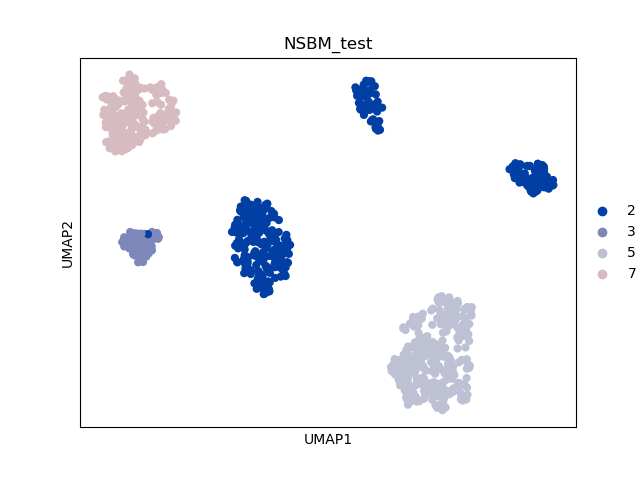

cell_line  A549  H838  H1975  H2228  HCC827
NSBM_test                                  
2             1     0    131      1     188
3            61     0      0      0       0
5             0     0      0    295       0
7             0   176      7      0       0

In [173]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state000.project_level(3).get_blocks()))
sc.pl.umap(adata, color="NSBM_test")
pd.crosstab(adata.obs.NSBM_test, adata.obs.cell_line)

### Gibbs_sweep non si può fare perchè non si può applicsre ai nested block objects: posso provare ad applicarlo solo ad un livello alla volta?